# At-risk prediction 

# OULAD data Transform
## -John

#This code references the results of many previous studies, thanks again. The middle part of the code is not run down sequentially, but needs to be run selectively.

In [1]:
# <aghatpande> on 28-Oct-2017
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# <aghatpande> on 28-Oct-2017 
# Import the standard libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# <aghatpande> on 28-Oct-2017 
# Read all the .CSV files
coursesDF = pd.read_csv("OULAD\\courses.csv")
assessmentsDF = pd.read_csv("OULAD\\assessments.csv")
vleDF = pd.read_csv("OULAD\\vle.csv")
studentInfoDF = pd.read_csv("OULAD\\studentInfo.csv")
studentRegistrationDF = pd.read_csv("OULAD\\studentRegistration.csv")
studentAssessmentDF = pd.read_csv("OULAD\\studentAssessment.csv")
studentVleDF = pd.read_csv("OULAD\\studentVle.csv")

In [4]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 30

In [5]:
import sklearn.metrics as metrics

#### Check if any of the columns have "NULL" in all the DataFrames

In [6]:
pd.isnull(coursesDF).sum() > 0
pd.isnull(assessmentsDF).sum() > 0
pd.isnull(vleDF).sum() > 0
pd.isnull(studentInfoDF).sum() > 0
pd.isnull(studentRegistrationDF).sum() > 0
pd.isnull(studentAssessmentDF).sum() > 0
pd.isnull(studentVleDF).sum() > 0

code_module                   False
code_presentation             False
module_presentation_length    False
dtype: bool

code_module          False
code_presentation    False
id_assessment        False
assessment_type      False
date                  True
weight               False
dtype: bool

id_site              False
code_module          False
code_presentation    False
activity_type        False
week_from             True
week_to               True
dtype: bool

code_module             False
code_presentation       False
id_student              False
gender                  False
region                  False
highest_education       False
imd_band                 True
age_band                False
num_of_prev_attempts    False
studied_credits         False
disability              False
final_result            False
dtype: bool

code_module            False
code_presentation      False
id_student             False
date_registration       True
date_unregistration     True
dtype: bool

id_assessment     False
id_student        False
date_submitted    False
is_banked         False
score              True
dtype: bool

code_module          False
code_presentation    False
id_student           False
id_site              False
date                 False
sum_click            False
dtype: bool

In [7]:
coursesDF.columns

Index(['code_module', 'code_presentation', 'module_presentation_length'], dtype='object')

In [8]:
# <aghatpande> on 28-Oct-2017
# Check the unique Learning modules present in the VLE
print("Length of the coursesDF is", coursesDF.shape)
print("Number of unique learning modules", coursesDF.code_module.unique())
#coursesDF

Length of the coursesDF is (22, 3)
Number of unique learning modules ['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']


In [9]:
# <aghatpande> on 01-Nov-2017
# Write custom functions to extract the "Year" and "Term" portions from "code_presentation" column. 
# This will be useful for groupby "Year" and groupby "Term" later in the code
def getYear(x):
    y= x[:-1]
    return y

def getTerm(x):
    y = x[-1:]
    return y
    
# <aghatpande> on 01-Nov-2017
# Create two new columns in studentRegistrationDF
studentRegistrationDF["Year"] = studentRegistrationDF["code_presentation"].apply(lambda x: getYear(x))
studentRegistrationDF["Term"] = studentRegistrationDF["code_presentation"].apply(lambda x: getTerm(x))

studentInfoDF["Year"] = studentInfoDF["code_presentation"].apply(lambda x: getYear(x))
studentInfoDF["Term"] = studentInfoDF["code_presentation"].apply(lambda x: getTerm(x))

In [10]:
studentRegistrationDF

,code_module,code_presentation,id_student,date_registration,date_unregistration,Year,Term
0,AAA,2013J,11391,-159.0,NaN,2013,J
1,AAA,2013J,28400,-53.0,NaN,2013,J
2,AAA,2013J,30268,-92.0,12.0,2013,J
3,AAA,2013J,31604,-52.0,NaN,2013,J
4,AAA,2013J,32885,-176.0,NaN,2013,J
...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN,2014,J
32589,GGG,2014J,2645731,-23.0,NaN,2014,J
32590,GGG,2014J,2648187,-129.0,NaN,2014,J
32591,GGG,2014J,2679821,-49.0,101.0,2014,J


#### Lets find the Overall Course figures

# code에서 unregistered로 표시한 것은 Fail+Withdrawn를 의미하고
# completed로 표시한 것은 Pass+Distinction를 의미함.
# Marking as unregistered = Fail+Withdrawn. Marked as completed =Pass+Distinction.

In [11]:
# <aghatpande> on 01-Nov-2017
# Overall course registrations and withdrawal rate
print ("Total number of course registrations is ", len(studentRegistrationDF))
unregisteredCoursesDF = studentInfoDF[(studentInfoDF.final_result=="Withdrawn") | (studentInfoDF.final_result=="Fail")]
completedCoursesDF = studentInfoDF[(studentInfoDF.final_result=="Pass") | (studentInfoDF.final_result=="Distinction")]
print ("Total number of course atRisk is ", len(unregisteredCoursesDF))
print ("Total number of courses completed is ", len(completedCoursesDF))
print("Overall course withdrawal rate is", ((len(unregisteredCoursesDF)+0.0) / len(studentRegistrationDF)) *100)

Total number of course registrations is  32593
Total number of course atRisk is  17208
Total number of courses completed is  15385
Overall course withdrawal rate is 52.796612769613105


In [12]:
unregisteredCoursesDF

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,Year,Term
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,2013,J
15,AAA,2013J,65002,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,60,N,Withdrawn,2013,J
18,AAA,2013J,74372,M,East Anglian Region,A Level or Equivalent,10-20,35-55,0,150,N,Fail,2013,J
22,AAA,2013J,94961,M,South Region,Lower Than A Level,70-80%,35-55,0,60,N,Withdrawn,2013,J
29,AAA,2013J,106247,M,South Region,HE Qualification,80-90%,35-55,0,60,N,Withdrawn,2013,J
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32581,GGG,2014J,2456431,F,South Region,Lower Than A Level,70-80%,0-35,0,30,Y,Fail,2014,J
32582,GGG,2014J,2475886,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,90,N,Fail,2014,J
32586,GGG,2014J,2608143,M,East Midlands Region,HE Qualification,60-70%,35-55,0,30,N,Withdrawn,2014,J
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,2014,J


In [13]:
completedCoursesDF

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,Year,Term
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,2013,J
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,2013,J
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,2013,J
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,2013,J
5,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,2013,J
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32585,GGG,2014J,2606765,F,London Region,Lower Than A Level,80-90%,0-35,0,30,N,Pass,2014,J
32587,GGG,2014J,2620947,F,Scotland,A Level or Equivalent,80-90%,0-35,0,30,Y,Distinction,2014,J
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,2014,J
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,2014,J


#### Lets find course  rate
# 도표로 데이터 이해하기

<AxesSubplot:title={'center':'Coursewise Registration rate'}, xlabel='code_module'>

<AxesSubplot:title={'center':'Coursewise Withdrawal rate'}, xlabel='code_module'>

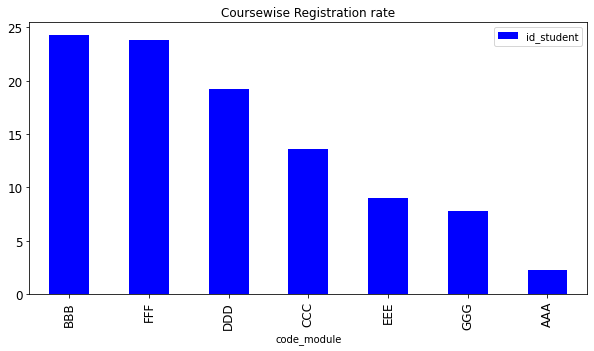

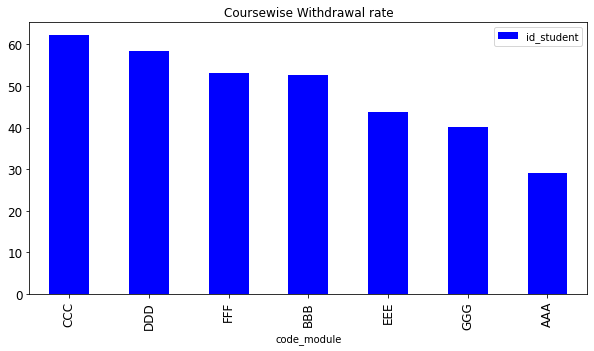

In [14]:
# <aghatpande> on 01-Nov-2017
# Check the enrollment in each course
groupbyStudentRegistrationPerCourseDF = studentRegistrationDF[["code_module", "id_student"]].groupby(["code_module"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbystudentRegistrationPerCourseDF
registrationRatePerCourseDF = (groupbyStudentRegistrationPerCourseDF / len(studentRegistrationDF)) *100
registrationRatePerCourseDF.plot(kind='bar', title = "Coursewise Registration rate",figsize=(10,5), color="b", fontsize=12 )
#registrationRatePerCourseDF

# Check the withdrawals in each course
groupbyStudentWithdrawalPerCourseDF = unregisteredCoursesDF[["code_module", "id_student"]].groupby(["code_module"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyunregisteredCoursesDF
#Take the ratio to find the withdrawal rate
withdrawalRatePerCourseDF = ((groupbyStudentWithdrawalPerCourseDF / groupbyStudentRegistrationPerCourseDF)*100).sort_values("id_student", ascending= False)
#withdrawalRatePerCourseDF
withdrawalRatePerCourseDF.plot(kind='bar', title = "Coursewise Withdrawal rate",figsize=(10,5), color="b", fontsize=12 )

#### Lets find the Year wise numbers for Registration rate and Withdrawal rate

<AxesSubplot:title={'center':'Registration rate per Year'}, xlabel='Year'>

<AxesSubplot:title={'center':'Coursewise Withdrawal rate per Year'}, xlabel='Year'>

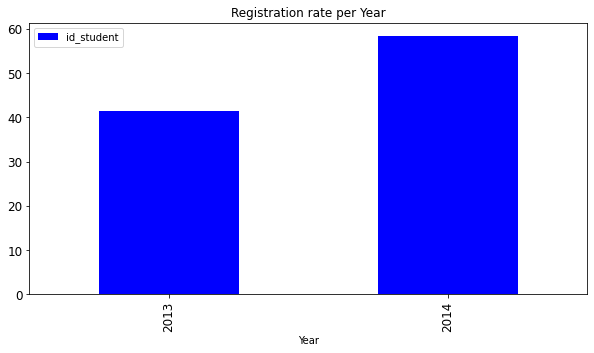

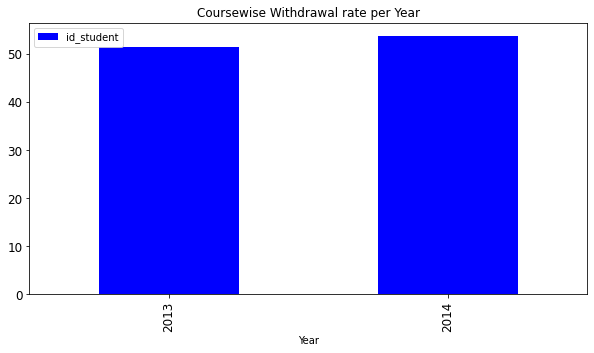

In [15]:
# <aghatpande> on 01-Nov-2017
# Check the enrollment in each year
groupbyStudentRegistrationPerYearDF = studentRegistrationDF[["Year", "id_student"]].groupby(["Year"]).agg({'id_student':'count'})
#groupbyStudentRegistrationPerYearDF
registrationRatePerYearDF = (groupbyStudentRegistrationPerYearDF / len(studentRegistrationDF)) *100
#registrationRatePerYearDF
registrationRatePerYearDF.plot(kind='bar', title = "Registration rate per Year",figsize=(10,5), color="b", fontsize=12 )

# Check the withdrawals in each year
groupbyStudentWithdrawalPerYearDF = unregisteredCoursesDF[["Year", "id_student"]].groupby("Year").agg({'id_student':'count'})
#groupbyStudentWithdrawalPerYearDF
#Take the ratio to find the withdrawal rate per Year
withdrawalRatePerYearDF = ((groupbyStudentWithdrawalPerYearDF / groupbyStudentRegistrationPerYearDF)*100)
#withdrawalRatePerYearDF
withdrawalRatePerYearDF.plot(kind='bar', title = "Coursewise Withdrawal rate per Year",figsize=(10,5), color="b", fontsize=12 )

#### Let find the Term wise Registration rate and Withdrawal rate

<AxesSubplot:title={'center':'Registration rate per Term'}, xlabel='Term'>

<AxesSubplot:title={'center':'Withdrawal rate per Term'}, xlabel='Term'>

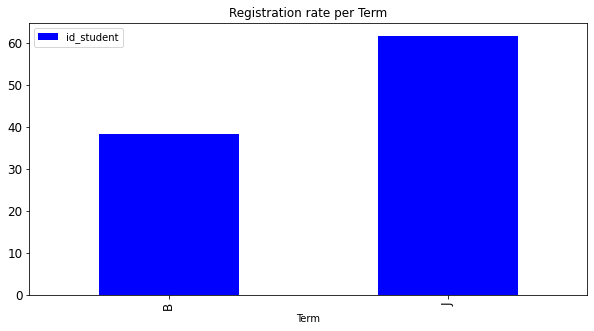

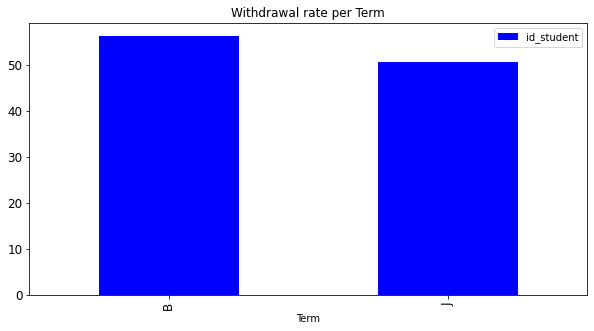

In [16]:
# <aghatpande> on 01-Nov-2017
# Check the enrollment in each Term
groupbyStudentRegistrationPerTermDF = studentRegistrationDF[["Term", "id_student"]].groupby(["Term"]).agg({'id_student':'count'})
#groupbyStudentRegistrationPerTermDF
#Take the ratio to find the Registration rate per Term
registrationRatePerTermDF = (groupbyStudentRegistrationPerTermDF / len(studentRegistrationDF)) *100
#registrationRatePerTermDF
registrationRatePerTermDF.plot(kind='bar', title = "Registration rate per Term",figsize=(10,5), color="b", fontsize=12 )

# Check the withdrawals in each Term
groupbyStudentWithdrawalPerTermDF = unregisteredCoursesDF[["Term", "id_student"]].groupby("Term").agg({'id_student':'count'})
#groupbyStudentWithdrawalPerTermDF
#Take the ratio to find the withdrawal rate per Term
withdrawalRatePerTermDF = ((groupbyStudentWithdrawalPerTermDF / groupbyStudentRegistrationPerTermDF)*100)
#withdrawalRatePerTermDF
withdrawalRatePerTermDF.plot(kind='bar', title = "Withdrawal rate per Term",figsize=(10,5), color="b", fontsize=12 )

In [17]:
studentRegistrationDF

,code_module,code_presentation,id_student,date_registration,date_unregistration,Year,Term
0,AAA,2013J,11391,-159.0,NaN,2013,J
1,AAA,2013J,28400,-53.0,NaN,2013,J
2,AAA,2013J,30268,-92.0,12.0,2013,J
3,AAA,2013J,31604,-52.0,NaN,2013,J
4,AAA,2013J,32885,-176.0,NaN,2013,J
...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN,2014,J
32589,GGG,2014J,2645731,-23.0,NaN,2014,J
32590,GGG,2014J,2648187,-129.0,NaN,2014,J
32591,GGG,2014J,2679821,-49.0,101.0,2014,J


#### Lets find the Gender wise distribution of students

In [18]:
# <aghatpande> on 28-Oct-2017
# Sepearate out the Dataframes based on Gender
studentInfoWithStudentRegistrationsDF = pd.merge(studentRegistrationDF, studentInfoDF, how='left', on=['id_student', 'code_module', 'code_presentation','Year','Term'])
studentInfoWithStudentRegistrationsUnregisteredDF = studentInfoWithStudentRegistrationsDF[(studentInfoWithStudentRegistrationsDF.final_result=="Withdrawn") | (studentInfoWithStudentRegistrationsDF.final_result=="Fail")]
studentInfoWithStudentRegistrationsCompletedDF = studentInfoWithStudentRegistrationsDF[(studentInfoWithStudentRegistrationsDF.final_result=="Pass") | (studentInfoWithStudentRegistrationsDF.final_result=="Distinction")]


femaleRegistrationsDF = studentInfoWithStudentRegistrationsDF[studentInfoWithStudentRegistrationsDF["gender"] == "F"]
maleRegistrationsDF = studentInfoWithStudentRegistrationsDF[studentInfoWithStudentRegistrationsDF["gender"] == "M"]
femaleUnregisteredCoursesDF = femaleRegistrationsDF[(femaleRegistrationsDF.final_result=="Withdrawn") | (femaleRegistrationsDF.final_result=="Fail")]
maleUnregisteredCoursesDF = maleRegistrationsDF[(maleRegistrationsDF.final_result=="Withdrawn") | (maleRegistrationsDF.final_result=="Fail")]

In [19]:
studentInfoWithStudentRegistrationsUnregisteredDF 

,code_module,code_presentation,id_student,date_registration,date_unregistration,Year,Term,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
2,AAA,2013J,30268,-92.0,12.0,2013,J,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
15,AAA,2013J,65002,-180.0,96.0,2013,J,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,60,N,Withdrawn
18,AAA,2013J,74372,-50.0,NaN,2013,J,M,East Anglian Region,A Level or Equivalent,10-20,35-55,0,150,N,Fail
22,AAA,2013J,94961,-170.0,72.0,2013,J,M,South Region,Lower Than A Level,70-80%,35-55,0,60,N,Withdrawn
29,AAA,2013J,106247,5.0,175.0,2013,J,M,South Region,HE Qualification,80-90%,35-55,0,60,N,Withdrawn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32581,GGG,2014J,2456431,-70.0,NaN,2014,J,F,South Region,Lower Than A Level,70-80%,0-35,0,30,Y,Fail
32582,GGG,2014J,2475886,-31.0,NaN,2014,J,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,90,N,Fail
32586,GGG,2014J,2608143,-45.0,48.0,2014,J,M,East Midlands Region,HE Qualification,60-70%,35-55,0,30,N,Withdrawn
32588,GGG,2014J,2640965,-4.0,NaN,2014,J,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail


In [20]:
# <aghatpande> on 02-Nov-2017
print("Overall student enrollment in Open university is", len(studentInfoWithStudentRegistrationsDF))
print("Overall Male student population as percentage of total enrollment is")
(len(maleRegistrationsDF)+ 0.0)/len(studentInfoWithStudentRegistrationsDF) * 100

Overall student enrollment in Open university is 32593
Overall Male student population as percentage of total enrollment is


54.843064461694226

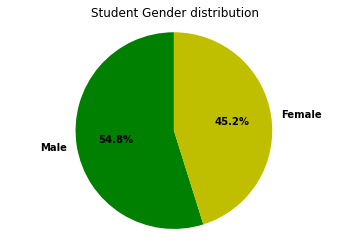

In [21]:
# <aghatpande> on 28-Oct-2017
# Using matplotlib for gender distribution pie chart
fig1, ax1 = plt.subplots()
plt.title("Student Gender distribution");
plt.pie(studentInfoWithStudentRegistrationsDF["gender"].value_counts().tolist(), colors=["g", "y"], labels=["Male", "Female"], startangle=90, autopct='%.1f%%', textprops={'weight': 'bold'});
ax1.axis('equal');

#### Lets find the overall final result for all students

<AxesSubplot:title={'center':'Final result wise Student distribution'}, xlabel='final_result'>

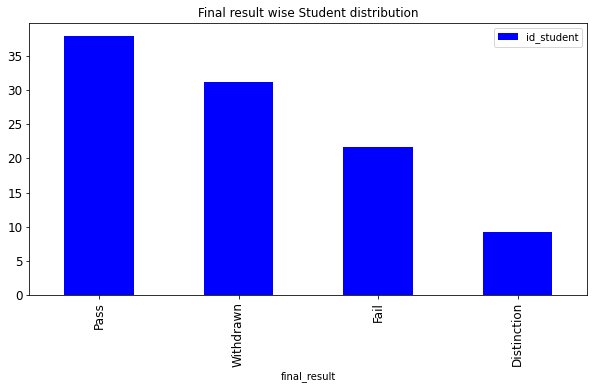

In [22]:
# <aghatpande> on 28-Oct-2017
# Check the Final result of all students
groupbyStudentRegistrationPerResultDF = studentInfoWithStudentRegistrationsDF[["final_result", "id_student"]].groupby(["final_result"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyStudentRegistrationPerResultDF

studentRegistrationRatePerResultDF = (groupbyStudentRegistrationPerResultDF / len(studentInfoWithStudentRegistrationsDF)) *100
#studentRegistrationRatePerResultDF
studentRegistrationRatePerResultDF.plot(kind='bar', title = "Final result wise Student distribution",figsize=(10,5), color="b", fontsize=12 )

groupbyStudentRegistrationPerResultPerRegionDF = studentInfoWithStudentRegistrationsDF[["final_result", "region", "id_student"]].groupby(["final_result", "region"]).agg({'id_student':'count'})
#groupbyStudentRegistrationPerResultPerRegionDF

groupbyStudentRegistrationPerRegion = studentInfoWithStudentRegistrationsDF[["region", "id_student"]].groupby("region").agg({'id_student':'count'})
#groupbyStudentRegistrationPerRegion

finalResultPerRegionRate = (groupbyStudentRegistrationPerResultPerRegionDF / groupbyStudentRegistrationPerRegion) *100
#finalResultPerRegionRate

#### Lets find Age wise registration and withdrawal rate in Females and Males

<AxesSubplot:title={'center':'Female Age wise registration'}, xlabel='age_band'>

<AxesSubplot:title={'center':'Male Age wise registration'}, xlabel='age_band'>

<AxesSubplot:title={'center':'Female Age wise Withdrawal'}, xlabel='age_band'>

<AxesSubplot:title={'center':'Male Age wise Withdrawal'}, xlabel='age_band'>

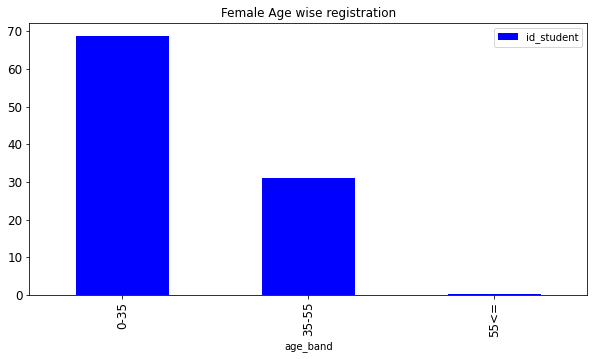

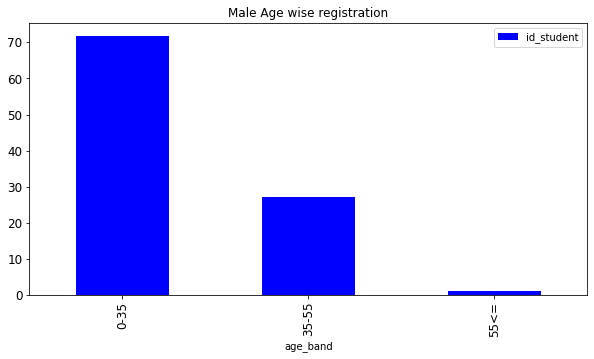

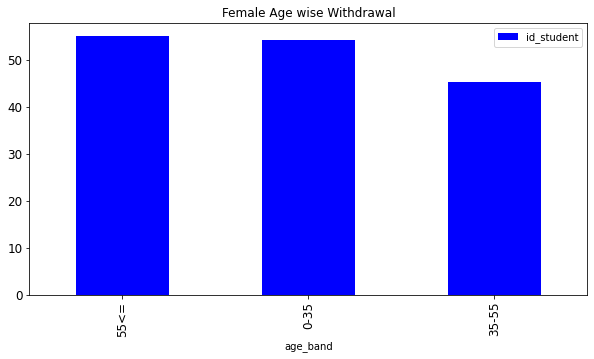

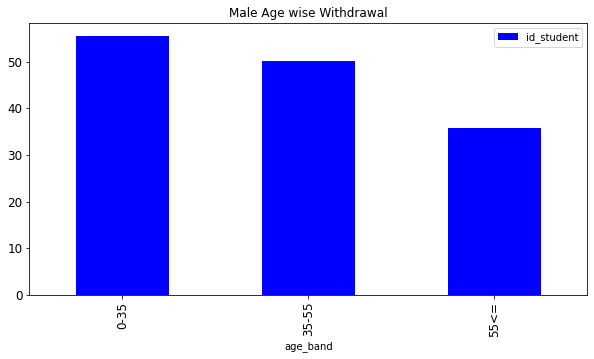

In [23]:
# <aghatpande> on 28-Oct-2017
# Check the Age wise registration of each Gender
groupbyFemaleStudentRegistrationPerAgeDF = femaleRegistrationsDF[["age_band", "id_student"]].groupby(["age_band"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyFemaleStudentRegistrationPerAgeDF
groupbyMaleStudentRegistrationPerAgeDF = maleRegistrationsDF[["age_band", "id_student"]].groupby(["age_band"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyMaleStudentRegistrationPerAgeDF

femaleRegistrationRatePerAgeDF = (groupbyFemaleStudentRegistrationPerAgeDF / len(femaleRegistrationsDF)) *100
#femaleRegistrationRatePerAgeDF
femaleRegistrationRatePerAgeDF.plot(kind='bar', title = "Female Age wise registration",figsize=(10,5), color="b", fontsize=12 )
maleRegistrationRatePerAgeDF = (groupbyMaleStudentRegistrationPerAgeDF / len(maleRegistrationsDF)) *100
#maleRegistrationRatePerAgeDF
maleRegistrationRatePerAgeDF.plot(kind='bar', title = "Male Age wise registration",figsize=(10,5), color="b", fontsize=12 )

# Check the withdrawal of each Gender in each course
groupbyFemaleStudentWithdrawalPerAgeDF = femaleUnregisteredCoursesDF[["age_band", "id_student"]].groupby(["age_band"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyFemaleStudentWithdrawalPerAgeDF
groupbyMaleStudentWithdrawalPerAgeDF = maleUnregisteredCoursesDF[["age_band", "id_student"]].groupby(["age_band"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyMaleStudentWithdrawalPerAgeDF

#Take the ratio to find the withdrawal rate
femaleWithdrawalRatePerAgeDF = ((groupbyFemaleStudentWithdrawalPerAgeDF / groupbyFemaleStudentRegistrationPerAgeDF)*100).sort_values("id_student", ascending= False)
#femaleWithdrawalRatePerAgeDF
femaleWithdrawalRatePerAgeDF.plot(kind='bar', title = "Female Age wise Withdrawal",figsize=(10,5), color="b", fontsize=12 )

#Take the ratio to find the withdrawal rate
maleWithdrawalRatePerAgeDF = ((groupbyMaleStudentWithdrawalPerAgeDF / groupbyMaleStudentRegistrationPerAgeDF)*100).sort_values("id_student", ascending= False)
#maleWithdrawalRatePerAgeDF
maleWithdrawalRatePerAgeDF.plot(kind='bar', title = "Male Age wise Withdrawal",figsize=(10,5), color="b", fontsize=12 )

#### Lets find "final_result" based registration and withdrawal rates of female and male students

<AxesSubplot:title={'center':'Female result wise distribution'}, xlabel='final_result'>

<AxesSubplot:title={'center':'Male result wise distribution'}, xlabel='final_result'>

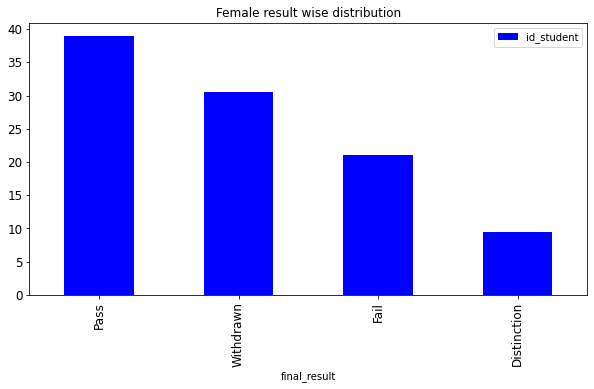

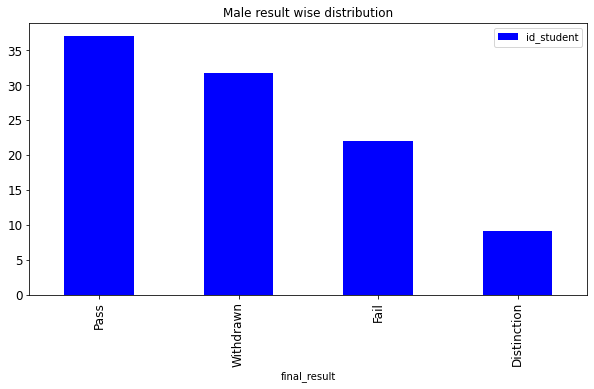

In [24]:
# <aghatpande> on 28-Oct-2017
# Check the Final result wise registration of each Gender
groupbyFemaleStudentRegistrationPerResultDF = femaleRegistrationsDF[["final_result", "id_student"]].groupby(["final_result"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyFemaleStudentRegistrationPerResultDF
groupbyMaleStudentRegistrationPerResultDF = maleRegistrationsDF[["final_result", "id_student"]].groupby(["final_result"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyMaleStudentRegistrationPerResultDF

femaleRegistrationRatePerResultDF = (groupbyFemaleStudentRegistrationPerResultDF / len(femaleRegistrationsDF)) *100
#femaleRegistrationRatePerResultDF
femaleRegistrationRatePerResultDF.plot(kind='bar', title = "Female result wise distribution",figsize=(10,5), color="b", fontsize=12 )
maleRegistrationRatePerResultDF = (groupbyMaleStudentRegistrationPerResultDF / len(maleRegistrationsDF)) *100
#maleRegistrationRatePerResultDF
maleRegistrationRatePerResultDF.plot(kind='bar', title = "Male result wise distribution",figsize=(10,5), color="b", fontsize=12 )

#### Lets find course based registration and withdrawal rate for each gender

<AxesSubplot:title={'center':'Coursewise Registration rate for females'}, xlabel='code_module'>

<AxesSubplot:title={'center':'Coursewise Registration rate for Males'}, xlabel='code_module'>

<AxesSubplot:title={'center':'Coursewise Female Withdrawal rate'}, xlabel='code_module'>

<AxesSubplot:title={'center':'Coursewise Male Withdrawal rate'}, xlabel='code_module'>

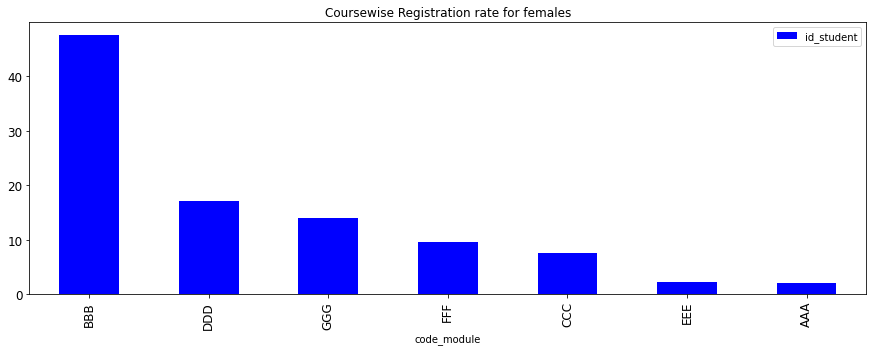

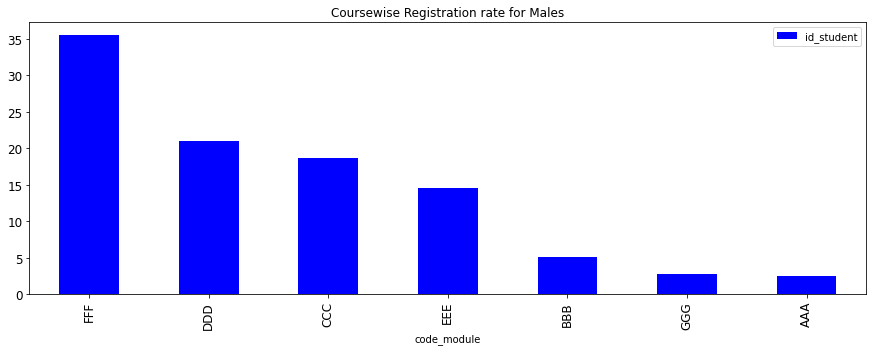

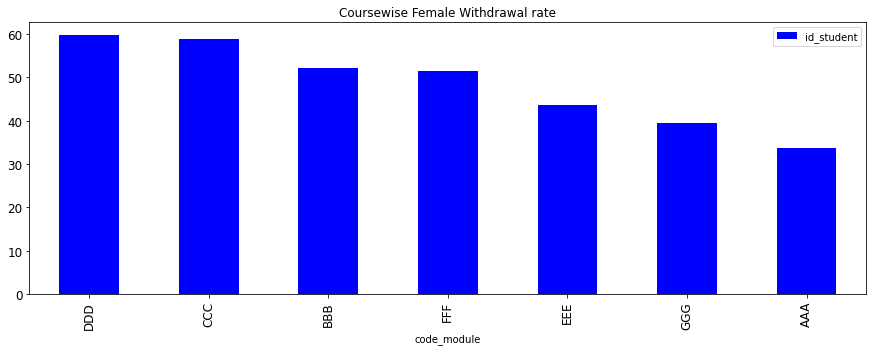

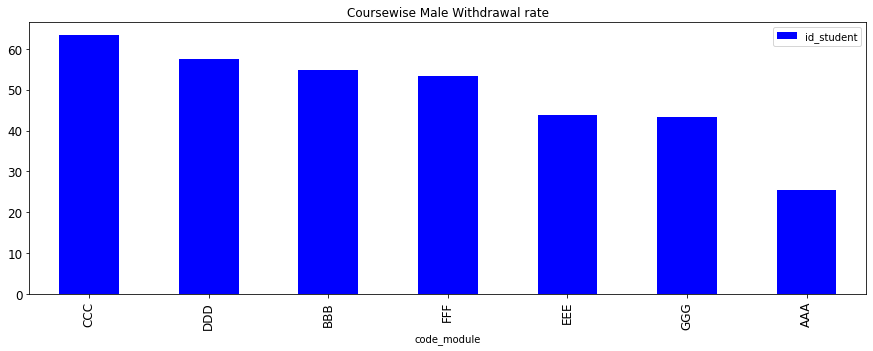

In [25]:
# <aghatpande> on 28-Oct-2017
# Check the enrollment of each Gender in each course
groupbyFemaleStudentRegistrationPerCourseDF = femaleRegistrationsDF[["code_module", "id_student"]].groupby(["code_module"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyFemaleStudentRegistrationPerCourseDF
groupbyMaleStudentRegistrationPerCourseDF = maleRegistrationsDF[["code_module", "id_student"]].groupby(["code_module"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyMaleStudentRegistrationPerCourseDF

femaleRegistrationRatePerCourseDF = (groupbyFemaleStudentRegistrationPerCourseDF / len(femaleRegistrationsDF)) *100
#femaleRegistrationRatePerCourseDF
femaleRegistrationRatePerCourseDF.plot(kind='bar', title = "Coursewise Registration rate for females",figsize=(15,5), color="b", fontsize=12 )
maleRegistrationRatePerCourseDF = (groupbyMaleStudentRegistrationPerCourseDF / len(maleRegistrationsDF)) *100
#maleRegistrationRatePerCourseDF
maleRegistrationRatePerCourseDF.plot(kind='bar', title = "Coursewise Registration rate for Males",figsize=(15,5), color="b", fontsize=12 )

# Check the withdrawal of each Gender in each course
groupbyFemaleStudentWithdrawalPerCourseDF = femaleUnregisteredCoursesDF[["code_module", "id_student"]].groupby(["code_module"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyFemaleStudentWithdrawalPerCourseDF
groupbyMaleStudentWithdrawalPerCourseDF = maleUnregisteredCoursesDF[["code_module", "id_student"]].groupby(["code_module"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyMaleStudentWithdrawalPerCourseDF

#Take the ratio to find the withdrawal rate
femaleWithdrawalRatePerCourseDF = ((groupbyFemaleStudentWithdrawalPerCourseDF / groupbyFemaleStudentRegistrationPerCourseDF)*100).sort_values("id_student", ascending= False)
#femaleWithdrawalRatePerCourseDF
femaleWithdrawalRatePerCourseDF.plot(kind='bar', title = "Coursewise Female Withdrawal rate",figsize=(15,5), color="b", fontsize=12 )

#Take the ratio to find the withdrawal rate
maleWithdrawalRatePerCourseDF = ((groupbyMaleStudentWithdrawalPerCourseDF / groupbyMaleStudentRegistrationPerCourseDF)*100).sort_values("id_student", ascending= False)
#maleWithdrawalRatePerCourseDF
maleWithdrawalRatePerCourseDF.plot(kind='bar', title = "Coursewise Male Withdrawal rate",figsize=(15,5), color="b", fontsize=12 )

#### Lets check Year wise registration and withdrawal rates for each gender

<AxesSubplot:title={'center':'Female Registration rate per Year'}, xlabel='Year'>

<AxesSubplot:title={'center':'Male Registration rate per Year'}, xlabel='Year'>

<AxesSubplot:title={'center':'Female withdrawal rate per Year'}, xlabel='Year'>

<AxesSubplot:title={'center':'Male withdrawal rate per Year'}, xlabel='Year'>

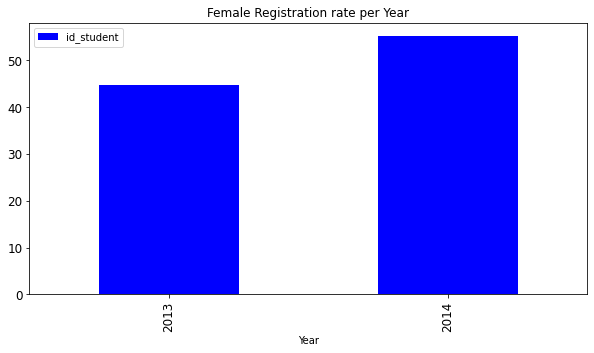

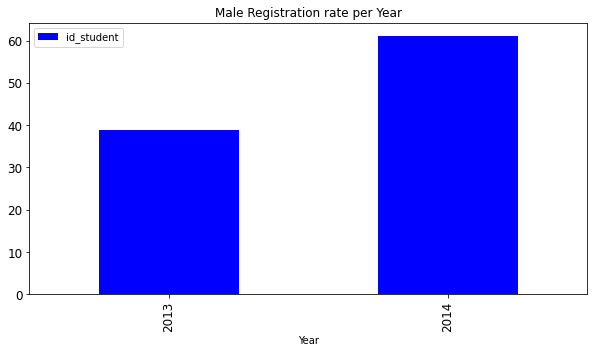

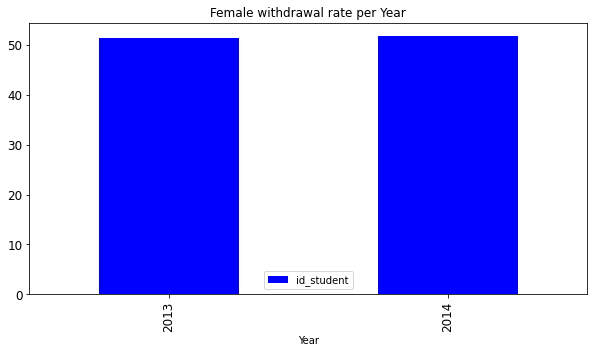

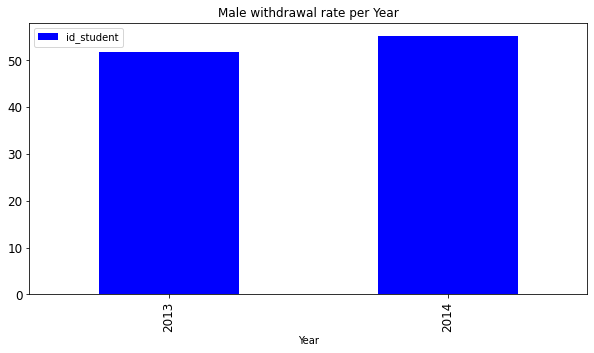

In [26]:
# <aghatpande> on 28-Oct-2017
# Check the Per year registration
groupbyFemaleStudentRegistrationPerYearDF = femaleRegistrationsDF[["Year", "id_student"]].groupby(["Year"]).agg({'id_student':'count'})
#groupbyFemaleStudentRegistrationPerYearDF
femaleRegistrationRatePerYearDF = (groupbyFemaleStudentRegistrationPerYearDF / len(femaleRegistrationsDF)) *100
#femaleRegistrationRatePerYearDF
femaleRegistrationRatePerYearDF.plot(kind='bar', title = "Female Registration rate per Year",figsize=(10,5), color="b", fontsize=12 )

groupbyMaleStudentRegistrationPerYearDF = maleRegistrationsDF[["Year", "id_student"]].groupby(["Year"]).agg({'id_student':'count'})
#groupbyMaleStudentRegistrationPerYearDF
maleRegistrationRatePerYearDF = (groupbyMaleStudentRegistrationPerYearDF / len(maleRegistrationsDF)) *100
#maleRegistrationRatePerYearDF
maleRegistrationRatePerYearDF.plot(kind='bar', title = "Male Registration rate per Year",figsize=(10,5), color="b", fontsize=12 )

# Check the withdrawals in each year
groupbyFemaleStudentWithdrawalPerYearDF = femaleUnregisteredCoursesDF[["Year", "id_student"]].groupby("Year").agg({'id_student':'count'})
#groupbyFemaleStudentWithdrawalPerYearDF
#Take the ratio to find the withdrawal rate per Year
femaleWithdrawalRatePerYearDF = ((groupbyFemaleStudentWithdrawalPerYearDF / groupbyFemaleStudentRegistrationPerYearDF)*100)
#femaleWithdrawalRatePerYearDF
femaleWithdrawalRatePerYearDF.plot(kind='bar', title = "Female withdrawal rate per Year",figsize=(10,5), color="b", fontsize=12 )

groupbyMaleStudentWithdrawalPerYearDF = maleUnregisteredCoursesDF[["Year", "id_student"]].groupby("Year").agg({'id_student':'count'})
#groupbyMaleStudentWithdrawalPerYearDF
#Take the ratio to find the withdrawal rate per Year
maleWithdrawalRatePerYearDF = ((groupbyMaleStudentWithdrawalPerYearDF / groupbyMaleStudentRegistrationPerYearDF)*100)
#maleWithdrawalRatePerYearDF
maleWithdrawalRatePerYearDF.plot(kind='bar', title = "Male withdrawal rate per Year",figsize=(10,5), color="b", fontsize=12 )

In [27]:
femaleRegistrationsDF

,code_module,code_presentation,id_student,date_registration,date_unregistration,Year,Term,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
1,AAA,2013J,28400,-53.0,NaN,2013,J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,-92.0,12.0,2013,J,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,-52.0,NaN,2013,J,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,-176.0,NaN,2013,J,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
7,AAA,2013J,45642,-29.0,NaN,2013,J,F,North Western Region,A Level or Equivalent,90-100%,0-35,0,120,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN,2014,J,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,-23.0,NaN,2014,J,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,-129.0,NaN,2014,J,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,-49.0,101.0,2014,J,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


#### Lets check registration and withdrawal rates per term for each gender

<AxesSubplot:title={'center':'Female Registration rate per Term'}, xlabel='Term'>

<AxesSubplot:title={'center':'Male Registration rate per Term'}, xlabel='Term'>

<AxesSubplot:title={'center':'Female withdrawal rate per Term'}, xlabel='Term'>

<AxesSubplot:title={'center':'Male withdrawal rate per Term'}, xlabel='Term'>

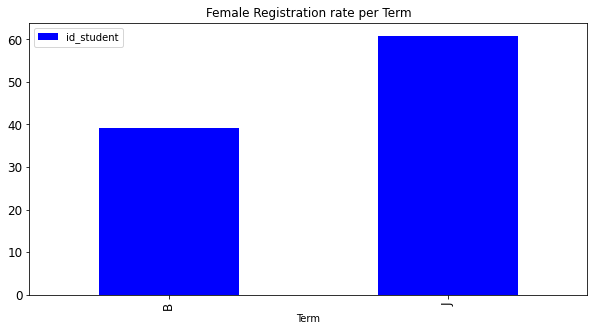

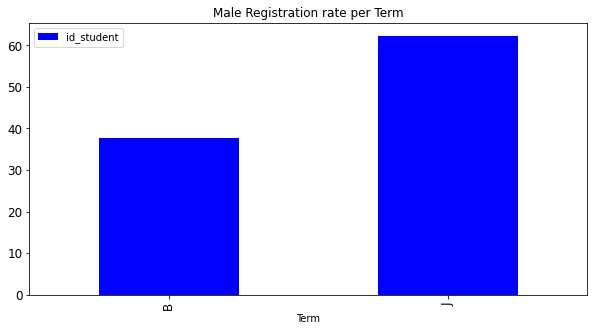

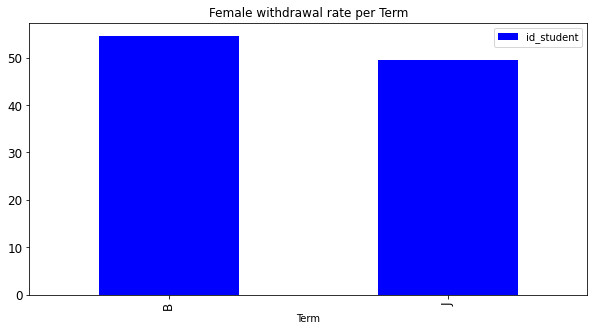

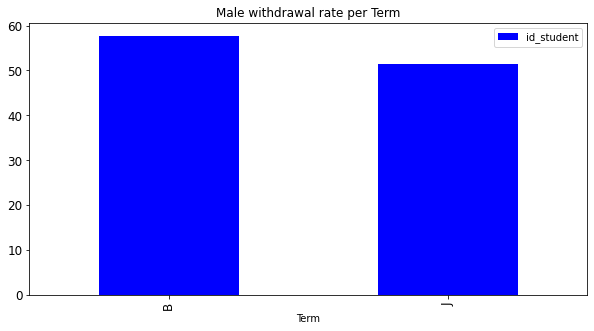

In [28]:
# <aghatpande> on 28-Oct-2017
# Check the enrollment in each Term of each Gender
groupbyFemaleStudentRegistrationPerTermDF = femaleRegistrationsDF[["Term", "id_student"]].groupby(["Term"]).agg({'id_student':'count'})
#groupbyFemaleStudentRegistrationPerTermDF
femaleRegistrationRatePerTermDF = (groupbyFemaleStudentRegistrationPerTermDF / len(femaleRegistrationsDF)) *100
#femaleRegistrationRatePerTermDF
femaleRegistrationRatePerTermDF.plot(kind='bar', title = "Female Registration rate per Term",figsize=(10,5), color="b", fontsize=12 )

groupbyMaleStudentRegistrationPerTermDF = maleRegistrationsDF[["Term", "id_student"]].groupby(["Term"]).agg({'id_student':'count'})
#groupbyMaleStudentRegistrationPerTermDF
maleRegistrationRatePerTermDF = (groupbyMaleStudentRegistrationPerTermDF / len(maleRegistrationsDF)) *100
#maleRegistrationRatePerTermDF
maleRegistrationRatePerTermDF.plot(kind='bar', title = "Male Registration rate per Term",figsize=(10,5), color="b", fontsize=12 )

# Check the withdrawals in each Term
groupbyFemaleStudentWithdrawalPerTermDF = femaleUnregisteredCoursesDF[["Term", "id_student"]].groupby("Term").agg({'id_student':'count'})
#groupbyFemaleStudentWithdrawalPerTermDF
#Take the ratio to find the withdrawal rate per Year
femaleWithdrawalRatePerTermDF = ((groupbyFemaleStudentWithdrawalPerTermDF / groupbyFemaleStudentRegistrationPerTermDF)*100)
#femaleWithdrawalRatePerTermDF
femaleWithdrawalRatePerTermDF.plot(kind='bar', title = "Female withdrawal rate per Term",figsize=(10,5), color="b", fontsize=12 )

groupbyMaleStudentWithdrawalPerTermDF = maleUnregisteredCoursesDF[["Term", "id_student"]].groupby("Term").agg({'id_student':'count'})
#groupbyMaleStudentWithdrawalPerTermDF
#Take the ratio to find the withdrawal rate per Year
maleWithdrawalRatePerTermDF = ((groupbyMaleStudentWithdrawalPerTermDF / groupbyMaleStudentRegistrationPerTermDF)*100)
#maleWithdrawalRatePerTermDF
maleWithdrawalRatePerTermDF.plot(kind='bar', title = "Male withdrawal rate per Term",figsize=(10,5), color="b", fontsize=12 )

#### Lets analyze the registration rate and withdrawal rate as per Education level for each gender

<AxesSubplot:title={'center':'Female Registration rate per Education'}, xlabel='highest_education'>

<AxesSubplot:title={'center':'Male Registration rate per Education'}, xlabel='highest_education'>

<AxesSubplot:title={'center':'Female withdrawal rate per Education'}, xlabel='highest_education'>

<AxesSubplot:title={'center':'Male withdrawal rate per Education'}, xlabel='highest_education'>

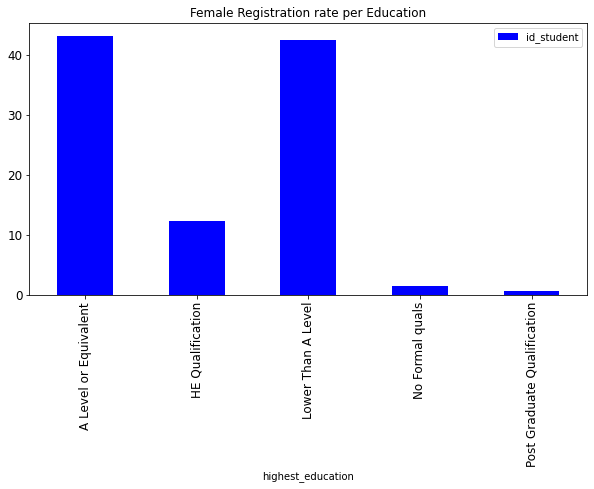

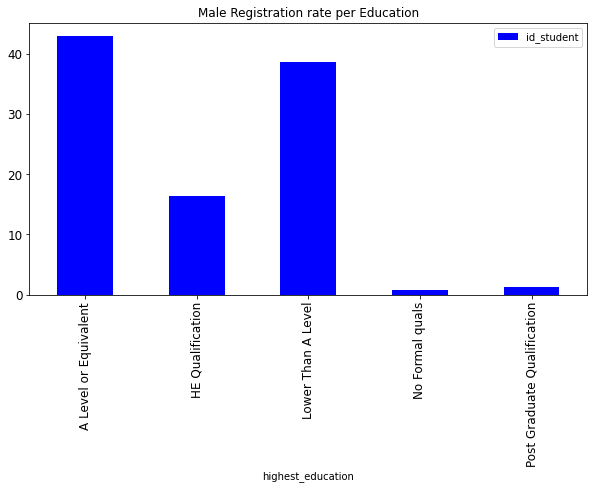

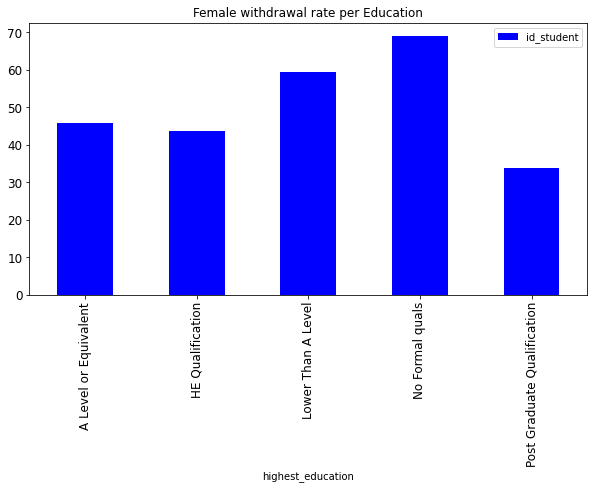

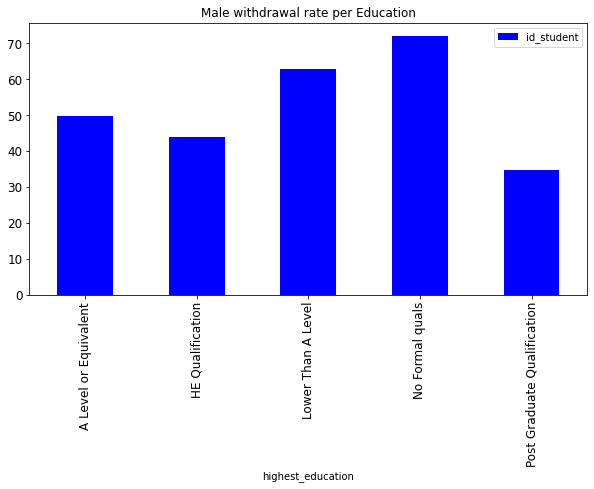

In [29]:
# <aghatpande> on 28-Oct-2017
# Check the enrollment in each Education
groupbyFemaleStudentRegistrationPerEducationDF = femaleRegistrationsDF[["highest_education", "id_student"]].groupby(["highest_education"]).agg({'id_student':'count'})
#groupbyFemaleStudentRegistrationPerEducationDF
femaleRegistrationRatePerEducationDF = (groupbyFemaleStudentRegistrationPerEducationDF / len(femaleRegistrationsDF)) *100
#femaleRegistrationRatePerEducationDF
femaleRegistrationRatePerEducationDF.plot(kind='bar', title = "Female Registration rate per Education",figsize=(10,5), color="b", fontsize=12 )

groupbyMaleStudentRegistrationPerEducationDF = maleRegistrationsDF[["highest_education", "id_student"]].groupby(["highest_education"]).agg({'id_student':'count'})
#groupbyMaleStudentRegistrationPerEducationDF
maleRegistrationRatePerEducationDF = (groupbyMaleStudentRegistrationPerEducationDF / len(maleRegistrationsDF)) *100
#maleRegistrationRatePerEducationDF
maleRegistrationRatePerEducationDF.plot(kind='bar', title = "Male Registration rate per Education",figsize=(10,5), color="b", fontsize=12 )

# Check the withdrawals in each Education
groupbyFemaleStudentWithdrawalPerEducationDF = femaleUnregisteredCoursesDF[["highest_education", "id_student"]].groupby("highest_education").agg({'id_student':'count'})
#groupbyFemaleStudentWithdrawalPerEducationDF
#Take the ratio to find the withdrawal rate per Education level
femaleWithdrawalRatePerEducationDF = ((groupbyFemaleStudentWithdrawalPerEducationDF / groupbyFemaleStudentRegistrationPerEducationDF)*100)
#femaleWithdrawalRatePerEducationDF
femaleWithdrawalRatePerEducationDF.plot(kind='bar', title = "Female withdrawal rate per Education",figsize=(10,5), color="b", fontsize=12 )

groupbyMaleStudentWithdrawalPerEducationDF = maleUnregisteredCoursesDF[["highest_education", "id_student"]].groupby("highest_education").agg({'id_student':'count'})
#groupbyMaleStudentWithdrawalPerEducationDF
#Take the ratio to find the withdrawal rate per Year
maleWithdrawalRatePerEducationDF = ((groupbyMaleStudentWithdrawalPerEducationDF / groupbyMaleStudentRegistrationPerEducationDF)*100)
#maleWithdrawalRatePerEducationDF
maleWithdrawalRatePerEducationDF.plot(kind='bar', title = "Male withdrawal rate per Education",figsize=(10,5), color="b", fontsize=12 )

#### Lets analyze the registration rate and withdrawal rate per gender as per imd_band 

<AxesSubplot:title={'center':'Female Registration rate per imd_band'}, xlabel='imd_band'>

<AxesSubplot:title={'center':'Male Registration rate per imd_band'}, xlabel='imd_band'>

<AxesSubplot:title={'center':'Female withdrawal rate per imd_band'}, xlabel='imd_band'>

<AxesSubplot:title={'center':'Male withdrawal rate per imd_band'}, xlabel='imd_band'>

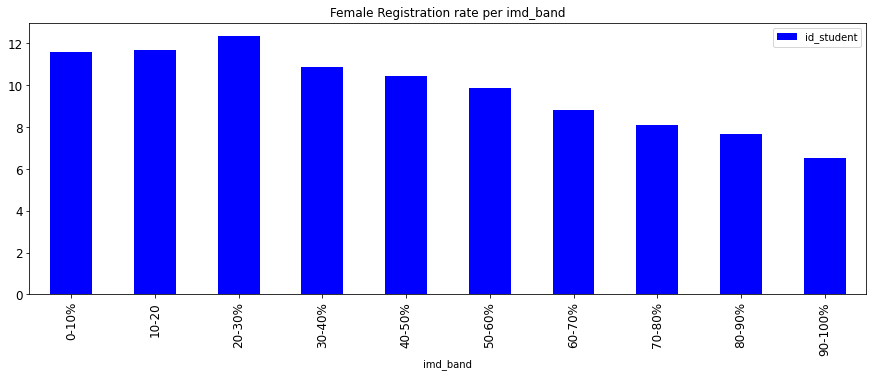

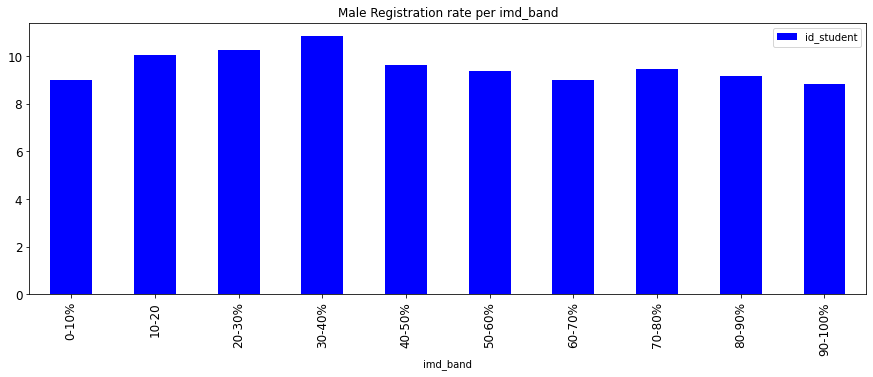

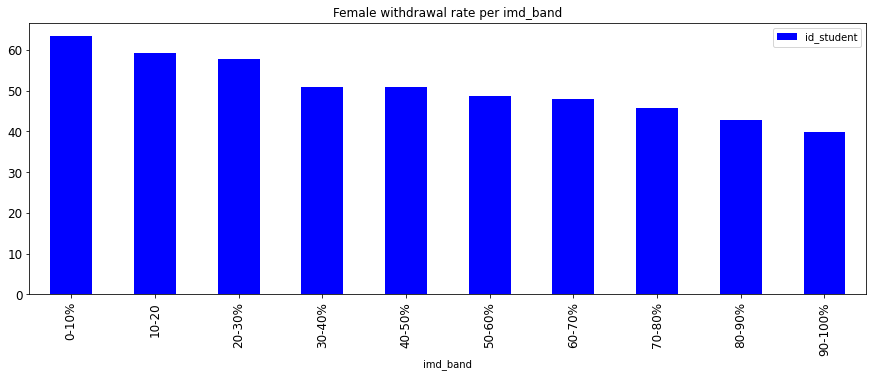

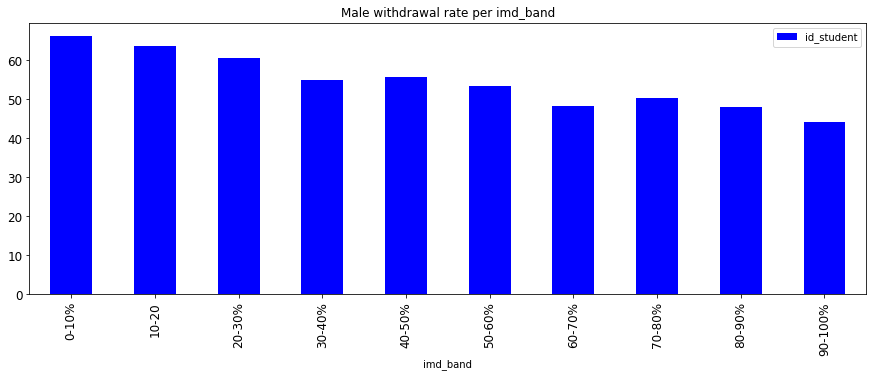

In [30]:
# <aghatpande> on 02-Nov-2017
# Check the enrollment in each imd_band
groupbyFemaleStudentRegistrationPerIMDDF = femaleRegistrationsDF[["imd_band", "id_student"]].groupby(["imd_band"]).agg({'id_student':'count'})
#groupbyFemaleStudentRegistrationPerIMDDF
femaleRegistrationRatePerIMDDF = (groupbyFemaleStudentRegistrationPerIMDDF / len(femaleRegistrationsDF)) *100
#femaleRegistrationRatePerIMDDF
femaleRegistrationRatePerIMDDF.plot(kind='bar', title = "Female Registration rate per imd_band",figsize=(15,5), color="b", fontsize=12 )

groupbyMaleStudentRegistrationPerIMDDF = maleRegistrationsDF[["imd_band", "id_student"]].groupby(["imd_band"]).agg({'id_student':'count'})
#groupbyMaleStudentRegistrationPerIMDDF
maleRegistrationRatePerIMDDF = (groupbyMaleStudentRegistrationPerIMDDF / len(maleRegistrationsDF)) *100
#maleRegistrationRatePerIMDDF
maleRegistrationRatePerIMDDF.plot(kind='bar', title = "Male Registration rate per imd_band",figsize=(15,5), color="b", fontsize=12 )

# Check the withdrawals in each Education
groupbyFemaleStudentWithdrawalPerIMDDF = femaleUnregisteredCoursesDF[["imd_band", "id_student"]].groupby("imd_band").agg({'id_student':'count'})
#groupbyFemaleStudentWithdrawalPerIMDDF
#Take the ratio to find the withdrawal rate per Education level
femaleWithdrawalRatePerIMDDF = ((groupbyFemaleStudentWithdrawalPerIMDDF / groupbyFemaleStudentRegistrationPerIMDDF )*100)
#femaleWithdrawalRatePerIMDDF
femaleWithdrawalRatePerIMDDF.plot(kind='bar', title = "Female withdrawal rate per imd_band",figsize=(15,5), color="b", fontsize=12 )

groupbyMaleStudentWithdrawalPerIMDDF = maleUnregisteredCoursesDF[["imd_band", "id_student"]].groupby("imd_band").agg({'id_student':'count'})
#groupbyMaleStudentWithdrawalPerIMDDF
#Take the ratio to find the withdrawal rate per Year
maleWithdrawalRatePerIMDDF = ((groupbyMaleStudentWithdrawalPerIMDDF / groupbyMaleStudentRegistrationPerIMDDF)*100)
#maleWithdrawalRatePerIMDDF
maleWithdrawalRatePerIMDDF.plot(kind='bar', title = "Male withdrawal rate per imd_band",figsize=(15,5), color="b", fontsize=12 )

#### Lets analyze the registration rate and withdrawal rate per gender as per Disability

<AxesSubplot:title={'center':'Female Registration rate per Disability'}, xlabel='disability'>

<AxesSubplot:title={'center':'Male Registration rate per Disability'}, xlabel='disability'>

<AxesSubplot:title={'center':'Female withdrawal rate per disability'}, xlabel='disability'>

<AxesSubplot:title={'center':'Male withdrawal rate per disability'}, xlabel='disability'>

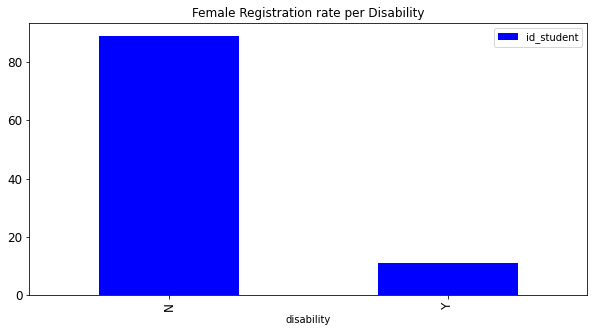

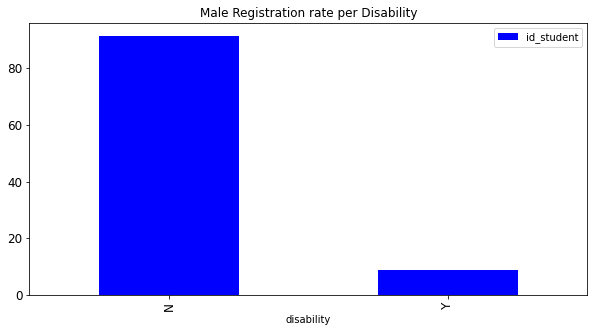

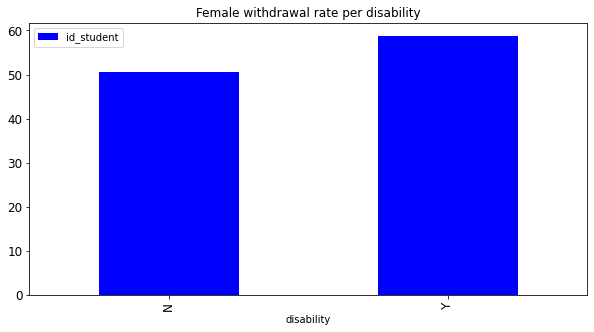

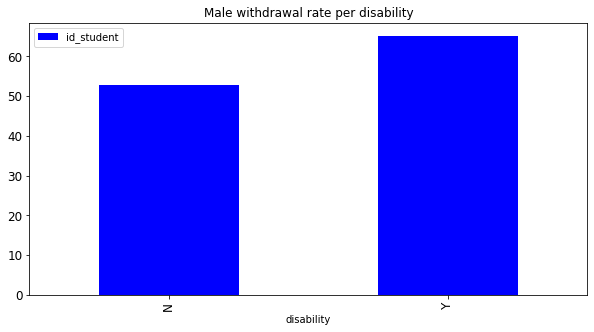

In [31]:
# <aghatpande> on 28-Oct-2017
# Check the enrollment in each Disability
groupbyFemaleStudentRegistrationPerDisabilityDF = femaleRegistrationsDF[["disability", "id_student"]].groupby(["disability"]).agg({'id_student':'count'})
#groupbyFemaleStudentRegistrationPerDisabilityDF
femaleRegistrationRatePerDisabilityDF = (groupbyFemaleStudentRegistrationPerDisabilityDF / len(femaleRegistrationsDF)) *100
#femaleRegistrationRatePerDisabilityDF
femaleRegistrationRatePerDisabilityDF.plot(kind='bar', title = "Female Registration rate per Disability",figsize=(10,5), color="b", fontsize=12 )

groupbyMaleStudentRegistrationPerDisabilityDF = maleRegistrationsDF[["disability", "id_student"]].groupby(["disability"]).agg({'id_student':'count'})
#groupbyMaleStudentRegistrationPerDisabilityDF
maleRegistrationRatePerDisabilityDF = (groupbyMaleStudentRegistrationPerDisabilityDF / len(maleRegistrationsDF)) *100
#maleRegistrationRatePerDisabilityDF
maleRegistrationRatePerDisabilityDF.plot(kind='bar', title = "Male Registration rate per Disability",figsize=(10,5), color="b", fontsize=12 )

# Check the withdrawals in each Disability
groupbyFemaleStudentWithdrawalPerDisabilityDF = femaleUnregisteredCoursesDF[["disability", "id_student"]].groupby("disability").agg({'id_student':'count'})
#groupbyFemaleStudentWithdrawalPerDisabilityDF
#Take the ratio to find the withdrawal rate per Disability
femaleWithdrawalRatePerDisabilityDF = ((groupbyFemaleStudentWithdrawalPerDisabilityDF / groupbyFemaleStudentRegistrationPerDisabilityDF)*100)
#femaleWithdrawalRatePerDisabilityDF
femaleWithdrawalRatePerDisabilityDF.plot(kind='bar', title = "Female withdrawal rate per disability",figsize=(10,5), color="b", fontsize=12 )

groupbyMaleStudentWithdrawalPerDisabilityDF = maleUnregisteredCoursesDF[["disability", "id_student"]].groupby("disability").agg({'id_student':'count'})
#groupbyMaleStudentWithdrawalPerDisabilityDF
#Take the ratio to find the withdrawal rate per Disability
maleWithdrawalRatePerDisabilityDF = ((groupbyMaleStudentWithdrawalPerDisabilityDF / groupbyMaleStudentRegistrationPerDisabilityDF)*100)
#maleWithdrawalRatePerDisabilityDF
maleWithdrawalRatePerDisabilityDF.plot(kind='bar', title = "Male withdrawal rate per disability",figsize=(10,5), color="b", fontsize=12 )

#### Lets analyze the registration rate and withdrawal rate per gender as per geograhical region

<AxesSubplot:title={'center':'Female Registration rate per Region'}, xlabel='region'>

<AxesSubplot:title={'center':'Male Registration rate per Region'}, xlabel='region'>

<AxesSubplot:title={'center':'Female withdrawal rate per Region'}, xlabel='region'>

<AxesSubplot:title={'center':'Male withdrawal rate per Region'}, xlabel='region'>

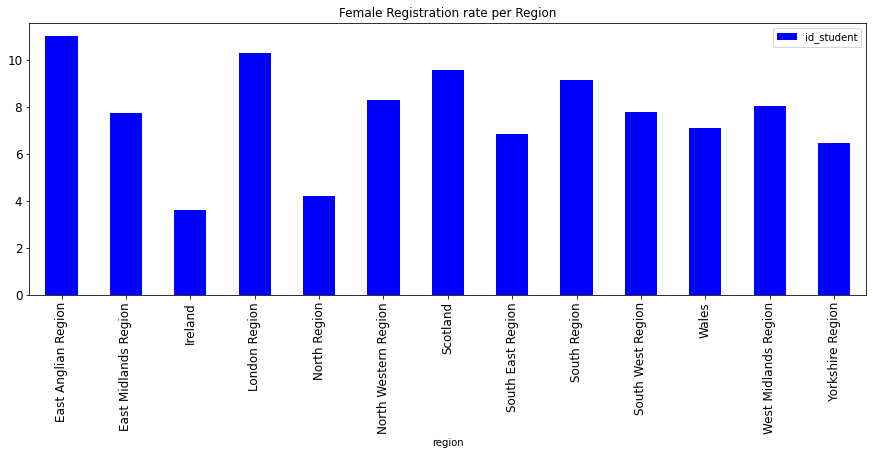

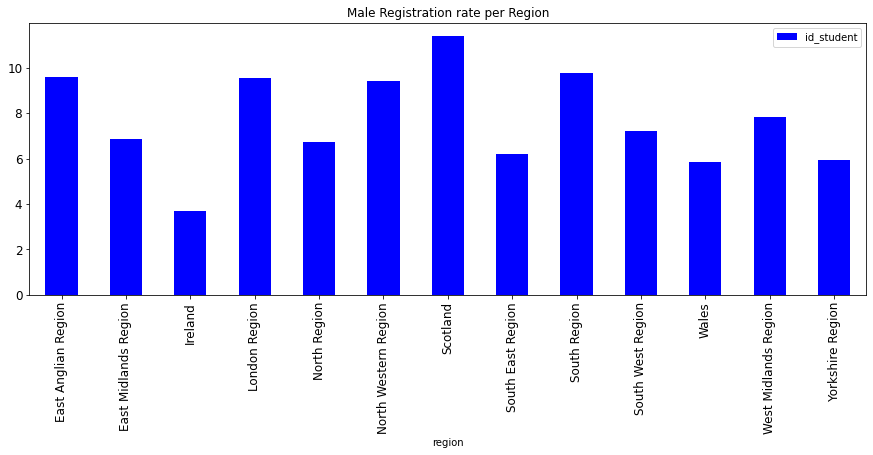

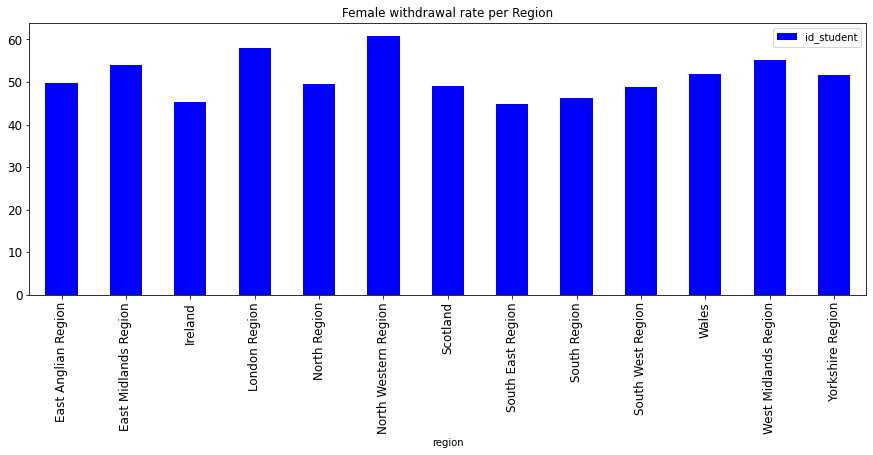

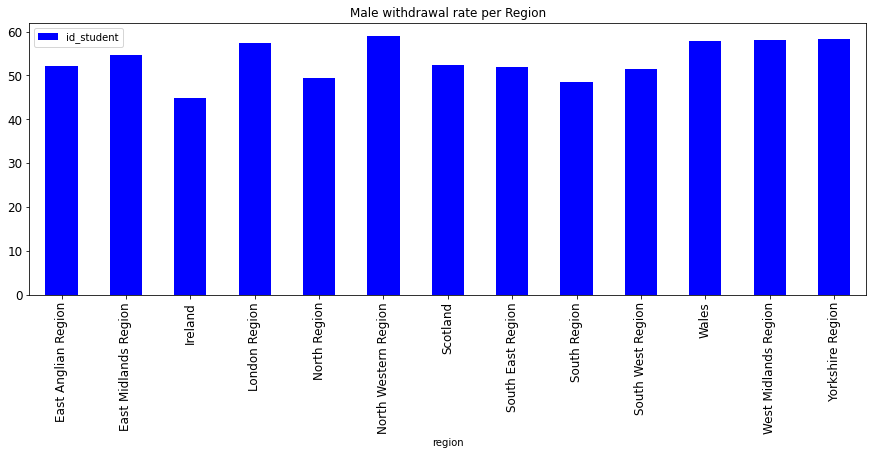

In [32]:
# <aghatpande> on 02-Nov-2017
# Check the enrollment in each region
groupbyFemaleStudentRegistrationPerRegionDF = femaleRegistrationsDF[["region", "id_student"]].groupby(["region"]).agg({'id_student':'count'})
#groupbyFemaleStudentRegistrationPerRegionDF
femaleRegistrationRatePerRegionDF = (groupbyFemaleStudentRegistrationPerRegionDF / len(femaleRegistrationsDF)) *100
#femaleRegistrationRatePerRegionDF
femaleRegistrationRatePerRegionDF.plot(kind='bar', title = "Female Registration rate per Region",figsize=(15,5), color="b", fontsize=12 )

groupbyMaleStudentRegistrationPerRegionDF = maleRegistrationsDF[["region", "id_student"]].groupby(["region"]).agg({'id_student':'count'})
#groupbyMaleStudentRegistrationPerRegionDF
maleRegistrationRatePerRegionDF = (groupbyMaleStudentRegistrationPerRegionDF / len(maleRegistrationsDF)) *100
#maleRegistrationRatePerRegionDF
maleRegistrationRatePerRegionDF.plot(kind='bar', title = "Male Registration rate per Region",figsize=(15,5), color="b", fontsize=12 )

# Check the withdrawals in each Region
groupbyFemaleStudentWithdrawalPerRegionDF = femaleUnregisteredCoursesDF[["region", "id_student"]].groupby("region").agg({'id_student':'count'})
#groupbyFemaleStudentWithdrawalPerRegionDF
#Take the ratio to find the withdrawal rate per Region
femaleWithdrawalRatePerRegionDF = ((groupbyFemaleStudentWithdrawalPerRegionDF / groupbyFemaleStudentRegistrationPerRegionDF)*100)
#femaleWithdrawalRatePerRegionDF
femaleWithdrawalRatePerRegionDF.plot(kind='bar', title = "Female withdrawal rate per Region",figsize=(15,5), color="b", fontsize=12 )

groupbyMaleStudentWithdrawalPerRegionDF = maleUnregisteredCoursesDF[["region", "id_student"]].groupby("region").agg({'id_student':'count'})
#groupbyMaleStudentWithdrawalPerRegionDF
#Take the ratio to find the withdrawal rate per Region
maleWithdrawalRatePerRegionDF = ((groupbyMaleStudentWithdrawalPerRegionDF / groupbyMaleStudentRegistrationPerRegionDF)*100)
#maleWithdrawalRatePerRegionDF
maleWithdrawalRatePerRegionDF.plot(kind='bar', title = "Male withdrawal rate per Region",figsize=(15,5), color="b", fontsize=12 )

#### Lets do analysis on student VLE interactions
# VLE 데이터 전처리

In [33]:
# <aghatpande> on 02-Nov-2017
# Merge the StudentVLE with VLEInfo to find the impact of clicks on withdrawal
studentVLEInteractionDF = pd.merge(studentVleDF, vleDF, how='left', on=['id_site', 'code_module', 'code_presentation'])
studentVLEInteractionWithStudentRegistrationAndInfoDF = pd.merge(studentVLEInteractionDF, studentInfoWithStudentRegistrationsDF, how='left', on=['id_student', 'code_module', 'code_presentation'])

In [34]:
studentInfoWithStudentRegistrationsDF

,code_module,code_presentation,id_student,date_registration,date_unregistration,Year,Term,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,-159.0,NaN,2013,J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,-53.0,NaN,2013,J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,-92.0,12.0,2013,J,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,-52.0,NaN,2013,J,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,-176.0,NaN,2013,J,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN,2014,J,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,-23.0,NaN,2014,J,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,-129.0,NaN,2014,J,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,-49.0,101.0,2014,J,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [35]:
studentVLEInteractionWithStudentRegistrationAndInfoDF 

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,week_from,week_to,date_registration,date_unregistration,Year,Term,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,28400,546652,-10,4,forumng,NaN,NaN,-53.0,NaN,2013,J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
1,AAA,2013J,28400,546652,-10,1,forumng,NaN,NaN,-53.0,NaN,2013,J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,28400,546652,-10,1,forumng,NaN,NaN,-53.0,NaN,2013,J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
3,AAA,2013J,28400,546614,-10,11,homepage,NaN,NaN,-53.0,NaN,2013,J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
4,AAA,2013J,28400,546714,-10,1,oucontent,NaN,NaN,-53.0,NaN,2013,J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3,homepage,NaN,NaN,-63.0,NaN,2014,J,F,East Anglian Region,Lower Than A Level,60-70%,35-55,0,30,N,Distinction
10655276,GGG,2014J,675578,896943,269,1,homepage,NaN,NaN,-32.0,NaN,2014,J,F,East Anglian Region,Lower Than A Level,50-60%,35-55,0,30,N,Pass
10655277,GGG,2014J,654064,896943,269,3,homepage,NaN,NaN,-16.0,NaN,2014,J,F,Scotland,A Level or Equivalent,40-50%,0-35,0,30,N,Pass
10655278,GGG,2014J,654064,896939,269,1,forumng,NaN,NaN,-16.0,NaN,2014,J,F,Scotland,A Level or Equivalent,40-50%,0-35,0,30,N,Pass


In [36]:
# <aghatpande> on 02-Nov-2017
# Lets seperate out different dataframes so that they can be used further in the code
femaleVLEDF = studentVLEInteractionWithStudentRegistrationAndInfoDF[studentVLEInteractionWithStudentRegistrationAndInfoDF.gender == 'F']
maleVLEDF = studentVLEInteractionWithStudentRegistrationAndInfoDF[studentVLEInteractionWithStudentRegistrationAndInfoDF.gender == 'M']
withdrawnFemaleVLEDF = femaleVLEDF[(femaleVLEDF.final_result=="Fail") | (femaleVLEDF.final_result=="Withdrawn")]
completedFemaleVLEDF = femaleVLEDF[(femaleVLEDF.final_result=="Pass") | (femaleVLEDF.final_result=="Distinction")]
withdrawnMaleVLEDF = maleVLEDF[(maleVLEDF.final_result=="Fail") | (maleVLEDF.final_result=="Withdrawn")]
completedMaleVLEDF = maleVLEDF[(maleVLEDF.final_result=="Pass") | (maleVLEDF.final_result=="Distinction")]

In [37]:
# <aghatpande> on 02-Nov-2017
# The Dataframes for overall course withdrawal and completion with StudentVLE information
courseWithdrawnVLEDF = studentVLEInteractionWithStudentRegistrationAndInfoDF[(studentVLEInteractionWithStudentRegistrationAndInfoDF.final_result=="Fail") | (studentVLEInteractionWithStudentRegistrationAndInfoDF.final_result=="Withdrawn")]
courseCompletedVLEDF = studentVLEInteractionWithStudentRegistrationAndInfoDF[(studentVLEInteractionWithStudentRegistrationAndInfoDF.final_result=="Pass") | (studentVLEInteractionWithStudentRegistrationAndInfoDF.final_result=="Distinction")]

In [38]:
courseWithdrawnVLEDF

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,week_from,week_to,date_registration,date_unregistration,Year,Term,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
14,AAA,2013J,30268,546652,-10,3,forumng,NaN,NaN,-92.0,12.0,2013,J,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
15,AAA,2013J,30268,546662,-10,2,oucontent,NaN,NaN,-92.0,12.0,2013,J,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
16,AAA,2013J,30268,546614,-10,3,homepage,NaN,NaN,-92.0,12.0,2013,J,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
17,AAA,2013J,30268,546652,-10,2,forumng,NaN,NaN,-92.0,12.0,2013,J,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
108,AAA,2013J,65002,546614,-10,3,homepage,NaN,NaN,-180.0,96.0,2013,J,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,60,N,Withdrawn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10655195,GGG,2014J,674939,897082,265,2,resource,NaN,NaN,-21.0,NaN,2014,J,F,West Midlands Region,A Level or Equivalent,70-80%,0-35,0,30,N,Fail
10655198,GGG,2014J,642879,896943,265,2,homepage,NaN,NaN,-66.0,NaN,2014,J,F,London Region,Lower Than A Level,20-30%,0-35,0,30,Y,Fail
10655232,GGG,2014J,568852,896943,267,1,homepage,NaN,NaN,-94.0,NaN,2014,J,F,South Region,Lower Than A Level,30-40%,35-55,0,120,N,Fail
10655258,GGG,2014J,602360,896943,268,3,homepage,NaN,NaN,-18.0,NaN,2014,J,F,Yorkshire Region,A Level or Equivalent,0-10%,0-35,2,30,N,Fail


In [39]:
courseCompletedVLEDF

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,week_from,week_to,date_registration,date_unregistration,Year,Term,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,28400,546652,-10,4,forumng,NaN,NaN,-53.0,NaN,2013,J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
1,AAA,2013J,28400,546652,-10,1,forumng,NaN,NaN,-53.0,NaN,2013,J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,28400,546652,-10,1,forumng,NaN,NaN,-53.0,NaN,2013,J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
3,AAA,2013J,28400,546614,-10,11,homepage,NaN,NaN,-53.0,NaN,2013,J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
4,AAA,2013J,28400,546714,-10,1,oucontent,NaN,NaN,-53.0,NaN,2013,J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3,homepage,NaN,NaN,-63.0,NaN,2014,J,F,East Anglian Region,Lower Than A Level,60-70%,35-55,0,30,N,Distinction
10655276,GGG,2014J,675578,896943,269,1,homepage,NaN,NaN,-32.0,NaN,2014,J,F,East Anglian Region,Lower Than A Level,50-60%,35-55,0,30,N,Pass
10655277,GGG,2014J,654064,896943,269,3,homepage,NaN,NaN,-16.0,NaN,2014,J,F,Scotland,A Level or Equivalent,40-50%,0-35,0,30,N,Pass
10655278,GGG,2014J,654064,896939,269,1,forumng,NaN,NaN,-16.0,NaN,2014,J,F,Scotland,A Level or Equivalent,40-50%,0-35,0,30,N,Pass


In [40]:
# Store the local copy of these Dataframes, so that we dont have to compute it again.

courseCompletedVLEDF.to_csv("Created-Dataframes\\courseCompletedVLEDF.csv")
courseWithdrawnVLEDF.to_csv("Created-Dataframes\\courseWithdrawnVLEDF.csv")
#femaleVLEDF.to_csv("Created-Dataframes\\femaleVLEDF.csv")
#maleVLEDF.to_csv("Created-Dataframes\\maleVLEDF.csv")
#withdrawnFemaleVLEDF.to_csv("Created-Dataframes\\femaleWithdrawnVLEDF.csv")
#completedFemaleVLEDF.to_csv("Created-Dataframes\\femaleCompletedVLEDF.csv")
#withdrawnMaleVLEDF.to_csv("Created-Dataframes\\maleWithdrawnVLEDF.csv")
#completedMaleVLEDF.to_csv("Created-Dataframes\\maleCompletedVLEDF.csv")

In [41]:
# <aghatpande> on 02-Nov-2017
# Calculate the total clicks per code_module
groupbyCourseCompletedVLEDF = courseCompletedVLEDF.groupby(["code_module","activity_type"]).agg({'sum_click':'sum'})
groupbyCourseWithdrawnVLEDF = courseWithdrawnVLEDF.groupby(["code_module","activity_type"]).agg({'sum_click':'sum'})

In [42]:
groupbyCourseCompletedVLEDF

sum_click
code_module activity_type            
AAA         dataplus             3036
            forumng            292767
            glossary              480
            homepage           230844
            oucollaborate         377
            oucontent          452445
            resource            12437
            subpage             60190
            url                 24621
BBB         forumng           1745041
            glossary             7774
            homepage           914757
            oucollaborate       10835
            oucontent          804474
            ouelluminate         1078
            questionnaire        6370
            quiz               370833
            resource           163252
            sharedsubpage         106
            subpage            207479
            url                 64505
CCC         forumng            519803
            homepage           555470
            oucollaborate        7756
            oucontent          363535
            page                 3738
            quiz              1644211
            resource           153971
            subpage            247494
            url                 19087
DDD         externalquiz        47888
            forumng           1165125
            glossary            52597
            homepage          1047009
            oucollaborate       43847
            oucontent          440682
            ouelluminate         9813
            ouwiki             205146
            page                  741
            resource           214615
            subpage            711983
            url                116016
EEE         dualpane             3625
            forumng            711106
            homepage           564060
            oucollaborate        5758
            oucontent         1288982
            ouwiki             436071
            page                  824
            quiz               248746
            resource            46321
            subpage             69045
            url                 80946
FFF         dataplus            42306
            dualpane            13385
            folder               4898
            forumng           1863241
            glossary             5304
            homepage          1937298
            htmlactivity         5888
            oucollaborate       20009
            oucontent         5439529
            ouelluminate        17510
            ouwiki             121384
            page                39530
            questionnaire       49977
            quiz              3170713
            repeatactivity          2
            resource           171301
            subpage           1239558
            url                132926
GGG         forumng            212051
            glossary             6931
            homepage           237649
            oucontent          417836
            quiz               176031
            resource            53665
            subpage             41123

In [43]:
groupbyCourseWithdrawnVLEDF

sum_click
code_module activity_type            
AAA         dataplus              362
            forumng             44336
            glossary              176
            homepage            35876
            oucollaborate         121
            oucontent           70949
            resource             2487
            subpage             11392
            url                  3756
BBB         forumng            364679
            glossary             2046
            homepage           222035
            oucollaborate        1721
            oucontent          116786
            ouelluminate          355
            questionnaire         360
            quiz                92162
            resource            50353
            sharedsubpage          65
            subpage             66121
            url                 20989
CCC         forumng            123291
            homepage           200562
            oucollaborate        2066
            oucontent          152967
            page                  450
            quiz               519899
            resource            63875
            subpage             95080
            url                  8894
DDD         externalquiz        16404
            forumng            328250
            glossary            10739
            homepage           386197
            oucollaborate        9543
            oucontent          245649
            ouelluminate         3752
            ouwiki              70721
            page                  795
            resource            87029
            subpage            267999
            url                 47549
EEE         dualpane             1246
            forumng             81550
            homepage            90465
            oucollaborate        1162
            oucontent          225745
            ouwiki              21868
            page                   55
            quiz                74026
            resource             6102
            subpage             14225
            url                 12299
FFF         dataplus             1764
            dualpane             2460
            folder                522
            forumng            494919
            glossary              838
            homepage           481037
            htmlactivity         3351
            oucollaborate        5779
            oucontent         1127687
            ouelluminate         6520
            ouwiki              39322
            page                17498
            questionnaire        8057
            quiz               660313
            repeatactivity          7
            resource            65774
            subpage            368201
            url                 35114
GGG         forumng             27231
            glossary             1077
            homepage            45805
            oucontent           59537
            quiz                24306
            resource            18950
            subpage             11692

In [44]:
courseCompletionRatioDF = (groupbyCourseCompletedVLEDF / groupbyCourseWithdrawnVLEDF)

In [45]:
courseCompletionRatioDF

sum_click
code_module activity_type            
AAA         dataplus         8.386740
            forumng          6.603370
            glossary         2.727273
            homepage         6.434497
            oucollaborate    3.115702
            oucontent        6.377045
            resource         5.000804
            subpage          5.283532
            url              6.555112
BBB         forumng          4.785143
            glossary         3.799609
            homepage         4.119877
            oucollaborate    6.295758
            oucontent        6.888446
            ouelluminate     3.036620
            questionnaire   17.694444
            quiz             4.023708
            resource         3.242150
            sharedsubpage    1.630769
            subpage          3.137868
            url              3.073276
CCC         forumng          4.216066
            homepage         2.769568
            oucollaborate    3.754114
            oucontent        2.376558
            page             8.306667
            quiz             3.162558
            resource         2.410505
            subpage          2.603008
            url              2.146054
DDD         externalquiz     2.919288
            forumng          3.549505
            glossary         4.897756
            homepage         2.711075
            oucollaborate    4.594677
            oucontent        1.793950
            ouelluminate     2.615405
            ouwiki           2.900779
            page             0.932075
            resource         2.466017
            subpage          2.656663
            url              2.439925
EEE         dualpane         2.909310
            forumng          8.719877
            homepage         6.235119
            oucollaborate    4.955250
            oucontent        5.709903
            ouwiki          19.941055
            page            14.981818
            quiz             3.360252
            resource         7.591118
            subpage          4.853779
            url              6.581511
FFF         dataplus        23.982993
            dualpane         5.441057
            folder           9.383142
            forumng          3.764739
            glossary         6.329356
            homepage         4.027337
            htmlactivity     1.757087
            oucollaborate    3.462364
            oucontent        4.823616
            ouelluminate     2.685583
            ouwiki           3.086923
            page             2.259115
            questionnaire    6.202929
            quiz             4.801833
            repeatactivity   0.285714
            resource         2.604388
            subpage          3.366525
            url              3.785556
GGG         forumng          7.787118
            glossary         6.435469
            homepage         5.188276
            oucontent        7.018090
            quiz             7.242286
            resource         2.831926
            subpage          3.517191

In [46]:
groupbyCompletedCoursesClicks = courseCompletedVLEDF.groupby("activity_type").agg({'sum_click':'sum'})
groupbyUnregisteredCoursesClicks = courseWithdrawnVLEDF.groupby("activity_type").agg({'sum_click':'sum'})

In [47]:
groupbyUnregisteredCoursesClicks

,sum_click
activity_type,
dataplus,2126
dualpane,3706
externalquiz,16404
folder,522
forumng,1464256
glossary,14876
homepage,1461977
htmlactivity,3351
oucollaborate,20392


In [48]:
groupbyCompletedCoursesClicks 

,sum_click
activity_type,
dataplus,45342
dualpane,17010
externalquiz,47888
folder,4898
forumng,6509134
glossary,73086
homepage,5487087
htmlactivity,5888
oucollaborate,88582


#### The following ratio will tell us which activity was done the most and least by students who withdrew from course

In [49]:
totalClicksForUnregisteredCourses = groupbyUnregisteredCoursesClicks["sum_click"].sum()
#totalClicksForUnregisteredCourses

In [50]:
totalClicksForUnregisteredCourses

7785342

In [51]:
(groupbyUnregisteredCoursesClicks / totalClicksForUnregisteredCourses)*100

,sum_click
activity_type,
dataplus,0.027308
dualpane,0.047602
externalquiz,0.210704
folder,0.006705
forumng,18.807857
glossary,0.191077
homepage,18.778584
htmlactivity,0.043042
oucollaborate,0.261928


In [52]:
print((totalClicksForUnregisteredCourses/groupbyUnregisteredCoursesClicks ))


                   sum_click
activity_type               
dataplus        3.661967e+03
dualpane        2.100740e+03
externalquiz    4.746002e+02
folder          1.491445e+04
forumng         5.316927e+00
glossary        5.233492e+02
homepage        5.325215e+00
htmlactivity    2.323289e+03
oucollaborate   3.817841e+02
oucontent       3.893995e+00
ouelluminate    7.326002e+02
ouwiki          5.901966e+01
page            4.141580e+02
questionnaire   9.249545e+02
quiz            5.679804e+00
repeatactivity  1.112192e+06
resource        2.642951e+01
sharedsubpage   1.197745e+05
subpage         9.327002e+00
url             6.053874e+01


#### The following ratio will tell us which activity was done the most and least by students who completed the course

In [53]:
totalClicksForCompletedCourses = groupbyCompletedCoursesClicks["sum_click"].sum()
#totalClicksForCompletedCourses

In [54]:
(groupbyCompletedCoursesClicks / totalClicksForCompletedCourses)*100

,sum_click
activity_type,
dataplus,0.142496
dualpane,0.053457
externalquiz,0.150498
folder,0.015393
forumng,20.456266
glossary,0.229687
homepage,17.244277
htmlactivity,0.018504
oucollaborate,0.278387


#### Lets analyze how much more interaction students did with the VLE when they completed the course 

In [55]:
totalClicksForCompletedCourses / totalClicksForUnregisteredCourses

4.087136698683244

#### Activity wise interaction ratio of completed to withdrawn courses

In [56]:
overallClicksRatio = (groupbyCompletedCoursesClicks / groupbyUnregisteredCoursesClicks)
overallClicksRatio

,sum_click
activity_type,
dataplus,21.327375
dualpane,4.589854
externalquiz,2.919288
folder,9.383142
forumng,4.445352
glossary,4.913014
homepage,3.753197
htmlactivity,1.757087
oucollaborate,4.343958


## Lets find out the most important parameters for Churn/success

#### Dependent variable - final_result
#### Preliminary experiment 
# 실험 1
# 기존 연구를 참고하여, 아래 변수 선정
# 개인정보+VLE중 대표성이 있는 클릭 변수

개인:
"date_registration",
"gender",
"region",
"highest_education", 
"imd_band", 
"age_band",
"num_of_prev_attempts",
"studied_credits",
"disability", 

VLE:
"Totalclicks","forumng","homepage","oucontent","quiz","resource","subpage","url",

예측:
"FinalResult":1=pass, 0=at risk

In [57]:
studentVLEInteractionWithStudentRegistrationAndInfoDF

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,week_from,week_to,date_registration,date_unregistration,Year,Term,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,28400,546652,-10,4,forumng,NaN,NaN,-53.0,NaN,2013,J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
1,AAA,2013J,28400,546652,-10,1,forumng,NaN,NaN,-53.0,NaN,2013,J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,28400,546652,-10,1,forumng,NaN,NaN,-53.0,NaN,2013,J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
3,AAA,2013J,28400,546614,-10,11,homepage,NaN,NaN,-53.0,NaN,2013,J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
4,AAA,2013J,28400,546714,-10,1,oucontent,NaN,NaN,-53.0,NaN,2013,J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3,homepage,NaN,NaN,-63.0,NaN,2014,J,F,East Anglian Region,Lower Than A Level,60-70%,35-55,0,30,N,Distinction
10655276,GGG,2014J,675578,896943,269,1,homepage,NaN,NaN,-32.0,NaN,2014,J,F,East Anglian Region,Lower Than A Level,50-60%,35-55,0,30,N,Pass
10655277,GGG,2014J,654064,896943,269,3,homepage,NaN,NaN,-16.0,NaN,2014,J,F,Scotland,A Level or Equivalent,40-50%,0-35,0,30,N,Pass
10655278,GGG,2014J,654064,896939,269,1,forumng,NaN,NaN,-16.0,NaN,2014,J,F,Scotland,A Level or Equivalent,40-50%,0-35,0,30,N,Pass


#### Lets find the churn parameters for course AAA

In [58]:

#coursesAAADF = studentVLEInteractionWithStudentRegistrationAndInfoDF[studentVLEInteractionWithStudentRegistrationAndInfoDF.code_module == "AAA"]



In [59]:
coursesAAADF = studentVLEInteractionWithStudentRegistrationAndInfoDF[studentVLEInteractionWithStudentRegistrationAndInfoDF.code_module != None]


In [60]:
coursesAAADF 

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,week_from,week_to,date_registration,date_unregistration,Year,Term,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,28400,546652,-10,4,forumng,NaN,NaN,-53.0,NaN,2013,J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
1,AAA,2013J,28400,546652,-10,1,forumng,NaN,NaN,-53.0,NaN,2013,J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,28400,546652,-10,1,forumng,NaN,NaN,-53.0,NaN,2013,J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
3,AAA,2013J,28400,546614,-10,11,homepage,NaN,NaN,-53.0,NaN,2013,J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
4,AAA,2013J,28400,546714,-10,1,oucontent,NaN,NaN,-53.0,NaN,2013,J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3,homepage,NaN,NaN,-63.0,NaN,2014,J,F,East Anglian Region,Lower Than A Level,60-70%,35-55,0,30,N,Distinction
10655276,GGG,2014J,675578,896943,269,1,homepage,NaN,NaN,-32.0,NaN,2014,J,F,East Anglian Region,Lower Than A Level,50-60%,35-55,0,30,N,Pass
10655277,GGG,2014J,654064,896943,269,3,homepage,NaN,NaN,-16.0,NaN,2014,J,F,Scotland,A Level or Equivalent,40-50%,0-35,0,30,N,Pass
10655278,GGG,2014J,654064,896939,269,1,forumng,NaN,NaN,-16.0,NaN,2014,J,F,Scotland,A Level or Equivalent,40-50%,0-35,0,30,N,Pass


In [61]:
#sumOfclicksForcoursesAAADF = coursesAAADF.groupby(["code_module", "code_presentation", "id_student","activity_type"]).agg({"sum_click":"sum"})

In [62]:
activity_type_count=coursesAAADF.groupby(["code_module", "code_presentation","id_student"]).agg({"id_student":"count"})
activity_type_count
Totalstudent_vle=activity_type_count.groupby(["code_module", "code_presentation"]).agg({"count"})
Totalstudent_vle

id_student
code_module code_presentation id_student            
AAA         2013J             11391              196
                              28400              430
                              30268               76
                              31604              663
                              32885              352
...                                              ...
GGG         2014J             2640965             19
                              2645731            237
                              2648187            108
                              2679821             61
                              2684003            181

[29228 rows x 1 columns]

id_student
                                   count
code_module code_presentation           
AAA         2013J                    378
            2014J                    357
BBB         2013B                   1537
            2013J                   1870
            2014B                   1294
            2014J                   1921
CCC         2014B                   1681
            2014J                   2302
DDD         2013B                   1214
            2013J                   1768
            2014B                   1116
            2014J                   1647
EEE         2013J                    964
            2014B                    624
            2014J                   1097
FFF         2013B                   1510
            2013J                   2098
            2014B                   1363
            2014J                   2121
GGG         2013J                    895
            2014B                    773
            2014J                    698

In [63]:

Totalstudent=studentInfoDF.groupby(["code_module", "code_presentation"]).agg({"id_student":"count"})
Totalstudent

id_student
code_module code_presentation            
AAA         2013J                     383
            2014J                     365
BBB         2013B                    1767
            2013J                    2237
            2014B                    1613
            2014J                    2292
CCC         2014B                    1936
            2014J                    2498
DDD         2013B                    1303
            2013J                    1938
            2014B                    1228
            2014J                    1803
EEE         2013J                    1052
            2014B                     694
            2014J                    1188
FFF         2013B                    1614
            2013J                    2283
            2014B                    1500
            2014J                    2365
GGG         2013J                     952
            2014B                     833
            2014J                     749

In [64]:
studentInfoDF

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,Year,Term
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,2013,J
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,2013,J
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,2013,J
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,2013,J
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,2013,J
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,2014,J
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,2014,J
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,2014,J
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,2014,J


In [65]:
sumOfclicksForcoursesAAADF = coursesAAADF.groupby(["code_module", "code_presentation", "id_student","activity_type"]).agg({"sum_click":"sum"}).unstack(level=3)

#sumOfclicksForcoursesAAADF.to_csv("Created-Dataframes\\sumOfClicksForCourseAAA.csv",header=2)
#sumOfClicksForAAADF = pd.read_csv("Created-Dataframes\\sumOfClicksForCourseAAA.csv")
#sumOfClicksForAAADF["Totalclicks"] = sumOfClicksForAAADF["sum_click"]


In [66]:
sumOfclicksForcoursesAAADF.to_csv("Created-Dataframes\\sumOfoneClicksForCourseAAA.csv")
sumOfoneClicksForAAADF = pd.read_csv("Created-Dataframes\\sumOfoneClicksForCourseAAA.csv",header=1)
sumOfoneClicksForAAADF.rename(columns={'activity_type':'code_module',"Unnamed: 1":"code_presentation","Unnamed: 2":"id_student"}, inplace = True)
sumOfoneClicksForAAADF=sumOfoneClicksForAAADF.drop([0])

In [67]:
sumOfoneClicksForAAADF[["id_student"]]=sumOfoneClicksForAAADF[["id_student"]].astype("object")


In [68]:
#sumOfoneClicksForAAADF.sort_values("id_student")
sumOfoneClicksForAAADF

,code_module,code_presentation,id_student,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
1,AAA,2013J,11391,NaN,NaN,NaN,NaN,193.0,NaN,138.0,NaN,NaN,553.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,32.0,5.0
2,AAA,2013J,28400,10.0,NaN,NaN,NaN,417.0,NaN,324.0,NaN,NaN,537.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,87.0,48.0
3,AAA,2013J,30268,NaN,NaN,NaN,NaN,126.0,NaN,59.0,NaN,NaN,66.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,22.0,4.0
4,AAA,2013J,31604,2.0,NaN,NaN,NaN,634.0,1.0,432.0,NaN,NaN,836.0,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,144.0,90.0
5,AAA,2013J,32885,NaN,NaN,NaN,NaN,194.0,4.0,204.0,NaN,NaN,494.0,NaN,NaN,NaN,NaN,NaN,NaN,45.0,NaN,79.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29224,GGG,2014J,2640965,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,9.0,NaN
29225,GGG,2014J,2645731,NaN,NaN,NaN,NaN,65.0,5.0,167.0,NaN,NaN,348.0,NaN,NaN,NaN,NaN,152.0,NaN,109.0,NaN,47.0,NaN
29226,GGG,2014J,2648187,NaN,NaN,NaN,NaN,NaN,1.0,63.0,NaN,NaN,79.0,NaN,NaN,NaN,NaN,130.0,NaN,19.0,NaN,20.0,NaN
29227,GGG,2014J,2679821,NaN,NaN,NaN,NaN,118.0,NaN,65.0,NaN,NaN,40.0,NaN,NaN,NaN,NaN,31.0,NaN,9.0,NaN,12.0,NaN


In [69]:
sumOftotalclicksForcoursesAAADF = coursesAAADF.groupby(["code_module", "code_presentation", "id_student"]).agg({"sum_click":"sum"})


sumOftotalclicksForcoursesAAADF.to_csv("Created-Dataframes\\sumOftotalclicksForcoursesAAADF.csv")
sumOftotalClicksForAAADF = pd.read_csv("Created-Dataframes\\sumOftotalclicksForcoursesAAADF.csv",header=0)
#sumOftotalClicksForAAADF.rename(columns={"sum_click":"Totalclicks"}, inplace = True)
#sumOfClicksForAAADF["Totalclicks"] = sumOfClicksForAAADF["sum_click"]
sumOftotalClicksForAAADF.rename(columns={"sum_click":"Totalclicks"}, inplace = True)

In [70]:

sumOftotalclicksForcoursesAAADF



sum_click
code_module code_presentation id_student           
AAA         2013J             11391             934
                              28400            1435
                              30268             281
                              31604            2158
                              32885            1034
...                                             ...
GGG         2014J             2640965            41
                              2645731           893
                              2648187           312
                              2679821           275
                              2684003           616

[29228 rows x 1 columns]

In [71]:
sumOftotalClicksForAAADF.dtypes

code_module          object
code_presentation    object
id_student            int64
Totalclicks           int64
dtype: object

In [72]:
#sumOftotalClicksForAAADF.round(0)
#sumOftotalClicksForAAADF.sort_values("id_student")
sumOftotalClicksForAAADF[sumOftotalClicksForAAADF.id_student==23629]

,code_module,code_presentation,id_student,Totalclicks
735,BBB,2013B,23629,161


In [73]:
#sumOftotalClicksForAAADF[["id_student"]]=sumOftotalClicksForAAADF[["id_student"]].astype("int")
sumOftotalClicksForAAADF[["id_student"]]=sumOftotalClicksForAAADF[["id_student"]].astype("object")

In [74]:
sumOftotalClicksForAAADF.dtypes

code_module          object
code_presentation    object
id_student           object
Totalclicks           int64
dtype: object

In [75]:
#sumOfClicksForAAADF=pd.merge(sumOftotalClicksForAAADF,sumOfoneClicksForAAADF,  how='right', on=['code_module', 'code_presentation','id_student'])

In [76]:
sumOfoneClicksForAAADF

,code_module,code_presentation,id_student,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
1,AAA,2013J,11391,NaN,NaN,NaN,NaN,193.0,NaN,138.0,NaN,NaN,553.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,32.0,5.0
2,AAA,2013J,28400,10.0,NaN,NaN,NaN,417.0,NaN,324.0,NaN,NaN,537.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,87.0,48.0
3,AAA,2013J,30268,NaN,NaN,NaN,NaN,126.0,NaN,59.0,NaN,NaN,66.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,22.0,4.0
4,AAA,2013J,31604,2.0,NaN,NaN,NaN,634.0,1.0,432.0,NaN,NaN,836.0,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,144.0,90.0
5,AAA,2013J,32885,NaN,NaN,NaN,NaN,194.0,4.0,204.0,NaN,NaN,494.0,NaN,NaN,NaN,NaN,NaN,NaN,45.0,NaN,79.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29224,GGG,2014J,2640965,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,9.0,NaN
29225,GGG,2014J,2645731,NaN,NaN,NaN,NaN,65.0,5.0,167.0,NaN,NaN,348.0,NaN,NaN,NaN,NaN,152.0,NaN,109.0,NaN,47.0,NaN
29226,GGG,2014J,2648187,NaN,NaN,NaN,NaN,NaN,1.0,63.0,NaN,NaN,79.0,NaN,NaN,NaN,NaN,130.0,NaN,19.0,NaN,20.0,NaN
29227,GGG,2014J,2679821,NaN,NaN,NaN,NaN,118.0,NaN,65.0,NaN,NaN,40.0,NaN,NaN,NaN,NaN,31.0,NaN,9.0,NaN,12.0,NaN


In [77]:
#sumOftotalClicksForAAADF
sumOftotalClicksForAAADF

,code_module,code_presentation,id_student,Totalclicks
0,AAA,2013J,11391,934
1,AAA,2013J,28400,1435
2,AAA,2013J,30268,281
3,AAA,2013J,31604,2158
4,AAA,2013J,32885,1034
...,...,...,...,...
29223,GGG,2014J,2640965,41
29224,GGG,2014J,2645731,893
29225,GGG,2014J,2648187,312
29226,GGG,2014J,2679821,275


In [78]:
#sumOfClicksForAAADF=sumOfoneClicksForAAADF.join(sumOftotalClicksForAAADF,lsuffix='_l',sort=True) 
#sumOfClicksForAAADF=sumOfoneClicksForAAADF.join(sumOftotalClicksForAAADF,on=["code_module","code_presentation","Id_student"],lsuffix='_l',sort=True) 
sumOfClicksForAAADF=sumOfoneClicksForAAADF.join(sumOftotalClicksForAAADF,on=sumOftotalClicksForAAADF.index,lsuffix='_l') 
#sumOfClicksForAAADF.rename(columns={"code_module_l":"code_module","code_presentation_l":"code_presentation","id_student_l":"id_student"}, inplace = True)
sumOfClicksForAAADF

,code_module_l,code_presentation_l,id_student_l,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,code_module,code_presentation,id_student,Totalclicks
1,AAA,2013J,11391,NaN,NaN,NaN,NaN,193.0,NaN,138.0,NaN,NaN,553.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,32.0,5.0,AAA,2013J,11391,934
2,AAA,2013J,28400,10.0,NaN,NaN,NaN,417.0,NaN,324.0,NaN,NaN,537.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,87.0,48.0,AAA,2013J,28400,1435
3,AAA,2013J,30268,NaN,NaN,NaN,NaN,126.0,NaN,59.0,NaN,NaN,66.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,22.0,4.0,AAA,2013J,30268,281
4,AAA,2013J,31604,2.0,NaN,NaN,NaN,634.0,1.0,432.0,NaN,NaN,836.0,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,144.0,90.0,AAA,2013J,31604,2158
5,AAA,2013J,32885,NaN,NaN,NaN,NaN,194.0,4.0,204.0,NaN,NaN,494.0,NaN,NaN,NaN,NaN,NaN,NaN,45.0,NaN,79.0,14.0,AAA,2013J,32885,1034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29224,GGG,2014J,2640965,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,9.0,NaN,GGG,2014J,2640965,41
29225,GGG,2014J,2645731,NaN,NaN,NaN,NaN,65.0,5.0,167.0,NaN,NaN,348.0,NaN,NaN,NaN,NaN,152.0,NaN,109.0,NaN,47.0,NaN,GGG,2014J,2645731,893
29226,GGG,2014J,2648187,NaN,NaN,NaN,NaN,NaN,1.0,63.0,NaN,NaN,79.0,NaN,NaN,NaN,NaN,130.0,NaN,19.0,NaN,20.0,NaN,GGG,2014J,2648187,312
29227,GGG,2014J,2679821,NaN,NaN,NaN,NaN,118.0,NaN,65.0,NaN,NaN,40.0,NaN,NaN,NaN,NaN,31.0,NaN,9.0,NaN,12.0,NaN,GGG,2014J,2679821,275


In [79]:
sumOfClicksForAAADF

,code_module_l,code_presentation_l,id_student_l,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,code_module,code_presentation,id_student,Totalclicks
1,AAA,2013J,11391,NaN,NaN,NaN,NaN,193.0,NaN,138.0,NaN,NaN,553.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,32.0,5.0,AAA,2013J,11391,934
2,AAA,2013J,28400,10.0,NaN,NaN,NaN,417.0,NaN,324.0,NaN,NaN,537.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,87.0,48.0,AAA,2013J,28400,1435
3,AAA,2013J,30268,NaN,NaN,NaN,NaN,126.0,NaN,59.0,NaN,NaN,66.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,22.0,4.0,AAA,2013J,30268,281
4,AAA,2013J,31604,2.0,NaN,NaN,NaN,634.0,1.0,432.0,NaN,NaN,836.0,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,144.0,90.0,AAA,2013J,31604,2158
5,AAA,2013J,32885,NaN,NaN,NaN,NaN,194.0,4.0,204.0,NaN,NaN,494.0,NaN,NaN,NaN,NaN,NaN,NaN,45.0,NaN,79.0,14.0,AAA,2013J,32885,1034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29224,GGG,2014J,2640965,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,9.0,NaN,GGG,2014J,2640965,41
29225,GGG,2014J,2645731,NaN,NaN,NaN,NaN,65.0,5.0,167.0,NaN,NaN,348.0,NaN,NaN,NaN,NaN,152.0,NaN,109.0,NaN,47.0,NaN,GGG,2014J,2645731,893
29226,GGG,2014J,2648187,NaN,NaN,NaN,NaN,NaN,1.0,63.0,NaN,NaN,79.0,NaN,NaN,NaN,NaN,130.0,NaN,19.0,NaN,20.0,NaN,GGG,2014J,2648187,312
29227,GGG,2014J,2679821,NaN,NaN,NaN,NaN,118.0,NaN,65.0,NaN,NaN,40.0,NaN,NaN,NaN,NaN,31.0,NaN,9.0,NaN,12.0,NaN,GGG,2014J,2679821,275


In [80]:
sumOfClicksForAAADF=sumOfClicksForAAADF.drop(columns={"code_module_l","code_presentation_l","id_student_l"})
#sumOfClicksForAAADF=sumOfClicksForAAADF.drop(columns={"code_module","code_presentation","id_student"})

#sumOfClicksForAAADF.rename(columns={"code_module_l":"code_module","code_presentation_l":"code_presentation","id_student_l":"id_student"}, inplace = True)

In [81]:
#sumOfClicksForAAADF
sumOfClicksForAAADF.sort_values("id_student")

,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,code_module,code_presentation,id_student,Totalclicks
379,21.0,NaN,NaN,NaN,451.0,NaN,497.0,NaN,NaN,1505.0,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,143.0,143.0,AAA,2014J,6516,2791
12555,NaN,NaN,12.0,NaN,36.0,NaN,184.0,NaN,12.0,64.0,NaN,18.0,NaN,NaN,NaN,NaN,70.0,NaN,227.0,23.0,DDD,2013J,8462,646
15439,NaN,NaN,NaN,NaN,2.0,NaN,7.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DDD,2014J,8462,10
1,NaN,NaN,NaN,NaN,193.0,NaN,138.0,NaN,NaN,553.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,32.0,5.0,AAA,2013J,11391,934
736,NaN,NaN,NaN,NaN,87.0,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,2.0,NaN,5.0,NaN,BBB,2013B,23629,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,NaN,NaN,NaN,NaN,201.0,NaN,165.0,NaN,NaN,331.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,44.0,5.0,AAA,2013J,2698257,758
9038,NaN,NaN,NaN,NaN,309.0,NaN,98.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,292.0,NaN,23.0,NaN,52.0,6.0,CCC,2014B,2698535,786
18049,NaN,2.0,NaN,NaN,1953.0,NaN,391.0,NaN,NaN,773.0,NaN,119.0,NaN,NaN,111.0,NaN,3.0,NaN,13.0,90.0,EEE,2013J,2698535,3455
7356,NaN,NaN,NaN,NaN,103.0,NaN,204.0,NaN,5.0,253.0,NaN,NaN,NaN,NaN,72.0,NaN,38.0,NaN,38.0,4.0,BBB,2014J,2698577,717


In [82]:
sumOfClicksForAAADF[sumOfClicksForAAADF.id_student==11391]

,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,code_module,code_presentation,id_student,Totalclicks
1,NaN,NaN,NaN,NaN,193.0,NaN,138.0,NaN,NaN,553.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,32.0,5.0,AAA,2013J,11391,934


In [83]:
sumOfClicksForAAADF.index

RangeIndex(start=1, stop=29229, step=1)

In [84]:
coursesAAADF[["id_student"]]=coursesAAADF[["id_student"]].astype("object")
removeDuplicatesCoursesAAADF = coursesAAADF.drop_duplicates(["code_module", "code_presentation", "id_student"])

In [85]:
removeDuplicatesCoursesAAADF.sort_values("id_student")

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,week_from,week_to,date_registration,date_unregistration,Year,Term,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
183051,AAA,2014J,6516,877049,-23,1,oucontent,NaN,NaN,-52.0,NaN,2014,J,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass
3700196,DDD,2013J,8462,673519,-6,5,homepage,NaN,NaN,-137.0,119.0,2013,J,M,London Region,HE Qualification,30-40%,55<=,0,90,N,Withdrawn
4821621,DDD,2014J,8462,814280,10,1,oucollaborate,NaN,NaN,-38.0,18.0,2014,J,M,London Region,HE Qualification,30-40%,55<=,1,60,N,Withdrawn
6758,AAA,2013J,11391,546669,-5,16,oucontent,NaN,NaN,-159.0,NaN,2013,J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
358541,BBB,2013B,23629,542864,-6,2,homepage,NaN,NaN,-47.0,NaN,2013,B,F,East Anglian Region,Lower Than A Level,20-30%,0-35,2,60,N,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,AAA,2013J,2698257,546871,-9,4,subpage,NaN,NaN,-58.0,NaN,2013,J,M,East Midlands Region,Lower Than A Level,60-70%,0-35,0,120,N,Pass
5295185,EEE,2013J,2698535,551053,-10,1,oucontent,1.0,1.0,-74.0,NaN,2013,J,M,Wales,Lower Than A Level,50-60%,0-35,0,60,N,Pass
1921343,CCC,2014B,2698535,729671,-18,1,homepage,NaN,NaN,-156.0,180.0,2014,B,M,Wales,Lower Than A Level,50-60%,0-35,0,60,N,Withdrawn
1569402,BBB,2014J,2698577,913680,18,1,resource,NaN,NaN,16.0,NaN,2014,J,F,Wales,Lower Than A Level,50-60%,35-55,0,60,N,Fail


In [86]:
removeDuplicatesCoursesAAADF.dtypes

code_module              object
code_presentation        object
id_student               object
id_site                   int64
date                      int64
sum_click                 int64
activity_type            object
week_from               float64
week_to                 float64
date_registration       float64
date_unregistration     float64
Year                     object
Term                     object
gender                   object
region                   object
highest_education        object
imd_band                 object
age_band                 object
num_of_prev_attempts      int64
studied_credits           int64
disability               object
final_result             object
dtype: object

In [87]:
#sumOfClicksForAAADF.dtypes

In [88]:
#dataForCourseAAADF = pd.merge(removeDuplicatesCoursesAAADF, sumOfClicksForAAADF,  how='left',on=['code_module', 'code_presentation','id_student'])
#coursesAAADF.sort_values("id_student")
sumOfClicksForAAADF

,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,code_module,code_presentation,id_student,Totalclicks
1,NaN,NaN,NaN,NaN,193.0,NaN,138.0,NaN,NaN,553.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,32.0,5.0,AAA,2013J,11391,934
2,10.0,NaN,NaN,NaN,417.0,NaN,324.0,NaN,NaN,537.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,87.0,48.0,AAA,2013J,28400,1435
3,NaN,NaN,NaN,NaN,126.0,NaN,59.0,NaN,NaN,66.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,22.0,4.0,AAA,2013J,30268,281
4,2.0,NaN,NaN,NaN,634.0,1.0,432.0,NaN,NaN,836.0,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,144.0,90.0,AAA,2013J,31604,2158
5,NaN,NaN,NaN,NaN,194.0,4.0,204.0,NaN,NaN,494.0,NaN,NaN,NaN,NaN,NaN,NaN,45.0,NaN,79.0,14.0,AAA,2013J,32885,1034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29224,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,9.0,NaN,GGG,2014J,2640965,41
29225,NaN,NaN,NaN,NaN,65.0,5.0,167.0,NaN,NaN,348.0,NaN,NaN,NaN,NaN,152.0,NaN,109.0,NaN,47.0,NaN,GGG,2014J,2645731,893
29226,NaN,NaN,NaN,NaN,NaN,1.0,63.0,NaN,NaN,79.0,NaN,NaN,NaN,NaN,130.0,NaN,19.0,NaN,20.0,NaN,GGG,2014J,2648187,312
29227,NaN,NaN,NaN,NaN,118.0,NaN,65.0,NaN,NaN,40.0,NaN,NaN,NaN,NaN,31.0,NaN,9.0,NaN,12.0,NaN,GGG,2014J,2679821,275


In [89]:
#dataForCourseAAADF=sumOfClicksForAAADF.join(coursesAAADF, lsuffix='_l',sort=True) 
#dataForCourseAAADF=sumOfClicksForAAADF.join(coursesAAADF, lsuffix='_l',sort=True) 
#dataForCourseAAADF=sumOfClicksForAAADF.join(removeDuplicatesCoursesAAADF,on=removeDuplicatesCoursesAAADF.index,lsuffix='_l',sort=True) 

dataForCourseAAADF=pd.merge(sumOfClicksForAAADF,removeDuplicatesCoursesAAADF,  how='left', on=['code_module', 'code_presentation','id_student'])


#dataForCourseAAADF.rename(columns={"code_module_l":"code_module","code_presentation_l":"code_presentation","id_student_l":"id_student"}, inplace = True)

In [90]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 60

dataForCourseAAADF=dataForCourseAAADF.sort_values("id_student")
#dataForCourseAAADF.dtypes


In [91]:
dataForCourseAAADF


,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,code_module,code_presentation,id_student,Totalclicks,id_site,date,sum_click,activity_type,week_from,week_to,date_registration,date_unregistration,Year,Term,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
378,21.0,NaN,NaN,NaN,451.0,NaN,497.0,NaN,NaN,1505.0,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,143.0,143.0,AAA,2014J,6516,2791,877049,-23,1,oucontent,NaN,NaN,-52.0,NaN,2014,J,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass
12554,NaN,NaN,12.0,NaN,36.0,NaN,184.0,NaN,12.0,64.0,NaN,18.0,NaN,NaN,NaN,NaN,70.0,NaN,227.0,23.0,DDD,2013J,8462,646,673519,-6,5,homepage,NaN,NaN,-137.0,119.0,2013,J,M,London Region,HE Qualification,30-40%,55<=,0,90,N,Withdrawn
15438,NaN,NaN,NaN,NaN,2.0,NaN,7.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DDD,2014J,8462,10,814280,10,1,oucollaborate,NaN,NaN,-38.0,18.0,2014,J,M,London Region,HE Qualification,30-40%,55<=,1,60,N,Withdrawn
0,NaN,NaN,NaN,NaN,193.0,NaN,138.0,NaN,NaN,553.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,32.0,5.0,AAA,2013J,11391,934,546669,-5,16,oucontent,NaN,NaN,-159.0,NaN,2013,J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
735,NaN,NaN,NaN,NaN,87.0,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,2.0,NaN,5.0,NaN,BBB,2013B,23629,161,542864,-6,2,homepage,NaN,NaN,-47.0,NaN,2013,B,F,East Anglian Region,Lower Than A Level,20-30%,0-35,2,60,N,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,NaN,NaN,NaN,NaN,201.0,NaN,165.0,NaN,NaN,331.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,44.0,5.0,AAA,2013J,2698257,758,546871,-9,4,subpage,NaN,NaN,-58.0,NaN,2013,J,M,East Midlands Region,Lower Than A Level,60-70%,0-35,0,120,N,Pass
9037,NaN,NaN,NaN,NaN,309.0,NaN,98.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,292.0,NaN,23.0,NaN,52.0,6.0,CCC,2014B,2698535,786,729671,-18,1,homepage,NaN,NaN,-156.0,180.0,2014,B,M,Wales,Lower Than A Level,50-60%,0-35,0,60,N,Withdrawn
18048,NaN,2.0,NaN,NaN,1953.0,NaN,391.0,NaN,NaN,773.0,NaN,119.0,NaN,NaN,111.0,NaN,3.0,NaN,13.0,90.0,EEE,2013J,2698535,3455,551053,-10,1,oucontent,1.0,1.0,-74.0,NaN,2013,J,M,Wales,Lower Than A Level,50-60%,0-35,0,60,N,Pass
7355,NaN,NaN,NaN,NaN,103.0,NaN,204.0,NaN,5.0,253.0,NaN,NaN,NaN,NaN,72.0,NaN,38.0,NaN,38.0,4.0,BBB,2014J,2698577,717,913680,18,1,resource,NaN,NaN,16.0,NaN,2014,J,F,Wales,Lower Than A Level,50-60%,35-55,0,60,N,Fail


In [92]:
dataForCourseAAADF[dataForCourseAAADF.index==378]

,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,code_module,code_presentation,id_student,Totalclicks,id_site,date,sum_click,activity_type,week_from,week_to,date_registration,date_unregistration,Year,Term,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
378,21.0,NaN,NaN,NaN,451.0,NaN,497.0,NaN,NaN,1505.0,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,143.0,143.0,AAA,2014J,6516,2791,877049,-23,1,oucontent,NaN,NaN,-52.0,NaN,2014,J,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass


In [93]:
dataForCourseAAADF=dataForCourseAAADF.drop(columns={"id_site","date","sum_click","activity_type","week_from","week_to","date_unregistration"})

In [94]:
dataForCourseAAADF.to_csv("Created-Dataframes\\dataForCourseAAADF20220124.csv")

In [95]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 60
dataForCourseAAADF

,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,code_module,code_presentation,id_student,Totalclicks,date_registration,Year,Term,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
378,21.0,NaN,NaN,NaN,451.0,NaN,497.0,NaN,NaN,1505.0,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,143.0,143.0,AAA,2014J,6516,2791,-52.0,2014,J,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass
12554,NaN,NaN,12.0,NaN,36.0,NaN,184.0,NaN,12.0,64.0,NaN,18.0,NaN,NaN,NaN,NaN,70.0,NaN,227.0,23.0,DDD,2013J,8462,646,-137.0,2013,J,M,London Region,HE Qualification,30-40%,55<=,0,90,N,Withdrawn
15438,NaN,NaN,NaN,NaN,2.0,NaN,7.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DDD,2014J,8462,10,-38.0,2014,J,M,London Region,HE Qualification,30-40%,55<=,1,60,N,Withdrawn
0,NaN,NaN,NaN,NaN,193.0,NaN,138.0,NaN,NaN,553.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,32.0,5.0,AAA,2013J,11391,934,-159.0,2013,J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
735,NaN,NaN,NaN,NaN,87.0,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,2.0,NaN,5.0,NaN,BBB,2013B,23629,161,-47.0,2013,B,F,East Anglian Region,Lower Than A Level,20-30%,0-35,2,60,N,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,NaN,NaN,NaN,NaN,201.0,NaN,165.0,NaN,NaN,331.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,44.0,5.0,AAA,2013J,2698257,758,-58.0,2013,J,M,East Midlands Region,Lower Than A Level,60-70%,0-35,0,120,N,Pass
9037,NaN,NaN,NaN,NaN,309.0,NaN,98.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,292.0,NaN,23.0,NaN,52.0,6.0,CCC,2014B,2698535,786,-156.0,2014,B,M,Wales,Lower Than A Level,50-60%,0-35,0,60,N,Withdrawn
18048,NaN,2.0,NaN,NaN,1953.0,NaN,391.0,NaN,NaN,773.0,NaN,119.0,NaN,NaN,111.0,NaN,3.0,NaN,13.0,90.0,EEE,2013J,2698535,3455,-74.0,2013,J,M,Wales,Lower Than A Level,50-60%,0-35,0,60,N,Pass
7355,NaN,NaN,NaN,NaN,103.0,NaN,204.0,NaN,5.0,253.0,NaN,NaN,NaN,NaN,72.0,NaN,38.0,NaN,38.0,4.0,BBB,2014J,2698577,717,16.0,2014,J,F,Wales,Lower Than A Level,50-60%,35-55,0,60,N,Fail


In [96]:
# def changeFinalResultToNumber(x):
#    if x == "Withdrawn":
#        return int(0)
#    else:
#       return int(1)

In [97]:
def changeFinalResultToNumber(x):
    if x == "Withdrawn" or x == "Fail":
        return int(0)
    else:
        return int(1) 

In [98]:
dataForCourseAAADF["FinalResult"] = dataForCourseAAADF["final_result"].apply(lambda x: changeFinalResultToNumber(x))

In [99]:
dataForCourseAAADF
dataForCourseAAADF.dtypes

,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,code_module,code_presentation,id_student,Totalclicks,date_registration,Year,Term,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,FinalResult
378,21.0,NaN,NaN,NaN,451.0,NaN,497.0,NaN,NaN,1505.0,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,143.0,143.0,AAA,2014J,6516,2791,-52.0,2014,J,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,1
12554,NaN,NaN,12.0,NaN,36.0,NaN,184.0,NaN,12.0,64.0,NaN,18.0,NaN,NaN,NaN,NaN,70.0,NaN,227.0,23.0,DDD,2013J,8462,646,-137.0,2013,J,M,London Region,HE Qualification,30-40%,55<=,0,90,N,Withdrawn,0
15438,NaN,NaN,NaN,NaN,2.0,NaN,7.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DDD,2014J,8462,10,-38.0,2014,J,M,London Region,HE Qualification,30-40%,55<=,1,60,N,Withdrawn,0
0,NaN,NaN,NaN,NaN,193.0,NaN,138.0,NaN,NaN,553.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,32.0,5.0,AAA,2013J,11391,934,-159.0,2013,J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1
735,NaN,NaN,NaN,NaN,87.0,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,2.0,NaN,5.0,NaN,BBB,2013B,23629,161,-47.0,2013,B,F,East Anglian Region,Lower Than A Level,20-30%,0-35,2,60,N,Fail,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,NaN,NaN,NaN,NaN,201.0,NaN,165.0,NaN,NaN,331.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,44.0,5.0,AAA,2013J,2698257,758,-58.0,2013,J,M,East Midlands Region,Lower Than A Level,60-70%,0-35,0,120,N,Pass,1
9037,NaN,NaN,NaN,NaN,309.0,NaN,98.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,292.0,NaN,23.0,NaN,52.0,6.0,CCC,2014B,2698535,786,-156.0,2014,B,M,Wales,Lower Than A Level,50-60%,0-35,0,60,N,Withdrawn,0
18048,NaN,2.0,NaN,NaN,1953.0,NaN,391.0,NaN,NaN,773.0,NaN,119.0,NaN,NaN,111.0,NaN,3.0,NaN,13.0,90.0,EEE,2013J,2698535,3455,-74.0,2013,J,M,Wales,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1
7355,NaN,NaN,NaN,NaN,103.0,NaN,204.0,NaN,5.0,253.0,NaN,NaN,NaN,NaN,72.0,NaN,38.0,NaN,38.0,4.0,BBB,2014J,2698577,717,16.0,2014,J,F,Wales,Lower Than A Level,50-60%,35-55,0,60,N,Fail,0


dataplus                float64
dualpane                float64
externalquiz            float64
folder                  float64
forumng                 float64
glossary                float64
homepage                float64
htmlactivity            float64
oucollaborate           float64
oucontent               float64
ouelluminate            float64
ouwiki                  float64
page                    float64
questionnaire           float64
quiz                    float64
repeatactivity          float64
resource                float64
sharedsubpage           float64
subpage                 float64
url                     float64
code_module              object
code_presentation        object
id_student               object
Totalclicks               int64
date_registration       float64
Year                     object
Term                     object
gender                   object
region                   object
highest_education        object
imd_band                 object
age_band

In [100]:
pd.isnull(dataForCourseAAADF).sum() 

dataplus                26518
dualpane                25521
externalquiz            24346
folder                  27294
forumng                  3222
glossary                23192
homepage                   43
htmlactivity            27310
oucollaborate           18338
oucontent                2306
ouelluminate            26727
ouwiki                  18612
page                    20500
questionnaire           24717
quiz                     9255
repeatactivity          29225
resource                 1632
sharedsubpage           29100
subpage                  1018
url                      5327
code_module                 0
code_presentation           0
id_student                  0
Totalclicks                 0
date_registration           7
Year                        0
Term                        0
gender                      0
region                      0
highest_education           0
imd_band                 1054
age_band                    0
num_of_prev_attempts        0
studied_cr

In [101]:
#268733
dataForCourseAAADF[["date_registration","gender","region", "highest_education", "imd_band", "age_band", "num_of_prev_attempts", "studied_credits", "disability", "Totalclicks", "FinalResult"]].describe()

,date_registration,num_of_prev_attempts,studied_credits,Totalclicks,FinalResult
count,29221.000000,29228.000000,29228.000000,29228.000000,29228.000000
mean,-66.622737,0.158512,77.987204,1355.039654,0.526276
std,47.632959,0.472554,39.466858,1733.546045,0.499318
min,-312.000000,0.000000,30.000000,1.000000,0.000000
25%,-95.000000,0.000000,60.000000,260.750000,0.000000
50%,-53.000000,0.000000,60.000000,739.500000,1.000000
75%,-29.000000,0.000000,90.000000,1770.000000,1.000000
max,124.000000,6.000000,630.000000,24139.000000,1.000000


In [102]:
# <aghatpande> on 02-Nov-2017
# select the columns for running the model
dataForRunningModel = dataForCourseAAADF[["date_registration", "gender", "region", "highest_education", "imd_band", "age_band", "num_of_prev_attempts", "studied_credits", "disability", "Totalclicks","forumng","homepage","oucontent","quiz","resource","subpage","url","FinalResult"]]

In [103]:
dataForRunningModel

,date_registration,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,Totalclicks,forumng,homepage,oucontent,quiz,resource,subpage,url,FinalResult
378,-52.0,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,2791,451.0,497.0,1505.0,NaN,31.0,143.0,143.0,1
12554,-137.0,M,London Region,HE Qualification,30-40%,55<=,0,90,N,646,36.0,184.0,64.0,NaN,70.0,227.0,23.0,0
15438,-38.0,M,London Region,HE Qualification,30-40%,55<=,1,60,N,10,2.0,7.0,NaN,NaN,NaN,NaN,NaN,0
0,-159.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,934,193.0,138.0,553.0,NaN,13.0,32.0,5.0,1
735,-47.0,F,East Anglian Region,Lower Than A Level,20-30%,0-35,2,60,N,161,87.0,36.0,NaN,31.0,2.0,5.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,-58.0,M,East Midlands Region,Lower Than A Level,60-70%,0-35,0,120,N,758,201.0,165.0,331.0,NaN,12.0,44.0,5.0,1
9037,-156.0,M,Wales,Lower Than A Level,50-60%,0-35,0,60,N,786,309.0,98.0,6.0,292.0,23.0,52.0,6.0,0
18048,-74.0,M,Wales,Lower Than A Level,50-60%,0-35,0,60,N,3455,1953.0,391.0,773.0,111.0,3.0,13.0,90.0,1
7355,16.0,F,Wales,Lower Than A Level,50-60%,35-55,0,60,N,717,103.0,204.0,253.0,72.0,38.0,38.0,4.0,0


# imd_band의 1054 결측치를 평균값 5로 바꿈

In [104]:
pd.isnull(dataForRunningModel).sum() 

date_registration          7
gender                     0
region                     0
highest_education          0
imd_band                1054
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
Totalclicks                0
forumng                 3222
homepage                  43
oucontent               2306
quiz                    9255
resource                1632
subpage                 1018
url                     5327
FinalResult                0
dtype: int64

# 클릭 변수의 일부 결측치를 0으로 바꿈, 클릭 없음!

In [105]:
dataForRunningModel.fillna("0")

,date_registration,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,Totalclicks,forumng,homepage,oucontent,quiz,resource,subpage,url,FinalResult
378,-52.0,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,2791,451.0,497.0,1505.0,0,31.0,143.0,143.0,1
12554,-137.0,M,London Region,HE Qualification,30-40%,55<=,0,90,N,646,36.0,184.0,64.0,0,70.0,227.0,23.0,0
15438,-38.0,M,London Region,HE Qualification,30-40%,55<=,1,60,N,10,2.0,7.0,0,0,0,0,0,0
0,-159.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,934,193.0,138.0,553.0,0,13.0,32.0,5.0,1
735,-47.0,F,East Anglian Region,Lower Than A Level,20-30%,0-35,2,60,N,161,87.0,36.0,0,31.0,2.0,5.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,-58.0,M,East Midlands Region,Lower Than A Level,60-70%,0-35,0,120,N,758,201.0,165.0,331.0,0,12.0,44.0,5.0,1
9037,-156.0,M,Wales,Lower Than A Level,50-60%,0-35,0,60,N,786,309.0,98.0,6.0,292.0,23.0,52.0,6.0,0
18048,-74.0,M,Wales,Lower Than A Level,50-60%,0-35,0,60,N,3455,1953.0,391.0,773.0,111.0,3.0,13.0,90.0,1
7355,16.0,F,Wales,Lower Than A Level,50-60%,35-55,0,60,N,717,103.0,204.0,253.0,72.0,38.0,38.0,4.0,0


In [106]:
# <aghatpande> on 02-Nov-2017
# The DecisionTreeclassifier model will not accept "?" as inputs. Need to convert it
#def convertQuestionMarksToZero(x):
#    if  x is None:
#        return  int(x)
#    else:
#        return int(0)

In [107]:
#dataForRunningModel["week_from"] = dataForRunningModel["week_from"].apply(lambda x: convertQuestionMarksToZero(x))
#dataForRunningModel["week_to"] = dataForRunningModel["week_to"].apply(lambda x: convertQuestionMarksToZero(x))
#dataForRunningModel["date_unregistration"] = dataForRunningModel["date_unregistration"].apply(lambda x: convertQuestionMarksToZero(x))

In [108]:
dataForRunningModel.describe()

,date_registration,num_of_prev_attempts,studied_credits,Totalclicks,forumng,homepage,oucontent,quiz,resource,subpage,url,FinalResult
count,29221.000000,29228.000000,29228.000000,29228.000000,26006.000000,29185.000000,26922.000000,19973.000000,27596.000000,28210.000000,23901.000000,29228.000000
mean,-66.622737,0.158512,77.987204,1355.039654,306.598093,238.103958,416.269334,349.533871,40.228004,120.935200,23.710389,0.526276
std,47.632959,0.472554,39.466858,1733.546045,625.387986,320.326208,675.003340,528.741273,74.232354,165.162535,38.666024,0.499318
min,-312.000000,0.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,-95.000000,0.000000,60.000000,260.750000,34.000000,55.000000,28.000000,72.000000,11.000000,20.000000,4.000000,0.000000
50%,-53.000000,0.000000,60.000000,739.500000,121.000000,145.000000,135.000000,131.000000,25.000000,56.000000,12.000000,1.000000
75%,-29.000000,0.000000,90.000000,1770.000000,326.750000,304.000000,501.000000,528.000000,50.000000,161.000000,30.000000,1.000000
max,124.000000,6.000000,630.000000,24139.000000,13154.000000,7277.000000,9308.000000,13032.000000,5147.000000,4345.000000,2134.000000,1.000000


In [109]:
dataForRunningModel.head(100)

,date_registration,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,Totalclicks,forumng,homepage,oucontent,quiz,resource,subpage,url,FinalResult
378,-52.0,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,2791,451.0,497.0,1505.0,NaN,31.0,143.0,143.0,1
12554,-137.0,M,London Region,HE Qualification,30-40%,55<=,0,90,N,646,36.0,184.0,64.0,NaN,70.0,227.0,23.0,0
15438,-38.0,M,London Region,HE Qualification,30-40%,55<=,1,60,N,10,2.0,7.0,NaN,NaN,NaN,NaN,NaN,0
0,-159.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,934,193.0,138.0,553.0,NaN,13.0,32.0,5.0,1
735,-47.0,F,East Anglian Region,Lower Than A Level,20-30%,0-35,2,60,N,161,87.0,36.0,NaN,31.0,2.0,5.0,NaN,0
9038,-110.0,F,East Anglian Region,A Level or Equivalent,50-60%,0-35,0,120,N,910,63.0,121.0,4.0,576.0,42.0,98.0,5.0,1
2272,-27.0,M,Wales,A Level or Equivalent,50-60%,0-35,0,60,N,590,145.0,169.0,44.0,104.0,21.0,47.0,56.0,1
27757,-25.0,F,Yorkshire Region,Lower Than A Level,10-20,0-35,0,30,Y,184,14.0,46.0,9.0,102.0,8.0,5.0,NaN,1
14322,-54.0,F,East Anglian Region,A Level or Equivalent,40-50%,0-35,1,60,N,1992,778.0,325.0,262.0,NaN,51.0,427.0,26.0,1
26862,-64.0,M,East Midlands Region,A Level or Equivalent,80-90%,0-35,0,30,N,712,62.0,130.0,357.0,120.0,18.0,23.0,NaN,1


In [110]:
# <aghatpande> on 02-Nov-2017
# Set the Dependent and the independent variables
y = dataForRunningModel["FinalResult"]
X = dataForRunningModel.drop(["FinalResult"], axis=1)

In [111]:
X
y

,date_registration,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,Totalclicks,forumng,homepage,oucontent,quiz,resource,subpage,url
378,-52.0,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,2791,451.0,497.0,1505.0,NaN,31.0,143.0,143.0
12554,-137.0,M,London Region,HE Qualification,30-40%,55<=,0,90,N,646,36.0,184.0,64.0,NaN,70.0,227.0,23.0
15438,-38.0,M,London Region,HE Qualification,30-40%,55<=,1,60,N,10,2.0,7.0,NaN,NaN,NaN,NaN,NaN
0,-159.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,934,193.0,138.0,553.0,NaN,13.0,32.0,5.0
735,-47.0,F,East Anglian Region,Lower Than A Level,20-30%,0-35,2,60,N,161,87.0,36.0,NaN,31.0,2.0,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,-58.0,M,East Midlands Region,Lower Than A Level,60-70%,0-35,0,120,N,758,201.0,165.0,331.0,NaN,12.0,44.0,5.0
9037,-156.0,M,Wales,Lower Than A Level,50-60%,0-35,0,60,N,786,309.0,98.0,6.0,292.0,23.0,52.0,6.0
18048,-74.0,M,Wales,Lower Than A Level,50-60%,0-35,0,60,N,3455,1953.0,391.0,773.0,111.0,3.0,13.0,90.0
7355,16.0,F,Wales,Lower Than A Level,50-60%,35-55,0,60,N,717,103.0,204.0,253.0,72.0,38.0,38.0,4.0


378      1
12554    0
15438    0
0        1
735      0
        ..
377      1
9037     0
18048    1
7355     0
7356     1
Name: FinalResult, Length: 29228, dtype: int64

In [112]:
X=X.fillna(0)
X

,date_registration,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,Totalclicks,forumng,homepage,oucontent,quiz,resource,subpage,url
378,-52.0,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,2791,451.0,497.0,1505.0,0.0,31.0,143.0,143.0
12554,-137.0,M,London Region,HE Qualification,30-40%,55<=,0,90,N,646,36.0,184.0,64.0,0.0,70.0,227.0,23.0
15438,-38.0,M,London Region,HE Qualification,30-40%,55<=,1,60,N,10,2.0,7.0,0.0,0.0,0.0,0.0,0.0
0,-159.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,934,193.0,138.0,553.0,0.0,13.0,32.0,5.0
735,-47.0,F,East Anglian Region,Lower Than A Level,20-30%,0-35,2,60,N,161,87.0,36.0,0.0,31.0,2.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,-58.0,M,East Midlands Region,Lower Than A Level,60-70%,0-35,0,120,N,758,201.0,165.0,331.0,0.0,12.0,44.0,5.0
9037,-156.0,M,Wales,Lower Than A Level,50-60%,0-35,0,60,N,786,309.0,98.0,6.0,292.0,23.0,52.0,6.0
18048,-74.0,M,Wales,Lower Than A Level,50-60%,0-35,0,60,N,3455,1953.0,391.0,773.0,111.0,3.0,13.0,90.0
7355,16.0,F,Wales,Lower Than A Level,50-60%,35-55,0,60,N,717,103.0,204.0,253.0,72.0,38.0,38.0,4.0


In [113]:
# <aghatpande> on 02-Nov-2017
# convert the categorical values to Dummies
#X_dummies = pd.get_dummies(X[["gender", "region", "highest_education", "imd_band", "age_band", "disability"]])

#X = pd.concat([X, X_dummies], axis =1)

# 개인+VLE를 통합한 후, 더미 변수 전처리

In [114]:
# <aghatpande> on 02-Nov-2017
# convert the categorical values to Dummies
#X_dummies = pd.get_dummies(X[["gender", "region", "disability"]])
X_dummies = pd.get_dummies(X[["gender", "region", "disability"]])
X = pd.concat([X, X_dummies], axis =1)

In [115]:
X_dummies
X

,gender_F,gender_M,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,disability_N,disability_Y
378,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
12554,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
15438,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
735,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
9037,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
18048,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
7355,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


,date_registration,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,Totalclicks,forumng,homepage,oucontent,quiz,resource,subpage,url,gender_F,gender_M,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,disability_N,disability_Y
378,-52.0,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,2791,451.0,497.0,1505.0,0.0,31.0,143.0,143.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
12554,-137.0,M,London Region,HE Qualification,30-40%,55<=,0,90,N,646,36.0,184.0,64.0,0.0,70.0,227.0,23.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
15438,-38.0,M,London Region,HE Qualification,30-40%,55<=,1,60,N,10,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
0,-159.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,934,193.0,138.0,553.0,0.0,13.0,32.0,5.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
735,-47.0,F,East Anglian Region,Lower Than A Level,20-30%,0-35,2,60,N,161,87.0,36.0,0.0,31.0,2.0,5.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,-58.0,M,East Midlands Region,Lower Than A Level,60-70%,0-35,0,120,N,758,201.0,165.0,331.0,0.0,12.0,44.0,5.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
9037,-156.0,M,Wales,Lower Than A Level,50-60%,0-35,0,60,N,786,309.0,98.0,6.0,292.0,23.0,52.0,6.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
18048,-74.0,M,Wales,Lower Than A Level,50-60%,0-35,0,60,N,3455,1953.0,391.0,773.0,111.0,3.0,13.0,90.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
7355,16.0,F,Wales,Lower Than A Level,50-60%,35-55,0,60,N,717,103.0,204.0,253.0,72.0,38.0,38.0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [116]:
#X = X.drop(["gender", "region", "highest_education", "imd_band", "age_band", "disability", "date_unregistration"], axis=1)

In [117]:
X = X.drop(["gender", "region", "disability"], axis=1)

In [118]:
X.head(10)

,date_registration,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,Totalclicks,forumng,homepage,oucontent,quiz,resource,subpage,url,gender_F,gender_M,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,disability_N,disability_Y
378,-52.0,HE Qualification,80-90%,55<=,0,60,2791,451.0,497.0,1505.0,0.0,31.0,143.0,143.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
12554,-137.0,HE Qualification,30-40%,55<=,0,90,646,36.0,184.0,64.0,0.0,70.0,227.0,23.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
15438,-38.0,HE Qualification,30-40%,55<=,1,60,10,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
0,-159.0,HE Qualification,90-100%,55<=,0,240,934,193.0,138.0,553.0,0.0,13.0,32.0,5.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
735,-47.0,Lower Than A Level,20-30%,0-35,2,60,161,87.0,36.0,0.0,31.0,2.0,5.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9038,-110.0,A Level or Equivalent,50-60%,0-35,0,120,910,63.0,121.0,4.0,576.0,42.0,98.0,5.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2272,-27.0,A Level or Equivalent,50-60%,0-35,0,60,590,145.0,169.0,44.0,104.0,21.0,47.0,56.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
27757,-25.0,Lower Than A Level,10-20,0-35,0,30,184,14.0,46.0,9.0,102.0,8.0,5.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
14322,-54.0,A Level or Equivalent,40-50%,0-35,1,60,1992,778.0,325.0,262.0,0.0,51.0,427.0,26.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
26862,-64.0,A Level or Equivalent,80-90%,0-35,0,30,712,62.0,130.0,357.0,120.0,18.0,23.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [119]:
"""
imd_band 분포
20-30%     3654
30-40%     3539
10-20      3516
0-10%      3311
40-50%     3256
50-60%     3124
60-70%     2905
70-80%     2879
80-90%     2762
90-100%    2536
0-100%     1111

학력 분포
A Level or Equivalent          14045
Lower Than A Level             13158
HE Qualification                4730
No Formal quals                  347
Post Graduate Qualification      313
"""

'\nimd_band 분포\n20-30%     3654\n30-40%     3539\n10-20      3516\n0-10%      3311\n40-50%     3256\n50-60%     3124\n60-70%     2905\n70-80%     2879\n80-90%     2762\n90-100%    2536\n0-100%     1111\n\n학력 분포\nA Level or Equivalent          14045\nLower Than A Level             13158\nHE Qualification                4730\nNo Formal quals                  347\nPost Graduate Qualification      313\n'

In [120]:
education_mapping={'No Formal quals':1,'Lower Than A Level':2,'A Level or Equivalent':3,'HE Qualification':4,'Post Graduate Qualification':5}
ageband_mapping={'0-35':1,'35-55':2,'55<=':3}
imdband_mapping={'0-10%':0,'10-20':1,'20-30%':2,'30-40%':3,'40-50%':4,'10-20':1,'50-60%':5,'60-70%':6,'70-80%':7,'80-90%':8,'90-100%':9,np.nan:-1}
X['age_band']=X['age_band'].map(ageband_mapping)
X['imd_band']=X['imd_band'].map(imdband_mapping)
X['highest_education']=X['highest_education'].map(education_mapping)

In [121]:
#X['imd_band'] = X['imd_band'].apply(lambda x: convertQuestionMarksToZero(x))

In [122]:
#X[pd.isnull(X.highest_education)]
X.isnull().sum()

date_registration                 0
highest_education                 0
imd_band                       1054
age_band                          0
num_of_prev_attempts              0
studied_credits                   0
Totalclicks                       0
forumng                           0
homepage                          0
oucontent                         0
quiz                              0
resource                          0
subpage                           0
url                               0
gender_F                          0
gender_M                          0
region_East Anglian Region        0
region_East Midlands Region       0
region_Ireland                    0
region_London Region              0
region_North Region               0
region_North Western Region       0
region_Scotland                   0
region_South East Region          0
region_South Region               0
region_South West Region          0
region_Wales                      0
region_West Midlands Region 

In [123]:
X.head(10)

,date_registration,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,Totalclicks,forumng,homepage,oucontent,quiz,resource,subpage,url,gender_F,gender_M,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,disability_N,disability_Y
378,-52.0,4,8.0,3,0,60,2791,451.0,497.0,1505.0,0.0,31.0,143.0,143.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
12554,-137.0,4,3.0,3,0,90,646,36.0,184.0,64.0,0.0,70.0,227.0,23.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
15438,-38.0,4,3.0,3,1,60,10,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
0,-159.0,4,9.0,3,0,240,934,193.0,138.0,553.0,0.0,13.0,32.0,5.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
735,-47.0,2,2.0,1,2,60,161,87.0,36.0,0.0,31.0,2.0,5.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9038,-110.0,3,5.0,1,0,120,910,63.0,121.0,4.0,576.0,42.0,98.0,5.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2272,-27.0,3,5.0,1,0,60,590,145.0,169.0,44.0,104.0,21.0,47.0,56.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
27757,-25.0,2,1.0,1,0,30,184,14.0,46.0,9.0,102.0,8.0,5.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
14322,-54.0,3,4.0,1,1,60,1992,778.0,325.0,262.0,0.0,51.0,427.0,26.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
26862,-64.0,3,8.0,1,0,30,712,62.0,130.0,357.0,120.0,18.0,23.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [124]:


X['imd_band']=X['imd_band'].fillna(5)

In [125]:
#X.head(10)
X.isnull().sum()

date_registration              0
highest_education              0
imd_band                       0
age_band                       0
num_of_prev_attempts           0
studied_credits                0
Totalclicks                    0
forumng                        0
homepage                       0
oucontent                      0
quiz                           0
resource                       0
subpage                        0
url                            0
gender_F                       0
gender_M                       0
region_East Anglian Region     0
region_East Midlands Region    0
region_Ireland                 0
region_London Region           0
region_North Region            0
region_North Western Region    0
region_Scotland                0
region_South East Region       0
region_South Region            0
region_South West Region       0
region_Wales                   0
region_West Midlands Region    0
region_Yorkshire Region        0
disability_N                   0
disability

In [126]:
#X = X.drop(["date","week_from","week_to"], axis=1)

In [127]:
import numpy as np
import pandas as pd
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score,
                            recall_score, f1_score)
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import MinMaxScaler

In [128]:
>>> import numpy as np
>>> from sklearn.linear_model import LogisticRegression
>>> from sklearn.naive_bayes import GaussianNB
>>> from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)

from xgboost import XGBClassifier


#>>> r2 = RandomForestRegressor(n_estimators=10, random_state=1)
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)

dt_params = {
    'max_depth': 1,
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)
ab_params = {
    'n_estimators': 21,
    'base_estimator': dt,
    'random_state': 11
}

Gradientmodel = Gradientmodel.fit(x_train,y_train)
y_pred_Gradientmodel=Gradientmodel.predict(x_train)
#####
 
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}
clfrandom=RandomForestClassifier(n_estimators=100)
Gradientmodel = GradientBoostingClassifier(**gbc_params)
XGBmodel = XGBClassifier()
baggingmodel = BaggingClassifier(**bc_params)
adamodel = AdaBoostClassifier(**ab_params)


#>>> er = VotingRegressor([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)])


votemodel1 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)],voting='hard')
votemodel2 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)],voting='soft')

#votemodel1 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='hard')
#votemodel2 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='soft')
votemodel3 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='soft')
votemodel4 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel)],voting='soft')
votemodel5 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel)],voting='soft')

D:\Anaconda3\envs\tensorflow\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


NameError: name 'DecisionTreeClassifier' is not defined

In [129]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

clfdecision = DecisionTreeClassifier()
clfrandom=RandomForestClassifier(n_estimators=100)
clflogistic=LogisticRegression()
clfsvc = svm.SVC()

# 학습 시작

### Accuracy of the Model
# 실험1
# XGBoost

In [ ]:
import sklearn.tree as tree
import sklearn as sk
from sklearn.model_selection import train_test_split

Y = y
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

In [ ]:
x_train

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier

In [ ]:
x_train["imd_band"].unique()

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)


from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)

y_pred = model.predict(x_test)

print("F1:",metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print("AUC:",roc_auc_score(y_test,y_pred))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
#model = tree.DecisionTreeClassifier()
"""

model = XGBClassifier(
    booster='gbtree',
    objective='binary:logistic',
    learning_rate=0.04,
    n_estimators=50,
    reg_alpha =0.45,
    reg_lambda=0.6
)
model.fit(X = x_train, y= y_train)
"""

In [ ]:
"""
from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)
y_pred = model.predict(x_test)


print("F1:",metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print("AUC:",roc_auc_score(y_test,y_pred))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
"""

In [ ]:
import xgboost
xgboost.plot_importance(model)

In [ ]:
#!pip install --upgrade scikit-image

In [ ]:
import shap


In [ ]:
#import sklearn 
#import skimage 
#from sklearn.preprocessing import Imputer
#from sklearn import impute
#print (sklearn.__version__)
#print(skimage.__version__)

In [ ]:
idx=12
x_train.iloc[idx, :]
y_train.iloc[idx]

In [ ]:

#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])

# exploratory experiment
# 데이터 탐구적 실험


# DT

In [ ]:
# <aghatpande> on 02-Nov-2017
# Run a DecisonTreeClassifier to find out the feature importance
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X, y)

importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

In [ ]:
X.to_csv("Created-Dataframes\\AAA-run-data-backup.csv")

In [ ]:
model = tree.DecisionTreeClassifier()
model.fit(X = x_train, y= y_train)

y_pred = model.predict(x_test)

model.score(x_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)

In [ ]:
"""
#error

idx=1
y_train.iloc[idx]



# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])
                """

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
#declaration of the models
clfdecision = DecisionTreeClassifier()
clfrandom=RandomForestClassifier(n_estimators=100)
clflogistic=LogisticRegression()
clfsvc = svm.SVC()

In [ ]:
#Decision Tree
clfdecision = clfdecision.fit(x_train,y_train)
y_pred = clfdecision.predict(x_test)
print('studentinfo decision tree')


print("F1:",metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print("AUC:",roc_auc_score(y_test,y_pred))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

####
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
#pr,tpr,thresholds=roc_curve(y_test,y_pred,pos_label=1)
#uc(fpr.tpr)

# RF

In [ ]:
#Random forest
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_test)
print('student info random forest')
print("F1:",metrics.f1_score(y_test, y_pred_random))
print("Precision:",metrics.precision_score(y_test, y_pred_random))
print("Recall:",metrics.recall_score(y_test, y_pred_random))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_random))


from sklearn.metrics import roc_auc_score
print("AUC:",roc_auc_score(y_test,y_pred_random))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_random,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_random))

# LR

In [ ]:
# Logistic Regression #
clflogistic = clflogistic.fit(x_train,y_train)
y_pred_logistic=clflogistic.predict(x_test)
print('student info logistic regression')
print("F1:",metrics.f1_score(y_test, y_pred_logistic))
print("Precision:",metrics.precision_score(y_test, y_pred_logistic))
print("Recall:",metrics.recall_score(y_test, y_pred_logistic))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logistic))



from sklearn.metrics import roc_auc_score
print("AUC:",roc_auc_score(y_test,y_pred_logistic))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_logistic,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logistic))

# SVM

In [ ]:
# SVM #
clfsvc = clfsvc.fit(x_train,y_train)
y_pred_svm = clfsvc.predict(x_test)
print('student info svc')
print("F1:",metrics.f1_score(y_test, y_pred_svm))
print("Precision:",metrics.precision_score(y_test, y_pred_svm))
print("Recall:",metrics.recall_score(y_test, y_pred_svm))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))


from sklearn.metrics import roc_auc_score
print("AUC:",roc_auc_score(y_test,y_pred_svm))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_svm,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))


# 실험 2 exploratory experiment 
# 단순 7개 VLE로 예측

In [ ]:
#X = X.drop(["gender", "region", "disability"], axis=1)
X=X[["Totalclicks","forumng","homepage","oucontent","quiz","resource","subpage","url"]]

In [ ]:
X
y


In [ ]:
import sklearn.tree as tree
import sklearn as sk
from sklearn.model_selection import train_test_split

Y = y
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

In [ ]:
x_train
y_train

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)


from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)

y_pred = model.predict(x_test)

print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
print("F1:",round(metrics.f1_score(y_test, y_pred),3))

In [ ]:
import xgboost
xgboost.plot_importance(model)

In [ ]:
#!pip install --upgrade scikit-image

In [ ]:
import shap


In [ ]:
#import sklearn 
#import skimage 
#from sklearn.preprocessing import Imputer
#from sklearn import impute
#print (sklearn.__version__)
#print(skimage.__version__)

In [ ]:
idx=12
x_train.iloc[idx, :]
y_train.iloc[idx]

In [ ]:

#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])

In [ ]:
#declaration of the models
clfdecision = DecisionTreeClassifier()
clfrandom=RandomForestClassifier(n_estimators=100)
clflogistic=LogisticRegression()
clfsvc = svm.SVC()

# DT

In [ ]:
# <aghatpande> on 02-Nov-2017
# Run a DecisonTreeClassifier to find out the feature importance
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X, y)

importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

In [ ]:
X.to_csv("Created-Dataframes\\AAA-run-data-backup.csv")

In [ ]:
model = DecisionTreeClassifier()
model.fit(X = x_train, y= y_train)

y_pred = model.predict(x_test)

model.score(x_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)

In [ ]:
"""
#error

idx=1
y_train.iloc[idx]



# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])
                """

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
#Decision Tree
clfdecision = clfdecision.fit(x_train,y_train)
y_pred = clfdecision.predict(x_test)
print('studentinfo decision tree')


print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

####
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
#pr,tpr,thresholds=roc_curve(y_test,y_pred,pos_label=1)
#uc(fpr.tpr)

# RF

In [ ]:
#Random forest
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_test)
print('student info random forest')
print("F1:",round(metrics.f1_score(y_test, y_pred_random),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_random),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_random),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_random),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_random),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_random,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_random))

# LR

In [ ]:
# Logistic Regression #
clflogistic = clflogistic.fit(x_train,y_train)
y_pred_logistic=clflogistic.predict(x_test)
print('student info logistic regression')

print("F1:",round(metrics.f1_score(y_test, y_pred_logistic),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_logistic),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_logistic),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_logistic),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_logistic),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_logistic,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logistic))

# SVM

In [ ]:
# SVM #
clfsvc = clfsvc.fit(x_train,y_train)
y_pred_svm = clfsvc.predict(x_test)
print('student info svc')

print("F1:",round(metrics.f1_score(y_test, y_pred_svm),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_svm),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_svm),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_svm),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_svm),3))
from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_svm,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))


# 실험 3 exploratory experiment , JHA et al.,기존 연구 참조

### 추가 변수
### Groupby_VLE Activity Count : 7개 VLE activity 별, groupby_Activity_count, 즉 한 학기 중, 각 Activity를 총 몇 번 등록했는지


In [ ]:
coursesAAADF
coursesAAADF.dtypes

In [ ]:

coursesAAADF[(coursesAAADF.id_student==11391) & (coursesAAADF.date==37) ]

In [ ]:
sumOfidsiteForcoursesAAADF = coursesAAADF.groupby(["code_module", "code_presentation", "id_student","activity_type"]).agg({"id_site":"count"}).unstack(level=3)
sumOfidsiteForcoursesAAADF
#sumOfidsiteForcoursesAAADF = coursesAAADF.groupby(["code_module", "code_presentation", "id_student","activity_type","date"]).agg({"id_site":"count"}).unstack(level=3)

#sumOfclicksForcoursesAAADF.to_csv("Created-Dataframes\\sumOfClicksForCourseAAA.csv",header=2)
#sumOfClicksForAAADF = pd.read_csv("Created-Dataframes\\sumOfClicksForCourseAAA.csv")
#sumOfClicksForAAADF["Totalclicks"] = sumOfClicksForAAADF["sum_click"]




In [ ]:
sumOfidsiteForcoursesAAADF.to_csv("Created-Dataframes\\sumOfidsiteForcoursesAAADF.csv")
sumOfoneidsiteForAAADF = pd.read_csv("Created-Dataframes\\sumOfidsiteForcoursesAAADF.csv",header=1)
sumOfoneidsiteForAAADF.rename(columns={'activity_type':'code_module',"Unnamed: 1":"code_presentation","Unnamed: 2":"id_student"}, inplace = True)
sumOfoneidsiteForAAADF=sumOfoneidsiteForAAADF.drop([0])

In [ ]:
sumOfoneidsiteForAAADF[["id_student"]]=sumOfoneidsiteForAAADF[["id_student"]].astype("object")


In [ ]:
#sumOfoneClicksForAAADF.sort_values("id_student")
sumOfoneidsiteForAAADF

In [ ]:
sumOfoneidsiteForAAADF["total_activity_count"]=sumOfoneidsiteForAAADF.iloc[:,3:].sum(axis=1)
sumOfoneidsiteForAAADF

In [ ]:
#sumOfClicksForAAADF=sumOfoneClicksForAAADF.join(sumOftotalClicksForAAADF,lsuffix='_l',sort=True) 
#sumOfClicksForAAADF=sumOfoneClicksForAAADF.join(sumOftotalClicksForAAADF,on=["code_module","code_presentation","Id_student"],lsuffix='_l',sort=True) 
sumOfidsiteForAAADF=sumOfoneidsiteForAAADF
#sumOfClicksForAAADF.rename(columns={"code_module_l":"code_module","code_presentation_l":"code_presentation","id_student_l":"id_student"}, inplace = True)
sumOfidsiteForAAADF

In [ ]:
#sumOfClicksForAAADF=sumOfClicksForAAADF.drop(columns={"code_module_l","code_presentation_l","id_student_l"})
#sumOfClicksForAAADF=sumOfClicksForAAADF.drop(columns={"code_module","code_presentation","id_student"})

#sumOfClicksForAAADF.rename(columns={"code_module_l":"code_module","code_presentation_l":"code_presentation","id_student_l":"id_student"}, inplace = True)

In [ ]:
#sumOfClicksForAAADF


sumOfClicksForAAADF[["id_student"]]=sumOfClicksForAAADF[["id_student"]].astype("int")
sumOfClicksForAAADF.sort_values("id_student")
sumOfClicksForAAADF.reset_index()
sumOfClicksForAAADF[["id_student"]]=sumOfClicksForAAADF[["id_student"]].astype("object")
sumOfClicksForAAADF.dtypes

In [ ]:
sumOfidsiteForAAADF[sumOfidsiteForAAADF.id_student==11391]

In [ ]:
sumOfClicksForAAADF.index

In [ ]:
coursesAAADF[["id_student"]]=coursesAAADF[["id_student"]].astype("object")
removeDuplicatesCoursesAAADF = coursesAAADF.drop_duplicates(["code_module", "code_presentation", "id_student"])

In [ ]:
removeDuplicatesCoursesAAADF[["id_student"]]=removeDuplicatesCoursesAAADF[["id_student"]].astype("int")
removeDuplicatesCoursesAAADF.dtypes
removeDuplicatesCoursesAAADF.sort_values("id_student")
removeDuplicatesCoursesAAADF.reset_index()
removeDuplicatesCoursesAAADF[["id_student"]]=removeDuplicatesCoursesAAADF[["id_student"]].astype("object")
#removeDuplicatesCoursesAAADF

In [ ]:
removeDuplicatesCoursesAAADF.dtypes

In [ ]:
#sumOfClicksForAAADF.dtypes

In [ ]:
#dataForCourseAAADF = pd.merge(removeDuplicatesCoursesAAADF, sumOfClicksForAAADF,  how='left',on=['code_module', 'code_presentation','id_student'])
#coursesAAADF.sort_values("id_student")


In [ ]:
#dataForCourseAAADF=sumOfClicksForAAADF.join(coursesAAADF, lsuffix='_l',sort=True) 
#dataForCourseAAADF=sumOfClicksForAAADF.join(coursesAAADF, lsuffix='_l',sort=True) 
#dataForCourseAAADF=sumOfidsiteForAAADF.join(removeDuplicatesCoursesAAADF,on=removeDuplicatesCoursesAAADF.index,lsuffix='_l',sort=True) 
#dataForCourseAAADF=sumOfidsiteForAAADF.join(removeDuplicatesCoursesAAADF,how="right",on=["code_module","code_presentation","id_student"],lsuffix='_l',sort=False)

#dataForCourseAAADF=pd.merge(removeDuplicatesCoursesAAADF,sumOfClicksForAAADF,how='left', on=['code_module', 'code_presentation','id_student'])
dataForCourseAAADF=pd.merge(removeDuplicatesCoursesAAADF,sumOfClicksForAAADF,how='left', on=['code_module', 'code_presentation','id_student'])

dataForCourseAAADF


#dataForCourseAAADF.rename(columns={"code_module_l":"code_module","code_presentation_l":"code_presentation","id_student_l":"id_student"}, inplace = True)

In [ ]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 60

dataForCourseAAADF=dataForCourseAAADF.sort_values("id_student")
#dataForCourseAAADF.dtypes


In [ ]:
dataForCourseAAADF


In [ ]:
dataForCourseAAADF[dataForCourseAAADF.index==322]

In [ ]:
dataForCourseAAADF=dataForCourseAAADF.drop(columns={"id_site","date","sum_click","activity_type","week_from","week_to","date_unregistration"})

In [ ]:
dataForCourseAAADF.to_csv("Created-Dataframes\\dataForCourseAAADF20220124.csv")

In [ ]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 60
dataForCourseAAADF

In [ ]:
# def changeFinalResultToNumber(x):
#    if x == "Withdrawn":
#        return int(0)
#    else:
#       return int(1)

In [ ]:
def changeFinalResultToNumber(x):
    if x == "Withdrawn" or x == "Fail":
        return int(0)
    else:
        return int(1) 

In [ ]:
dataForCourseAAADF["FinalResult"] = dataForCourseAAADF["final_result"].apply(lambda x: changeFinalResultToNumber(x))

In [ ]:
dataForCourseAAADF
dataForCourseAAADF.dtypes

In [ ]:
pd.isnull(dataForCourseAAADF).sum() 

In [ ]:
#268733
dataForCourseAAADF[["date_registration","gender","region", "highest_education", "imd_band", "age_band", "num_of_prev_attempts", "studied_credits", "disability", "total_activity_count", "FinalResult"]].describe()

In [ ]:
# <aghatpande> on 02-Nov-2017
# select the columns for running the model
dataForRunningModel = dataForCourseAAADF[["date_registration", "gender", "region", "highest_education", "imd_band", "age_band", "num_of_prev_attempts", "studied_credits", "disability", "total_activity_count","forumng","homepage","oucontent","quiz","resource","subpage","url","FinalResult"]]

In [ ]:
dataForRunningModel

# imd_band의 1054 결측치를 평균값 5로 바꿈

In [ ]:
pd.isnull(dataForRunningModel).sum() 

# 클릭 변수의 일부 결측치를 0으로 바꿈, 클릭 없음!

In [ ]:
dataForRunningModel.fillna("0")

In [ ]:
# <aghatpande> on 02-Nov-2017
# The DecisionTreeclassifier model will not accept "?" as inputs. Need to convert it
#def convertQuestionMarksToZero(x):
#    if  x is None:
#        return  int(x)
#    else:
#        return int(0)

In [ ]:
#dataForRunningModel["week_from"] = dataForRunningModel["week_from"].apply(lambda x: convertQuestionMarksToZero(x))
#dataForRunningModel["week_to"] = dataForRunningModel["week_to"].apply(lambda x: convertQuestionMarksToZero(x))
#dataForRunningModel["date_unregistration"] = dataForRunningModel["date_unregistration"].apply(lambda x: convertQuestionMarksToZero(x))

In [ ]:
dataForRunningModel.describe()

In [ ]:
dataForRunningModel.head(100)

In [ ]:
# <aghatpande> on 02-Nov-2017
# Set the Dependent and the independent variables
y = dataForRunningModel["FinalResult"]
X = dataForRunningModel.drop(["FinalResult"], axis=1)

In [ ]:
X
y

In [ ]:
X=X.fillna(0)
X

In [ ]:
# <aghatpande> on 02-Nov-2017
# convert the categorical values to Dummies
#X_dummies = pd.get_dummies(X[["gender", "region", "highest_education", "imd_band", "age_band", "disability"]])

#X = pd.concat([X, X_dummies], axis =1)

# 개인+VLE를 통합한 후, 더미 변수 전처리

In [ ]:
# <aghatpande> on 02-Nov-2017
# convert the categorical values to Dummies
#X_dummies = pd.get_dummies(X[["gender", "region", "disability"]])
X_dummies = pd.get_dummies(X[["gender", "region", "disability"]])
X = pd.concat([X, X_dummies], axis =1)

In [ ]:
X_dummies
X

In [ ]:
#X = X.drop(["gender", "region", "highest_education", "imd_band", "age_band", "disability", "date_unregistration"], axis=1)

In [ ]:
X = X.drop(["gender", "region", "disability"], axis=1)

In [ ]:
X.head(10)

In [ ]:
"""
imd_band 분포
20-30%     3654
30-40%     3539
10-20      3516
0-10%      3311
40-50%     3256
50-60%     3124
60-70%     2905
70-80%     2879
80-90%     2762
90-100%    2536
0-100%     1111

학력 분포
A Level or Equivalent          14045
Lower Than A Level             13158
HE Qualification                4730
No Formal quals                  347
Post Graduate Qualification      313
"""

In [ ]:
education_mapping={'No Formal quals':1,'Lower Than A Level':2,'A Level or Equivalent':3,'HE Qualification':4,'Post Graduate Qualification':5}
ageband_mapping={'0-35':1,'35-55':2,'55<=':3}
imdband_mapping={'0-10%':0,'10-20':1,'20-30%':2,'30-40%':3,'40-50%':4,'10-20':1,'50-60%':5,'60-70%':6,'70-80%':7,'80-90%':8,'90-100%':9,np.nan:-1}
X['age_band']=X['age_band'].map(ageband_mapping)
X['imd_band']=X['imd_band'].map(imdband_mapping)
X['highest_education']=X['highest_education'].map(education_mapping)

In [ ]:
#X['imd_band'] = X['imd_band'].apply(lambda x: convertQuestionMarksToZero(x))

In [ ]:
#X[pd.isnull(X.highest_education)]
X.isnull().sum()

In [ ]:
X.head(10)

In [ ]:


X['imd_band']=X['imd_band'].fillna(5)

In [ ]:
#X.head(10)
X.isnull().sum()

# 학습 진행 실험 3& 4----- only activity_count*8

In [ ]:
#X = X.drop(["gender", "region", "disability"], axis=1)

# 실험4: 단순vle_activity_count*8개 변수를 사용한 예측
X=X[["total_activity_count","forumng","homepage","oucontent","quiz","resource","subpage","url"]]

#실험3에서 위 코드를 생략...

In [ ]:

X
y


In [ ]:
import sklearn.tree as tree
import sklearn as sk
from sklearn.model_selection import train_test_split

Y = y
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

In [ ]:
x_train[:,3:]
x_train

y_train

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)


from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)

y_pred = model.predict(x_test)

print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
print("F1:",round(metrics.f1_score(y_test, y_pred),3))

In [ ]:
import xgboost
xgboost.plot_importance(model)

In [ ]:
#!pip install --upgrade scikit-image

In [ ]:
import shap


In [ ]:
#import sklearn 
#import skimage 
#from sklearn.preprocessing import Imputer
#from sklearn import impute
#print (sklearn.__version__)
#print(skimage.__version__)

In [ ]:
idx=12
x_train.iloc[idx, :]
y_train.iloc[idx]

In [ ]:

#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])

In [ ]:
#declaration of the models
clfdecision = DecisionTreeClassifier()
clfrandom=RandomForestClassifier(n_estimators=100)
clflogistic=LogisticRegression()
clfsvc = svm.SVC()

# DT

In [ ]:
# <aghatpande> on 02-Nov-2017
# Run a DecisonTreeClassifier to find out the feature importance
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X, y)

importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

In [ ]:
#X.to_csv("Created-Dataframes\\AAA-run-data-backup.csv")

In [ ]:
"""model = DecisionTreeClassifier()
model.fit(X = x_train, y= y_train)

y_pred = model.predict(x_test)

model.score(x_test, y_test)

from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)
"""

In [ ]:
"""
#error

idx=1
y_train.iloc[idx]



# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])
                """

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
#Decision Tree
clfdecision = clfdecision.fit(x_train,y_train)
y_pred = clfdecision.predict(x_test)
print('studentinfo decision tree')


print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

####
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
#pr,tpr,thresholds=roc_curve(y_test,y_pred,pos_label=1)
#uc(fpr.tpr)

# RF

In [ ]:
#Random forest
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_test)
print('student info random forest')
print("F1:",round(metrics.f1_score(y_test, y_pred_random),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_random),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_random),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_random),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_random),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_random,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_random))

# LR

In [ ]:
# Logistic Regression #
clflogistic = clflogistic.fit(x_train,y_train)
y_pred_logistic=clflogistic.predict(x_test)
print('student info logistic regression')

print("F1:",round(metrics.f1_score(y_test, y_pred_logistic),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_logistic),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_logistic),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_logistic),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_logistic),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_logistic,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logistic))

# SVM

In [ ]:
# SVM #
clfsvc = clfsvc.fit(x_train,y_train)
y_pred_svm = clfsvc.predict(x_test)
print('student info svc')

print("F1:",round(metrics.f1_score(y_test, y_pred_svm),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_svm),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_svm),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_svm),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_svm),3))
from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_svm,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))


# 실험5 exploratory experiment
# 개인 정보+Groupby-VLE-Activity-SUM-Click*8개+Groupby_VLE Activity Count : 8개 

In [ ]:
sumOfoneidsiteForAAADF


## sum click  정리

In [ ]:
sumOfoneClicksForAAADF
sumOfEachAndTotalClicksForAAADF=sumOfoneClicksForAAADF
sumOfEachAndTotalClicksForAAADF

In [ ]:
sumOfEachAndTotalClicksForAAADF["total_sum_click"]=sumOfoneClicksForAAADF.iloc[:,3:].sum(axis=1)

In [ ]:
sumOfEachAndTotalClicksForAAADF

In [ ]:
#sumOfoneClicksForAAADF=sumOfoneClicksForAAADF[['code_module',"code_presentation","id_student","forumng","homepage","oucontent","quiz","resource","subpage","url"]]
#sumOfoneClicksForAAADF.rename(columns={"forumng":"forumng_click","homepage":"homepage_click","oucontent":"oucontent_click","quiz":"quiz_click","resource":"resource_click","subpage":"subpage_click","url":"url_click"}, inplace = True)
#sumOfoneClicksForAAADF


In [ ]:
sumOfoneClicksForAAADF.dtypes

In [ ]:
#
#sumOfoneClicksForAAADF["total_sum_click"]=sumOfoneClicksForAAADF.iloc[:,3:].sum(axis=1)

In [ ]:
#sumOfoneClicksForAAADF
#sumOfoneClicksForAAADF.dtypes

In [ ]:

sumOfEachAndTotalClicksForAAADF2=sumOfEachAndTotalClicksForAAADF.rename(columns={"dataplus":"dataplus_click","dualpane":"dualpane_click","externalquiz":"externalquiz_click","folder":"folder_click","forumng":"forumng_click","glossary":"glossary_click","homepage":"homepage_click","htmlactivity":"htmlactivity_click","oucollaborate":"oucollaborate_click","oucontent":"oucontent_click","ouelluminate":"ouelluminate_click","ouwiki":"ouwiki_click","page":"page_click","questionnaire":"questionnaire_click","quiz":"quiz_click","repeatactivity":"repeatactivity_click","resource":"resource_click","sharedsubpage":"sharedsubpage_click", "subpage":"subpage_click","url":"url_click"})
sumOfEachAndTotalClicksForAAADF2

In [ ]:
sumOfoneidsiteForAAADF=sumOfoneidsiteForAAADF.rename(columns={"dataplus":"dataplus_visit","dualpane":"dualpane_visit","externalquiz":"externalquiz_visit","folder":"folder_visit","forumng":"forumng_visit","glossary":"glossary_visit","homepage":"homepage_visit","htmlactivity":"htmlactivity_visit","oucollaborate":"oucollaborate_visit","oucontent":"oucontent_visit","ouelluminate":"ouelluminate_visit","ouwiki":"ouwiki_visit","page":"page_visit","questionnaire":"questionnaire_visit","quiz":"quiz_visit","repeatactivity":"repeatactivity_visit","resource":"resource_visit","sharedsubpage":"sharedsubpage_visit", "subpage":"subpage_visit","url":"url_visit","total_activity_count":"total_activity_visit"})
sumOfoneidsiteForAAADF

In [ ]:
#dataIdsiteAndClickDF = pd.merge(sumOfoneidsiteForAAADF,sumOfoneClicksForAAADF, how='left', on=['code_module', 'code_presentation','id_student'])
dataIdsiteAndClickDF = pd.merge(sumOfoneidsiteForAAADF,sumOfEachAndTotalClicksForAAADF2, how='right', on=['code_module', 'code_presentation','id_student'])
#dataIdsiteAndDemoAndClickDF = pd.merge(sumOfoneClicksForAAADF,dataIdsiteAndDemoDF, how='left')

#dataIdsiteAndDemoAndClickDF=sumOfoneClicksForAAADF.join(dataIdsiteAndDemoDF,how="left",on=['code_module', 'code_presentation','id_student'],lsuffix='_l') 
#dataIdsiteAndClickDF.sort_values("id_student")
dataIdsiteAndClickDF

In [ ]:
dataIdsiteAndClickDF["id_stu"]=dataIdsiteAndClickDF["id_student"].astype("int64")
dataIdsiteAndClickDF.dtypes
dataIdsiteAndClickDF=dataIdsiteAndClickDF.sort_values("id_stu")
dataIdsiteAndClickDF

In [ ]:
dataIdsiteAndClickDF=dataIdsiteAndClickDF.sort_values("id_stu").reset_index()
dataIdsiteAndClickDF
dataIdsiteAndClickDF["id_stu"]=dataIdsiteAndClickDF["id_stu"].astype("object")

In [ ]:
removeDuplicatesCoursesAAADF=removeDuplicatesCoursesAAADF.sort_values("id_student").reset_index()


In [ ]:
removeDuplicatesCoursesAAADF["id_stu"]=removeDuplicatesCoursesAAADF["id_student"]
removeDuplicatesCoursesAAADF.dtypes
removeDuplicatesCoursesAAADF.sort_values("id_stu")
removeDuplicatesCoursesAAADF

In [ ]:
removeDuplicatesCoursesAAADF=removeDuplicatesCoursesAAADF.drop(columns={"level_0","index"})

In [ ]:
dataIdsiteAndClickAndDemoDF = pd.merge(removeDuplicatesCoursesAAADF, dataIdsiteAndClickDF,how='right', on=['code_module', 'code_presentation','id_stu'])
#dataIdsiteAndDemoAndClickDF = pd.merge(dataIdsiteAndDemoDF,sumOfoneClicksForAAADF, how='left')

#dataIdsiteAndDemoAndClickDF=sumOfoneClicksForAAADF.join(dataIdsiteAndDemoDF,how="left",o.n=['code_module', 'code_presentation','id_student'],lsuffix='_l') 
dataIdsiteAndClickAndDemoDF

In [ ]:
#dataIdsiteAndClickAndDemoDF=dataIdsiteAndClickAndDemoDF.drop(columns={"id_student_x","id_student_y"})
dataIdsiteAndClickAndDemoDF=dataIdsiteAndClickAndDemoDF.rename(columns={"id_stu":"id_student"})
dataIdsiteAndClickAndDemoDF
                                                                        

In [ ]:
#dataIdsiteAndClickAndDemoDF=dataIdsiteAndClickAndDemoDF.drop(columns={"index"})

# 학습 부분 코드 =>개인+sum click+count enter

In [ ]:
dataForCourseAAADF=dataIdsiteAndClickAndDemoDF

In [ ]:
def changeFinalResultToNumber(x):
    if x == "Withdrawn" or x == "Fail":
        return int(0)
    else:
        return int(1) 

In [ ]:
dataForCourseAAADF["FinalResult"] = dataForCourseAAADF["final_result"].apply(lambda x: changeFinalResultToNumber(x))

In [ ]:
dataForCourseAAADF
dataForCourseAAADF=dataForCourseAAADF.drop(columns={"index_x","id_site","date","sum_click","activity_type","week_from","week_to","date_unregistration","Year","id_stu_x","index_y","id_stut","id_stu_y"})
dataForCourseAAADF.dtypes

In [ ]:
dataForCourseAAADF=dataForCourseAAADF.drop(columns={"final_result"})

In [ ]:
dataForCourseAAADF
#

In [ ]:
pd.isnull(dataForCourseAAADF).sum() 

In [ ]:
#268733
dataForCourseAAADF[["date_registration","gender","region", "highest_education", "imd_band", "age_band", "num_of_prev_attempts", "studied_credits", "disability", "total_activity_count", "FinalResult"]].describe()

In [ ]:
# <aghatpande> on 02-Nov-2017
# select the columns for running the model
#dataForRunningModel = dataForCourseAAADF[["date_registration", "gender", "region", "highest_education", "imd_band", "age_band", "num_of_prev_attempts", "studied_credits", "disability", "total_activity_count","forumng","homepage","oucontent","quiz","resource","subpage","url","FinalResult"]]

dataForRunningModel =dataForCourseAAADF

In [ ]:
dataForRunningModel

# imd_band의 1054 결측치를 평균값 5로 바꿈

In [ ]:
pd.isnull(dataForRunningModel).sum() 

# 클릭 변수의 일부 결측치를 0으로 바꿈, 클릭 없음!

In [ ]:
dataForRunningModel.fillna("0")

In [ ]:
# <aghatpande> on 02-Nov-2017
# The DecisionTreeclassifier model will not accept "?" as inputs. Need to convert it
#def convertQuestionMarksToZero(x):
#    if  x is None:
#        return  int(x)
#    else:
#        return int(0)

In [ ]:
#dataForRunningModel["week_from"] = dataForRunningModel["week_from"].apply(lambda x: convertQuestionMarksToZero(x))
#dataForRunningModel["week_to"] = dataForRunningModel["week_to"].apply(lambda x: convertQuestionMarksToZero(x))
#dataForRunningModel["date_unregistration"] = dataForRunningModel["date_unregistration"].apply(lambda x: convertQuestionMarksToZero(x))

In [ ]:
dataForRunningModel.describe()

In [ ]:
dataForRunningModel.head(100)

In [ ]:
# <aghatpande> on 02-Nov-2017
# Set the Dependent and the independent variables
y = dataForRunningModel["FinalResult"]
X = dataForRunningModel.drop(["FinalResult"], axis=1)

#y = dataForRunningModel["final_result"]
#X = dataForRunningModel.drop(["final_result"], axis=1)

In [ ]:
X
y

In [ ]:
X=X.fillna(0)
X

In [ ]:
# <aghatpande> on 02-Nov-2017
# convert the categorical values to Dummies
#X_dummies = pd.get_dummies(X[["gender", "region", "highest_education", "imd_band", "age_band", "disability"]])

#X = pd.concat([X, X_dummies], axis =1)

# 개인+VLE를 통합한 후, 더미 변수 전처리

In [ ]:
# <aghatpande> on 02-Nov-2017
# convert the categorical values to Dummies
#X_dummies = pd.get_dummies(X[["gender", "region", "disability"]])
X_dummies = pd.get_dummies(X[["code_module","Term","gender", "region", "disability"]])
X = pd.concat([X, X_dummies], axis =1)

In [ ]:
X_dummies
X

In [ ]:
#X = X.drop(["gender", "region", "highest_education", "imd_band", "age_band", "disability", "date_unregistration"], axis=1)

In [ ]:
X = X.drop(["Term","gender", "region", "disability"], axis=1)

In [ ]:
X.head(10)

In [ ]:
"""
imd_band 분포
20-30%     3654
30-40%     3539
10-20      3516
0-10%      3311
40-50%     3256
50-60%     3124
60-70%     2905
70-80%     2879
80-90%     2762
90-100%    2536
0-100%     1111

학력 분포
A Level or Equivalent          14045
Lower Than A Level             13158
HE Qualification                4730
No Formal quals                  347
Post Graduate Qualification      313
"""

In [ ]:
education_mapping={'No Formal quals':1,'Lower Than A Level':2,'A Level or Equivalent':3,'HE Qualification':4,'Post Graduate Qualification':5}
ageband_mapping={'0-35':1,'35-55':2,'55<=':3}
imdband_mapping={'0-10%':0,'10-20':1,'20-30%':2,'30-40%':3,'40-50%':4,'10-20':1,'50-60%':5,'60-70%':6,'70-80%':7,'80-90%':8,'90-100%':9,np.nan:-1}
X['age_band']=X['age_band'].map(ageband_mapping)
X['imd_band']=X['imd_band'].map(imdband_mapping)
X['highest_education']=X['highest_education'].map(education_mapping)

In [ ]:
#X['imd_band'] = X['imd_band'].apply(lambda x: convertQuestionMarksToZero(x))

In [ ]:
#X[pd.isnull(X.highest_education)]
X.isnull().sum()

In [ ]:
X.head(10)

In [ ]:


X['imd_band']=X['imd_band'].fillna(5)

In [ ]:
#X.head(10)
X.isnull().sum()

# 학습 진행 실험 5----- 개인+클릭+count

In [ ]:
#X = X.drop(["gender", "region", "disability"], axis=1)

# 실험4: 단순vle_activity_count*8개 변수를 사용한 예측
#X=X[["total_activity_count","forumng","homepage","oucontent","quiz","resource","subpage","url"]]

#실험3에서 위 코드를 생략...

In [ ]:

#X=X.drop(columns=({"code_module","code_presentation","id_student"}))
X
y


In [ ]:
import sklearn.tree as tree
import sklearn as sk
from sklearn.model_selection import train_test_split

Y = y
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

In [ ]:
x_train
y_train

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)


from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)

y_pred = model.predict(x_test)

print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
print("F1:",round(metrics.f1_score(y_test, y_pred),3))

In [ ]:
import xgboost
fig, ax = plt.subplots(figsize=(20,20))
xgboost.plot_importance(model,ax)

#xgboost.plot_importance(model)


In [ ]:
#!pip install --upgrade scikit-image

In [ ]:
import shap


In [ ]:
#import sklearn 
#import skimage 
#from sklearn.preprocessing import Imputer
#from sklearn import impute
#print (sklearn.__version__)
#print(skimage.__version__)

In [ ]:
idx=12
x_train.iloc[idx, :]
y_train.iloc[idx]

In [ ]:

#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])

In [ ]:
#declaration of the models
clfdecision = DecisionTreeClassifier()
clfrandom=RandomForestClassifier(n_estimators=100)
clflogistic=LogisticRegression()
clfsvc = svm.SVC()

# DT

In [ ]:
# <aghatpande> on 02-Nov-2017
# Run a DecisonTreeClassifier to find out the feature importance
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X, y)

importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

In [ ]:
#X.to_csv("Created-Dataframes\\AAA-run-data-backup.csv")

In [ ]:
"""model = DecisionTreeClassifier()
model.fit(X = x_train, y= y_train)

y_pred = model.predict(x_test)

model.score(x_test, y_test)

from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)
"""

In [ ]:
"""
#error

idx=1
y_train.iloc[idx]



# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])
                """

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
#Decision Tree
clfdecision = clfdecision.fit(x_train,y_train)
y_pred = clfdecision.predict(x_test)
print('studentinfo decision tree')


print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

####
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
#pr,tpr,thresholds=roc_curve(y_test,y_pred,pos_label=1)
#uc(fpr.tpr)

# RF

In [ ]:
#Random forest
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_test)
print('student info random forest')
print("F1:",round(metrics.f1_score(y_test, y_pred_random),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_random),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_random),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_random),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_random),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_random,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_random))

# LR

In [ ]:
# Logistic Regression #
clflogistic = clflogistic.fit(x_train,y_train)
y_pred_logistic=clflogistic.predict(x_test)
print('student info logistic regression')

print("F1:",round(metrics.f1_score(y_test, y_pred_logistic),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_logistic),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_logistic),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_logistic),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_logistic),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_logistic,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logistic))

# SVM

In [ ]:
# SVM #
clfsvc = clfsvc.fit(x_train,y_train)
y_pred_svm = clfsvc.predict(x_test)
print('student info svc')

print("F1:",round(metrics.f1_score(y_test, y_pred_svm),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_svm),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_svm),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_svm),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_svm),3))
from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_svm,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))


# 실험 7 exploratory experiment
## 실험5,6에 기반하에, 
## 추가할 변수: (한 학기 중)
## 총 방문한 날짜 수 
## 매번 방문한 id_site의 Activity 유형 수 SUM (groupby_date~count_Duplicates_id_stie) 
## (매번) 방문한 id_site 의 단순 횟수 SUM ( 중복 방문 고려, groupby_date~count) 


In [ ]:
coursesAAADF

In [ ]:
#coursesAAADF.groupby(["code_module", "code_presentation", "id_student"]).agg({"date":"groupby"}).unstack(level=3)
#ordered = coursesAAADF.groupby(["code_module", "code_presentation", "id_student"], as_index=False)
#countenterdate = coursesAAADF.groupby(["code_module", "code_presentation", "id_student","date"]).agg({"date":"sum"}).unstack(level=3)

datedropduplicates = coursesAAADF.drop_duplicates(["code_module", "code_presentation", "id_student","date"])
datedropduplicates.sort_values("id_student")


In [ ]:

CountEnterDate=datedropduplicates.groupby(["code_module", "code_presentation", "id_student"]).agg({"date":"count"})
CountEnterDate

# 날짜 Count

In [ ]:



CountEnterDate.to_csv("Created-Dataframes\\CountEnterDate.csv")
CountEnterDateSum = pd.read_csv("Created-Dataframes\\CountEnterDate.csv")
CountEnterDateSum


In [ ]:
# 최대 미등록 날짜수는 ? 최대 연속 등록 날짜 수는? (실험 생략)

# 매번 방문한 id_site의 Activity 유형 수 SUM (groupby_date~count_Duplicates_id_stie)

In [ ]:
 coursesAAADF

In [ ]:
EnterActivityDropduplicates = coursesAAADF.drop_duplicates(["code_module", "code_presentation", "id_student","date","id_site"])


In [ ]:
EnterActivityDropduplicates.sort_values("id_student")

In [ ]:
#.groupby(["code_module", "code_presentation", "id_student","activity_type"]).agg({"id_site":"count"}).unstack(level=3)
EnterActivityGroupby=EnterActivityDropduplicates.groupby(["code_module", "code_presentation", "id_student","date","activity_type"]).agg({"date":"count"})
EnterActivityGroupby
#activity 하고 같은 방법 진행

In [ ]:
EnterActivityGroupby

In [ ]:
EnterActivityGroupby.to_csv("Created-Dataframes\\EnterActivityGroupby.csv")
EnterActivityGroupby2 = pd.read_csv("Created-Dataframes\\EnterActivityGroupby.csv")

EnterActivityGroupby2

In [ ]:
#EnterActivityGroupbyDateAndActivity= EnterActivityGroupby2.drop([0,1])
#EnterActivityGroupbyDateAndActivity.rename(columns={'Unnamed: 0':'code_module',"Unnamed: 1":"code_presentation","Unnamed: 2":"id_student","Unnamed: 3":"activity_type"}, inplace = True)
EnterActivityGroupbyDateAndActivity=EnterActivityGroupby2
EnterActivityGroupbyDateAndActivity
#sumOfoneClicksForAAADF.rename(columns={'activity_type':'code_module',"Unnamed: 1":"code_presentation","Unnamed: 2":"id_student"}, inplace = True)

In [ ]:
EnterActivityGroupbyDateAndActivity=EnterActivityGroupbyDateAndActivity.rename(columns={'date.1':'enter_acivity'}, inplace = True)


In [ ]:
EnterActivityGroupbyDateAndActivity

In [ ]:
EnterActivitytypeCount=EnterActivityGroupbyDateAndActivity.groupby(["code_module", "code_presentation", "id_student","date"]).agg({"activity_type":"count"})
EnterActivitytypeCount

In [ ]:
EnterActivitytypeCount.to_csv("Created-Dataframes\\EnterActivitytypeCount.csv")
EnterActivitytypeCount2 = pd.read_csv("Created-Dataframes\\EnterActivitytypeCount.csv")
EnterActivitytypeCount2.rename(columns={'activity_type':'enter_acivity_count'}, inplace = True)


In [ ]:
EnterActivitytypeCount2.head(50)

In [ ]:
EnterActivitytypeCount3=EnterActivitytypeCount.groupby(["code_module", "code_presentation", "id_student"]).mean()

In [ ]:
EnterActivitytypeCount3

In [ ]:
EnterActivitytypeCount3.to_csv("Created-Dataframes\\EnterActivitytypeCount3.csv")
EnterActivitytypeCountMean = pd.read_csv("Created-Dataframes\\EnterActivitytypeCount3.csv")

EnterActivitytypeCountMean.rename(columns={'activity_type':'enter_acivity_count_mean'}, inplace = True)
EnterActivitytypeCountMean

In [ ]:
#EnterActivitytypeCountMean

In [ ]:
#CountEnterDateSum

In [ ]:
PlusDateSumAndActivityMean= pd.merge(CountEnterDateSum, EnterActivitytypeCountMean, how='left', on=['id_student', 'code_module', 'code_presentation'])

In [ ]:
PlusDateSumAndActivityMean

# 기존 학습 데이터와 date, enter_acivity_count_mean 합병

In [ ]:
dataForRunningModel

In [ ]:
dataForRunningModelExp7=pd.merge(dataForRunningModel,PlusDateSumAndActivityMean, how='left', on=['id_student', 'code_module', 'code_presentation'])

In [ ]:
dataForRunningModelExp7

# 실험 7 개인 모형의 X 전처리

In [ ]:
# <aghatpande> on 02-Nov-2017
# Set the Dependent and the independent variables
y = dataForRunningModelExp7["FinalResult"]
X = dataForRunningModelExp7.drop(["FinalResult"], axis=1)

#y = dataForRunningModel["final_result"]
#X = dataForRunningModel.drop(["final_result"], axis=1)

In [ ]:
X
y

In [ ]:
X=X.fillna(0)
X

#  더미 변수 전처리

In [ ]:
# <aghatpande> on 02-Nov-2017
# convert the categorical values to Dummies
#X_dummies = pd.get_dummies(X[["gender", "region", "disability"]])
X_dummies = pd.get_dummies(X[["code_module","Term","gender", "region", "disability"]])
X = pd.concat([X, X_dummies], axis =1)

In [ ]:
X_dummies
X

In [ ]:
#X = X.drop(["gender", "region", "highest_education", "imd_band", "age_band", "disability", "date_unregistration"], axis=1)

In [ ]:
X = X.drop(["Term","gender", "region", "disability"], axis=1)

In [ ]:
X.head(10)

In [ ]:
"""
imd_band 분포
20-30%     3654
30-40%     3539
10-20      3516
0-10%      3311
40-50%     3256
50-60%     3124
60-70%     2905
70-80%     2879
80-90%     2762
90-100%    2536
0-100%     1111

학력 분포
A Level or Equivalent          14045
Lower Than A Level             13158
HE Qualification                4730
No Formal quals                  347
Post Graduate Qualification      313
"""

In [ ]:
education_mapping={'No Formal quals':1,'Lower Than A Level':2,'A Level or Equivalent':3,'HE Qualification':4,'Post Graduate Qualification':5}
ageband_mapping={'0-35':1,'35-55':2,'55<=':3}
imdband_mapping={'0-10%':0,'10-20':1,'20-30%':2,'30-40%':3,'40-50%':4,'10-20':1,'50-60%':5,'60-70%':6,'70-80%':7,'80-90%':8,'90-100%':9,np.nan:-1}
X['age_band']=X['age_band'].map(ageband_mapping)
X['imd_band']=X['imd_band'].map(imdband_mapping)
X['highest_education']=X['highest_education'].map(education_mapping)

In [ ]:
#X['imd_band'] = X['imd_band'].apply(lambda x: convertQuestionMarksToZero(x))

In [ ]:
#X[pd.isnull(X.highest_education)]
X.isnull().sum()

In [ ]:
X.head(10)

In [ ]:


X['imd_band']=X['imd_band'].fillna(5)

In [ ]:
#X.head(10)
X.isnull().sum()

In [ ]:
X.iloc[:,3:]

In [ ]:

#X=X.drop(columns=({"code_module","code_presentation","id_student"}))
X=X.iloc[:,3:]
X
y


In [ ]:
import sklearn.tree as tree
import sklearn as sk
from sklearn.model_selection import train_test_split

Y = y
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

In [ ]:
x_train
y_train

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)


from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)

y_pred = model.predict(x_test)

print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
print("F1:",round(metrics.f1_score(y_test, y_pred),3))

In [ ]:
import xgboost
fig, ax = plt.subplots(figsize=(20,20))
xgboost.plot_importance(model,ax)

#xgboost.plot_importance(model)


In [ ]:
#!pip install --upgrade scikit-image

In [ ]:
import shap


In [ ]:
#import sklearn 
#import skimage 
#from sklearn.preprocessing import Imputer
#from sklearn import impute
#print (sklearn.__version__)
#print(skimage.__version__)

In [ ]:
idx=12
x_train.iloc[idx, :]
y_train.iloc[idx]

In [ ]:

#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])

In [ ]:
#declaration of the models
clfdecision = DecisionTreeClassifier()
clfrandom=RandomForestClassifier(n_estimators=100)
clflogistic=LogisticRegression()
clfsvc = svm.SVC()

# DT

In [ ]:
# <aghatpande> on 02-Nov-2017
# Run a DecisonTreeClassifier to find out the feature importance
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X, y)

importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

In [ ]:
#X.to_csv("Created-Dataframes\\AAA-run-data-backup.csv")

In [ ]:
"""model = DecisionTreeClassifier()
model.fit(X = x_train, y= y_train)

y_pred = model.predict(x_test)

model.score(x_test, y_test)

from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)
"""

In [ ]:
"""
#error

idx=1
y_train.iloc[idx]



# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])
                """

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
#Decision Tree
clfdecision = clfdecision.fit(x_train,y_train)
y_pred = clfdecision.predict(x_test)
print('studentinfo decision tree')


print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

####
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
#pr,tpr,thresholds=roc_curve(y_test,y_pred,pos_label=1)
#uc(fpr.tpr)

# RF

In [ ]:
#Random forest
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_test)
print('student info random forest')
print("F1:",round(metrics.f1_score(y_test, y_pred_random),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_random),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_random),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_random),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_random),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_random,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_random))

# LR

In [ ]:
# Logistic Regression #
clflogistic = clflogistic.fit(x_train,y_train)
y_pred_logistic=clflogistic.predict(x_test)
print('student info logistic regression')

print("F1:",round(metrics.f1_score(y_test, y_pred_logistic),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_logistic),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_logistic),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_logistic),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_logistic),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_logistic,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logistic))

# SVM

In [ ]:
# SVM #
clfsvc = clfsvc.fit(x_train,y_train)
y_pred_svm = clfsvc.predict(x_test)
print('student info svc')

print("F1:",round(metrics.f1_score(y_test, y_pred_svm),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_svm),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_svm),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_svm),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_svm),3))
from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_svm,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))


# 실험8 : only+ date, enter_activity_type_mean 추가하지 않음.

In [ ]:
#20개 클릭 변수+20개 visit변수+개인 정보 변수+ID 정리
#Backup_dataIdsiteAndClickAndDemoDF=dataIdsiteAndClickAndDemoDF

In [ ]:
CountEnterDateSum

In [ ]:
dataIdsiteAndClickAndDemoDF2=pd.merge(dataIdsiteAndClickAndDemoDF,CountEnterDateSum, how='left', on=['id_student', 'code_module', 'code_presentation'])

In [ ]:
dataIdsiteAndClickAndDemoDF2

In [ ]:
dataIdsiteAndClickAndDemoDF2=dataIdsiteAndClickAndDemoDF2.rename(columns={"date_y":"sum_visit_date"})

In [ ]:
dataIdsiteAndClickAndDemoDF2

In [ ]:
#backup2_dataIdsiteAndClickAndDemoDF2=dataIdsiteAndClickAndDemoDF2

In [ ]:
dataForCourseAAADF=dataIdsiteAndClickAndDemoDF2

def changeFinalResultToNumber(x):
#    if x == "Withdrawn" or x == "Fail":
    if x == "Withdrawn":
        return int(0)
    else:
        return int(1) 

dataForCourseAAADF["FinalResult"] = dataForCourseAAADF["final_result"].apply(lambda x: changeFinalResultToNumber(x))

In [ ]:
dataForCourseAAADF
#backup_withdrawn_dataForCourseAAADF=dataForCourseAAADF

In [ ]:

dataForCourseAAADF=dataForCourseAAADF.drop(columns={"id_site","date_x","sum_click","activity_type","week_from","week_to","date_unregistration"})
dataForCourseAAADF.dtypes


In [ ]:
dataForCourseAAADF

In [ ]:
dataForCourseAAADF=dataForCourseAAADF.drop(columns={"final_result"})

In [ ]:
dataForCourseAAADF
#

In [ ]:
pd.isnull(dataForCourseAAADF).sum() 

In [ ]:
#268733
#dataForCourseAAADF[["date_registration","gender","region", "highest_education", "imd_band", "age_band", "num_of_prev_attempts", "studied_credits", "disability", "total_activity_count", "FinalResult"]].describe()

In [ ]:
# <aghatpande> on 02-Nov-2017
# select the columns for running the model
#dataForRunningModel = dataForCourseAAADF[["date_registration", "gender", "region", "highest_education", "imd_band", "age_band", "num_of_prev_attempts", "studied_credits", "disability", "total_activity_count","forumng","homepage","oucontent","quiz","resource","subpage","url","FinalResult"]]

dataForRunningModel =dataForCourseAAADF

In [ ]:
dataForRunningModel

# imd_band의 1054 결측치를 평균값 5로 바꿈

In [ ]:
pd.isnull(dataForRunningModel).sum() 

# 클릭 변수의 일부 결측치를 0으로 바꿈, 클릭 없음!

In [ ]:
#dataForRunningModel.fillna("0")

In [ ]:
# <aghatpande> on 02-Nov-2017
# The DecisionTreeclassifier model will not accept "?" as inputs. Need to convert it
#def convertQuestionMarksToZero(x):
#    if  x is None:
#        return  int(x)
#    else:
#        return int(0)

In [ ]:
#dataForRunningModel["week_from"] = dataForRunningModel["week_from"].apply(lambda x: convertQuestionMarksToZero(x))
#dataForRunningModel["week_to"] = dataForRunningModel["week_to"].apply(lambda x: convertQuestionMarksToZero(x))
#dataForRunningModel["date_unregistration"] = dataForRunningModel["date_unregistration"].apply(lambda x: convertQuestionMarksToZero(x))

In [ ]:
#dataForRunningModel.describe()
dataForRunningModel

In [ ]:
dataForRunningModel

# find_missing_vle_student ,vle데이터에서는 3205학생의 행동 데이터가 없음, 대다수는 Withdrawn or Fail

In [ ]:
dataForRunningModel
dataForRunningModel_findmiss=dataForRunningModel

dataForRunningModel_findmiss=dataForRunningModel_findmiss.rename(columns={"FinalResult":"FinalResult_vle"})

In [ ]:
dataForRunningModel_findmiss.dtypes

In [ ]:
studentInfoDF

In [ ]:
studentInfoDF_col3=studentInfoDF
studentInfoDF_col3=studentInfoDF_col3.rename(columns={"final_result":"FinalResult"})
studentInfoDF_col3


In [ ]:
studentInfoDF_col3.dtypes

In [ ]:
find_missing_idstudent=pd.merge(studentInfoDF_col3,dataForRunningModel_findmiss, how='left', on=['id_student', 'code_module', 'code_presentation',"gender","region","highest_education","imd_band","age_band","num_of_prev_attempts","studied_credits","disability","Year","Term"])
find_missing_idstudent


In [ ]:
#find_missing_idstudent.to_csv("Created-Dataframes\\find_missing_idstudent2.csv")
#studentInfoDF.to_csv("Created-Dataframes\\studentInfoDF.csv")
#dataForRunningModel.to_csv("Created-Dataframes\\dataForRunningModel.csv")

In [ ]:
find_missing_idstudent.sort_values("id_student")

In [ ]:
find_missing_idstudent[find_missing_idstudent.id_student==292923]
find_missing_idstudent[find_missing_idstudent.id_student==11391]

In [ ]:

find_missing_idstudent['FinalResult_vle']=find_missing_idstudent['FinalResult_vle'].fillna(-1)

In [ ]:
vle_missing_student=find_missing_idstudent[find_missing_idstudent.FinalResult_vle == -1]
vle_missing_student

In [ ]:
#vle_missing_student.to_csv("Created-Dataframes\\vle_missing_student.csv")

In [ ]:
find_missing_idstudent=find_missing_idstudent.drop(["FinalResult_vle"], axis=1)
find_missing_idstudent

In [ ]:
dataForRunningModel2=find_missing_idstudent

In [ ]:
# <aghatpande> on 02-Nov-2017
# Set the Dependent and the independent variables
y = dataForRunningModel2["FinalResult"]
X = dataForRunningModel2.drop(["FinalResult"], axis=1)

#y = dataForRunningModel["final_result"]
#X = dataForRunningModel.drop(["final_result"], axis=1)

In [ ]:
X
y

In [ ]:
#X.fillna(0)
#X

In [ ]:
# <aghatpande> on 02-Nov-2017
# convert the categorical values to Dummies
#X_dummies = pd.get_dummies(X[["gender", "region", "highest_education", "imd_band", "age_band", "disability"]])

#X = pd.concat([X, X_dummies], axis =1)

# 개인+VLE를 통합한 후, 더미 변수 전처리

In [ ]:
# <aghatpande> on 02-Nov-2017
# convert the categorical values to Dummies
#X_dummies = pd.get_dummies(X[["gender", "region", "disability"]])
#X_dummies = pd.get_dummies(X[["code_module","Term","Year","gender", "region", "disability"]])
X_dummies = pd.get_dummies(X[["gender", "region", "disability"]])
X = pd.concat([X, X_dummies], axis =1)

In [ ]:
X_dummies
X

In [ ]:
#X = X.drop(["gender", "region", "highest_education", "imd_band", "age_band", "disability", "date_unregistration"], axis=1)

In [ ]:
X = X.drop(["Term","gender","Year", "region", "disability"], axis=1)

In [ ]:
#X=X.astype("object")

In [ ]:
X.dtypes

In [ ]:
"""
imd_band 분포
20-30%     3654
30-40%     3539
10-20      3516
0-10%      3311
40-50%     3256
50-60%     3124
60-70%     2905
70-80%     2879
80-90%     2762
90-100%    2536
0-100%     1111

학력 분포
A Level or Equivalent          14045
Lower Than A Level             13158
HE Qualification                4730
No Formal quals                  347
Post Graduate Qualification      313
"""

In [ ]:
education_mapping={'No Formal quals':1,'Lower Than A Level':2,'A Level or Equivalent':3,'HE Qualification':4,'Post Graduate Qualification':5}
ageband_mapping={'0-35':1,'35-55':2,'55<=':3}
#imdband_mapping={'0-10%':0,'10-20':1,'20-30%':2,'30-40%':3,'40-50%':4,'10-20':1,'50-60%':5,'60-70%':6,'70-80%':7,'80-90%':8,'90-100%':9,np.nan:-1}
imdband_mapping={'0-10%':0,'10-20':1,'20-30%':2,'30-40%':3,'40-50%':4,'50-60%':5,'60-70%':6,'70-80%':7,'80-90%':8,'90-100%':9,np.nan:5}
X['age_band']=X['age_band'].map(ageband_mapping)
X['imd_band']=X['imd_band'].map(imdband_mapping)
X['highest_education']=X['highest_education'].map(education_mapping)

In [ ]:
#X['imd_band'] = X['imd_band'].apply(lambda x: convertQuestionMarksToZero(x))
X

In [ ]:
#X[pd.isnull(X.highest_education)]
X.isnull().sum()

In [ ]:
X.head(10)

In [ ]:
X=X.fillna(0)

#X['imd_band']=X['imd_band'].fillna(5)

In [ ]:
#X.head(10)
X.isnull().sum()

In [ ]:
# 실험 8 전처리가 된 X

#backup_X=X
#backup_hasdummy_X=X
#backup_noplus_dummy_X=X

In [ ]:
#X=X.astype("int")

In [ ]:
X.dtypes

In [ ]:
X
y


In [ ]:

X2=X.drop(columns=({"code_module","code_presentation","id_student"}))
#X3=X.drop(columns=({"code_module","code_presentation","id_student",""}))

X=X2
y


In [ ]:
def changeFinalResultToNumber(x):
    if x == "Withdrawn" or x == "Fail":
#   if x == "Withdrawn":
        return int(0)
    else:
        return int(1) 

In [ ]:
"""
def changeFinalResultToNumber(x):
#    if x == "Withdrawn" or x == "Fail":
    if x == "Withdrawn":
        return int(0)
    else:
        return int(1) 
        """

In [ ]:
y = y.apply(lambda x: changeFinalResultToNumber(x))

In [ ]:
y

In [ ]:
#backup_x_exp8_Fail=X
#backup_y_exp8_Fail=y

In [ ]:
#Backup_withdrawn_X=X

In [ ]:
import sklearn.tree as tree
import sklearn as sk
from sklearn.model_selection import train_test_split

Y = y
#x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

In [ ]:
x_train
y_train

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)


from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)

y_pred = model.predict(x_test)

print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
print("F1:",round(metrics.f1_score(y_test, y_pred),3))

In [ ]:
import xgboost
fig, ax = plt.subplots(figsize=(20,20))
xgboost.plot_importance(model,ax)

#xgboost.plot_importance(model)


In [ ]:
#!pip install --upgrade scikit-image

In [ ]:
import shap


In [ ]:
#import sklearn 
#import skimage 
#from sklearn.preprocessing import Imputer
#from sklearn import impute
#print (sklearn.__version__)
#print(skimage.__version__)

In [ ]:
idx=12
x_train.iloc[idx, :]
y_train.iloc[idx]

In [ ]:

#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])

In [ ]:
#declaration of the models
clfdecision = DecisionTreeClassifier()
clfrandom=RandomForestClassifier(n_estimators=100)
clflogistic=LogisticRegression()
clfsvc = svm.SVC()

# DT

In [ ]:
# <aghatpande> on 02-Nov-2017
# Run a DecisonTreeClassifier to find out the feature importance
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X, y)

importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

In [ ]:
#X.to_csv("Created-Dataframes\\AAA-run-data-backup.csv")

In [ ]:
"""model = DecisionTreeClassifier()
model.fit(X = x_train, y= y_train)

y_pred = model.predict(x_test)

model.score(x_test, y_test)

from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)
"""

In [ ]:
"""
#error

idx=1
y_train.iloc[idx]



# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])
                """

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
#Decision Tree
clfdecision = clfdecision.fit(x_train,y_train)
y_pred = clfdecision.predict(x_test)
print('studentinfo decision tree')


print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

####
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
#pr,tpr,thresholds=roc_curve(y_test,y_pred,pos_label=1)
#uc(fpr.tpr)

# RF

In [ ]:
#Random forest
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_test)
print('student info random forest')
print("F1:",round(metrics.f1_score(y_test, y_pred_random),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_random),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_random),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_random),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_random),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_random,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_random))

# LR

In [ ]:
# Logistic Regression #
clflogistic = clflogistic.fit(x_train,y_train)
y_pred_logistic=clflogistic.predict(x_test)
print('student info logistic regression')

print("F1:",round(metrics.f1_score(y_test, y_pred_logistic),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_logistic),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_logistic),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_logistic),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_logistic),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_logistic,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logistic))

# SVM

In [ ]:
# SVM #
clfsvc = clfsvc.fit(x_train,y_train)
y_pred_svm = clfsvc.predict(x_test)
print('student info svc')

print("F1:",round(metrics.f1_score(y_test, y_pred_svm),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_svm),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_svm),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_svm),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_svm),3))
from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_svm,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))


# KNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score,
                            recall_score, f1_score)
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import MinMaxScaler


In [ ]:
knnmodel = KNN(n_neighbors=11)

knnmodel = knnmodel.fit(x_train,y_train)
y_pred_knnmodel=knnmodel.predict(x_test)
print('result knnmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_knnmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_knnmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_knnmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_knnmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_knnmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_knnmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knnmodel))

# bagging

In [ ]:
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}
baggingmodel = BaggingClassifier(**bc_params)

baggingmodel = baggingmodel.fit(x_train,y_train)
y_pred_baggingmodel=baggingmodel.predict(x_test)
print('result baggingmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_baggingmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_baggingmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_baggingmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_baggingmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_baggingmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_baggingmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_baggingmodel))

# ada boost

In [ ]:
dt_params = {
    'max_depth': 1,
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)
ab_params = {
    'n_estimators': 21,
    'base_estimator': dt,
    'random_state': 11
}
adamodel = AdaBoostClassifier(**ab_params)



adamodel = adamodel.fit(x_train,y_train)
y_pred_adamodel=adamodel.predict(x_test)
print('result adamodel ')
print("F1:",round(metrics.f1_score(y_test, y_pred_adamodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_adamodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_adamodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_adamodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_adamodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_adamodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_adamodel))



# Gradient Boosting

In [ ]:
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)


Gradientmodel = Gradientmodel.fit(x_train,y_train)
y_pred_Gradientmodel=Gradientmodel.predict(x_test)
print('result Gradientmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_Gradientmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_Gradientmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_Gradientmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_Gradientmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_Gradientmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_Gradientmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_Gradientmodel))

# Stacked Classifier

# Stacked Classifier

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#from sklearn.model_selection import KFold
#kf = KFold(n_splits=5, random_state=11, shuffle=True)

In [ ]:
x_train

In [ ]:
x_train_with_metapreds = np.zeros((x_train.shape[0], x_train.shape[1]+5))
x_train_with_metapreds.shape

In [ ]:
x_train_with_metapreds[:, :-5] = x_train
x_train_with_metapreds[:, -5:] = -1
x_train_with_metapreds
x_train_with_metapreds[0,:]
x_train_with_metapreds.shape

In [ ]:
XGBoostmodel = XGBClassifier()
XGBoostmodel.fit(x_train, y_train)
    
XGBoost_pred = XGBoostmodel.predict(x_train)
####    
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_train)
#####
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)


Gradientmodel = Gradientmodel.fit(x_train,y_train)
y_pred_Gradientmodel=Gradientmodel.predict(x_train)
#####
 
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}
baggingmodel = BaggingClassifier(**bc_params)

baggingmodel = baggingmodel.fit(x_train,y_train)
y_pred_baggingmodel=baggingmodel.predict(x_train)

adamodel = AdaBoostClassifier(**ab_params)

adamodel = adamodel.fit(x_train,y_train)
y_pred_adamodel=adamodel.predict(x_train)

#####  
    
    
x_train_with_metapreds[:, -1] = XGBoost_pred
x_train_with_metapreds[:, -2] = y_pred_random
x_train_with_metapreds[:, -3] = y_pred_Gradientmodel
x_train_with_metapreds[:, -4] = y_pred_baggingmodel
x_train_with_metapreds[:, -5] = y_pred_adamodel
x_train_with_metapreds

In [ ]:
x_train_with_metapreds[1, -5]

In [ ]:
x_test

In [ ]:
    
x_val_with_metapreds = np.zeros((x_test.shape[0], x_test.shape[1]+5))
x_val_with_metapreds[:, :-5] = x_test
x_val_with_metapreds[:, -5:] = -1
x_val_with_metapreds

In [ ]:
x_val_with_metapreds
x_val_with_metapreds[0,:]

In [ ]:
#XGBoostmodel = XGBClassifier()
#XGBoostmodel.fit(x_test, y_train)
    

####    
#clfrandom = clfrandom.fit(x_train,y_train)

#####
"""
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)
"""

#Gradientmodel = Gradientmodel.fit(x_train,y_train)

#####
"""
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}""" 
#baggingmodel = BaggingClassifier(**bc_params)

#baggingmodel = baggingmodel.fit(x_train,y_train)
XGBoost_pred = XGBoostmodel.predict(x_test)
y_pred_baggingmodel=baggingmodel.predict(x_test)
y_pred_random=clfrandom.predict(x_test)
y_pred_Gradientmodel=Gradientmodel.predict(x_test)
##### 
y_pred_adamodel=adamodel.predict(x_test)

x_val_with_metapreds[:, -1] = XGBoost_pred
x_val_with_metapreds[:, -2] = y_pred_random
x_val_with_metapreds[:, -3] = y_pred_Gradientmodel
x_val_with_metapreds[:, -4] = y_pred_baggingmodel
x_val_with_metapreds[:, -5] = y_pred_adamodel
x_val_with_metapreds

In [ ]:
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)
from sklearn.linear_model import LinearRegression, LogisticRegression

# clfrandom
  #  clfdecision
#XGBoostmodel = XGBClassifier()
#clfstacking =  RandomForestClassifier()
#clfstacking=XGBoostmodel.fit(x_train_with_metapreds, y_train)
clfstacking=clfrandom.fit(x_train_with_metapreds, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds)
print('student info stacking by RF(XGB,GV,RF,Bag,Ada)')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
#import xgboost
#fig, ax = plt.subplots(figsize=(20,20))
#xgboost.plot_importance(XGBoostmodel,ax)

#xgboost.plot_importance(model)


In [ ]:
#!pip install --upgrade scikit-image

In [ ]:
import shap


In [ ]:
#import sklearn 
#import skimage 
#from sklearn.preprocessing import Imputer
#from sklearn import impute
#print (sklearn.__version__)
#print(skimage.__version__)

In [ ]:
#idx=12
#x_train.iloc[idx, :]
#y_train.iloc[idx]

In [ ]:
"""
#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])
                """

# only (XGB,GB,RF,Ada) 4개 변수로 예측할 때

x_train_with_metapreds4=x_train_with_metapreds.iloc[:,-5,-3,-2,-1]
x_val_with_metapreds4=x_val_with_metapreds.iloc[:,-5,-3,-2,-1]
x_train_with_metapreds4
y_train
x_val_with_metapreds4
y_test


clfstacking=clfrandom.fit(x_train_with_metapreds4, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)


y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds4)
print('student info stackin by RF(XGB,RF,GB,Bag) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
# only (XGB,GB,RF,Bag) 4개 변수로 예측할 때

In [ ]:
x_train_with_metapreds4=x_train_with_metapreds[:,-4:]
x_val_with_metapreds4=x_val_with_metapreds[:,-4:]
x_train_with_metapreds4
y_train
x_val_with_metapreds4
y_test

In [ ]:

clfstacking=clfrandom.fit(x_train_with_metapreds4, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds4)
print('by stackin by RF(XGB,RF,GB,Bag) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
X

In [ ]:
# only 핵심 뒷 3개 변수로 예측 할 때:

In [ ]:
x_train_with_metapreds3=x_train_with_metapreds[:,-3:]
x_val_with_metapreds3=x_val_with_metapreds[:,-3:]
x_train_with_metapreds3
y_train
x_val_with_metapreds3
y_test

In [ ]:

clfstacking=clfrandom.fit(x_train_with_metapreds3, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds3)
print('student info stacking by RF(XGB,RF,GB) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





# 실험 9- 각 수업별 예측


In [ ]:
dataIdsiteAndClickAndDemoDF2

In [ ]:
#20개 클릭 변수+20개 visit변수+개인 정보 변수+ID 정리
#Backup_dataIdsiteAndClickAndDemoDF=dataIdsiteAndClickAndDemoDF

In [ ]:
CountEnterDateSum

In [ ]:
dataIdsiteAndClickAndDemoDF2=pd.merge(dataIdsiteAndClickAndDemoDF,CountEnterDateSum, how='left', on=['id_student', 'code_module', 'code_presentation'])

In [ ]:
dataIdsiteAndClickAndDemoDF2

In [ ]:
dataIdsiteAndClickAndDemoDF2=dataIdsiteAndClickAndDemoDF2.rename(columns={"date_y":"sum_visit_date"})

In [ ]:
dataIdsiteAndClickAndDemoDF2

In [ ]:
#backup2_dataIdsiteAndClickAndDemoDF2=dataIdsiteAndClickAndDemoDF2

In [ ]:
dataForCourseAAADF=dataIdsiteAndClickAndDemoDF2

In [ ]:
#20개 클릭 변수+20개 visit변수+개인 정보 변수+ID 정리
#Backup_dataIdsiteAndClickAndDemoDF=dataIdsiteAndClickAndDemoDF

In [ ]:
#backup2_dataIdsiteAndClickAndDemoDF2=dataIdsiteAndClickAndDemoDF2

In [ ]:
#dataForCourseAAADF=Backup_dataIdsiteAndClickAndDemoDF
dataForCourseAAADF

In [ ]:
#backup_fail_withdrawn_dataForCourseAAADF=dataForCourseAAADF

In [ ]:
def changeFinalResultToNumber(x):
    if x == "Withdrawn" or x == "Fail":
#    if x == "Withdrawn":
        return int(0)
    else:
        return int(1) 

In [ ]:
dataForCourseAAADF["FinalResult"] = dataForCourseAAADF["final_result"].apply(lambda x: changeFinalResultToNumber(x))

In [ ]:
dataForCourseAAADF
#backup_withdrawn_dataForCourseAAADF=dataForCourseAAADF

In [ ]:

dataForCourseAAADF=dataForCourseAAADF.drop(columns={"id_site","date_x","sum_click","activity_type","week_from","week_to","date_unregistration"})
dataForCourseAAADF.dtypes


In [ ]:
dataForCourseAAADF

In [ ]:
dataForCourseAAADF=dataForCourseAAADF.drop(columns={"final_result"})

In [ ]:
dataForCourseAAADF
#

In [ ]:
pd.isnull(dataForCourseAAADF).sum() 

In [ ]:
#268733
#dataForCourseAAADF[["date_registration","gender","region", "highest_education", "imd_band", "age_band", "num_of_prev_attempts", "studied_credits", "disability", "total_activity_count", "FinalResult"]].describe()

In [ ]:
# <aghatpande> on 02-Nov-2017
# select the columns for running the model
#dataForRunningModel = dataForCourseAAADF[["date_registration", "gender", "region", "highest_education", "imd_band", "age_band", "num_of_prev_attempts", "studied_credits", "disability", "total_activity_count","forumng","homepage","oucontent","quiz","resource","subpage","url","FinalResult"]]

dataForRunningModel =dataForCourseAAADF

In [ ]:
dataForRunningModel

# imd_band의 1054 결측치를 평균값 5로 바꿈

In [ ]:
pd.isnull(dataForRunningModel).sum() 

# 클릭 변수의 일부 결측치를 0으로 바꿈, 클릭 없음!

In [ ]:
#dataForRunningModel.fillna("0")

In [ ]:
# <aghatpande> on 02-Nov-2017
# The DecisionTreeclassifier model will not accept "?" as inputs. Need to convert it
#def convertQuestionMarksToZero(x):
#    if  x is None:
#        return  int(x)
#    else:
#        return int(0)

In [ ]:
#dataForRunningModel["week_from"] = dataForRunningModel["week_from"].apply(lambda x: convertQuestionMarksToZero(x))
#dataForRunningModel["week_to"] = dataForRunningModel["week_to"].apply(lambda x: convertQuestionMarksToZero(x))
#dataForRunningModel["date_unregistration"] = dataForRunningModel["date_unregistration"].apply(lambda x: convertQuestionMarksToZero(x))

In [ ]:
#dataForRunningModel.describe()
dataForRunningModel

In [ ]:
dataForRunningModel2


In [ ]:
#BACKUP_dataForRunningModel=dataForRunningModel

In [ ]:
dataForRunningModel=dataForRunningModel2

In [ ]:
dataForRunningModel_AAA=dataForRunningModel[dataForRunningModel.code_module=="AAA"]
dataForRunningModel_BBB=dataForRunningModel[dataForRunningModel.code_module=="BBB"]
dataForRunningModel_CCC=dataForRunningModel[dataForRunningModel.code_module=="CCC"]
dataForRunningModel_DDD=dataForRunningModel[dataForRunningModel.code_module=="DDD"]
dataForRunningModel_EEE=dataForRunningModel[dataForRunningModel.code_module=="EEE"]
dataForRunningModel_FFF=dataForRunningModel[dataForRunningModel.code_module=="FFF"]
dataForRunningModel_GGG=dataForRunningModel[dataForRunningModel.code_module=="GGG"]



# 실험 9 와 실험 10 공유 부분
# exploratory experiment,  shared code

In [ ]:
#dataForRunningModel[dataForRunningModel.code_presentation].groupby([dataForRunningModel.code_module]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
dataForRunningModel.groupby([dataForRunningModel.code_module,dataForRunningModel.code_presentation]).agg({'id_student':'count'})

In [ ]:


#coursesAAADF

coursesAAADF.groupby([coursesAAADF.code_module,coursesAAADF.code_presentation]).agg({'sum_click':'sum'})
coursesAAADF.groupby([coursesAAADF.code_module,coursesAAADF.code_presentation]).agg({'activity_type':'count'})

In [ ]:
dataForRunningModel.groupby([dataForRunningModel.code_module]).agg({'id_student':'count'})

In [ ]:


dataForRunningModel_AAA2013J=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2013J")]
dataForRunningModel_AAA2014J=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]

dataForRunningModel_BBB2013J=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013J")]
dataForRunningModel_BBB2013B=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013B")]
dataForRunningModel_BBB2014J=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]
dataForRunningModel_BBB2014B=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014B")]

dataForRunningModel_CCC2014J=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014J")]

dataForRunningModel_DDD2013J=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2013J")]
dataForRunningModel_DDD2014J=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014J")]
                                             
dataForRunningModel_EEE2013J=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2013J")]
dataForRunningModel_EEE2014J=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014J")]
                                                  
dataForRunningModel_FFF2013J=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2013J")]
dataForRunningModel_FFF2013B=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2013B")]
dataForRunningModel_FFF2014J=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014J")]
dataForRunningModel_FFF2014B=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014B")]

dataForRunningModel_GGG=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]




dataForRunningModel_FFF2013J

In [ ]:
#ABCDEFG

In [ ]:
# <aghatpande> on 02-Nov-2017
# Set the Dependent and the independent variables
#y = dataForRunningModel_AAA["FinalResult"]
#X = dataForRunningModel_AAA.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_BBB["FinalResult"]
#X = dataForRunningModel_BBB.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_CCC["FinalResult"]
#X = dataForRunningModel_CCC.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_DDD["FinalResult"]
#X = dataForRunningModel_DDD.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_EEE["FinalResult"]
#X = dataForRunningModel_EEE.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_FFF["FinalResult"]
#X = dataForRunningModel_FFF.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_GGG["FinalResult"]
#X = dataForRunningModel_GGG.drop(["FinalResult"], axis=1)

#y = dataForRunningModel["final_result"]
#X = dataForRunningModel.drop(["final_result"], axis=1)

In [ ]:
# <aghatpande> on 02-Nov-2017
# Set the Dependent and the independent variables
#y = dataForRunningModel_BBB2013J["FinalResult"]
#X = dataForRunningModel_BBB2013J.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_BBB2013B["FinalResult"]
#X = dataForRunningModel_BBB2013B.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_BBB2014J["FinalResult"]
#X = dataForRunningModel_BBB2014J.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_BBB2014B["FinalResult"]
#X = dataForRunningModel_BBB2014B.drop(["FinalResult"], axis=1)


############


#y = dataForRunningModel_FFF2013J["FinalResult"]
#X = dataForRunningModel_FFF2013J.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_FFF2013B["FinalResult"]
#X = dataForRunningModel_FFF2013B.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_FFF2014J["FinalResult"]
#X = dataForRunningModel_FFF2014J.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_FFF2014B["FinalResult"]
#X = dataForRunningModel_FFF2014B.drop(["FinalResult"], axis=1)



###############
y = dataForRunningModel2["FinalResult"]
X = dataForRunningModel2.drop(["FinalResult"], axis=1)

In [ ]:
X
y

In [ ]:

"""
def changeFinalResultToNumber(x):
    if x == "Withdrawn" or x == "Fail":
#   if x == "Withdrawn":
        return int(0)
    else:
        return int(1) 
    """

In [ ]:

def changeFinalResultToNumber(x):
    if x == "Withdrawn" or x == "Fail":
#     if x == "Withdrawn":
        return int(0)
    else:
        return int(1) 
       

In [ ]:
y = y.apply(lambda x: changeFinalResultToNumber(x))

In [ ]:
y

In [ ]:
#X.fillna(0)
#X

In [ ]:
# <aghatpande> on 02-Nov-2017
# convert the categorical values to Dummies
#X_dummies = pd.get_dummies(X[["gender", "region", "highest_education", "imd_band", "age_band", "disability"]])

#X = pd.concat([X, X_dummies], axis =1)

# 개인+VLE를 통합한 후, 더미 변수 전처리

In [ ]:
# <aghatpande> on 02-Nov-2017
# convert the categorical values to Dummies
#X_dummies = pd.get_dummies(X[["gender", "region", "disability"]])
#X_dummies = pd.get_dummies(X[["code_module","Term","Year","gender", "region", "disability"]])
X_dummies = pd.get_dummies(X[["gender", "region", "disability"]])
X = pd.concat([X, X_dummies], axis =1)

In [ ]:
X_dummies
X

In [ ]:
#X = X.drop(["gender", "region", "highest_education", "imd_band", "age_band", "disability", "date_unregistration"], axis=1)

In [ ]:
X = X.drop(["Term","gender","Year", "region", "disability"], axis=1)

In [ ]:
#X=X.astype("object")

In [ ]:
X.dtypes

In [ ]:
"""
imd_band 분포
20-30%     3654
30-40%     3539
10-20      3516
0-10%      3311
40-50%     3256
50-60%     3124
60-70%     2905
70-80%     2879
80-90%     2762
90-100%    2536
0-100%     1111

학력 분포
A Level or Equivalent          14045
Lower Than A Level             13158
HE Qualification                4730
No Formal quals                  347
Post Graduate Qualification      313
"""

In [ ]:
education_mapping={'No Formal quals':1,'Lower Than A Level':2,'A Level or Equivalent':3,'HE Qualification':4,'Post Graduate Qualification':5}
ageband_mapping={'0-35':1,'35-55':2,'55<=':3}
#imdband_mapping={'0-10%':0,'10-20':1,'20-30%':2,'30-40%':3,'40-50%':4,'10-20':1,'50-60%':5,'60-70%':6,'70-80%':7,'80-90%':8,'90-100%':9,np.nan:-1}
imdband_mapping={'0-10%':0,'10-20':1,'20-30%':2,'30-40%':3,'40-50%':4,'50-60%':5,'60-70%':6,'70-80%':7,'80-90%':8,'90-100%':9,np.nan:5}
X['age_band']=X['age_band'].map(ageband_mapping)
X['imd_band']=X['imd_band'].map(imdband_mapping)
X['highest_education']=X['highest_education'].map(education_mapping)

In [ ]:
#X['imd_band'] = X['imd_band'].apply(lambda x: convertQuestionMarksToZero(x))
X

In [ ]:
#X[pd.isnull(X.highest_education)]
X.isnull().sum()

In [ ]:
X.head(10)

In [ ]:
X=X.fillna(0)

#X['imd_band']=X['imd_band'].fillna(5)

In [ ]:
#X.head(10)
X.isnull().sum()

In [ ]:
X
y

In [ ]:
# 실험 8 전처리가 된 X

#backup_X=X
#backup_hasdummy_X=X
#backup_noplus_dummy_X=X

In [ ]:
#X_dataForRunningModel2=X
#y_dataForRunningModel2=y

In [ ]:
#backup_noplus_dummy_X

In [ ]:
#X=X.astype("int")

In [ ]:
X.dtypes

In [ ]:
#y = dataForRunningModel["FinalResult"]
#X = dataForRunningModel.drop(["FinalResult"], axis=1)

In [ ]:

X2=X.drop(columns=({"code_module","code_presentation","id_student"}))
#X3=X.drop(columns=({"code_module","code_presentation","id_student",""}))
#X4=X.drop(columns=({"date_registration"}))
X=X2
y


In [ ]:
#Backup_withdrawn_X=X

In [ ]:
import sklearn.tree as tree
import sklearn as sk
from sklearn.model_selection import train_test_split

Y = y
#x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

In [ ]:
x_train
y_train

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)


from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)

y_pred = model.predict(x_test)

print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
print("F1:",round(metrics.f1_score(y_test, y_pred),3))

In [ ]:
import xgboost
fig, ax = plt.subplots(figsize=(20,20))
xgboost.plot_importance(model,ax)

#xgboost.plot_importance(model)


In [ ]:
#!pip install --upgrade scikit-image

In [ ]:
import shap


In [ ]:
#import sklearn 
#import skimage 
#from sklearn.preprocessing import Imputer
#from sklearn import impute
#print (sklearn.__version__)
#print(skimage.__version__)

In [ ]:
idx=12
x_train.iloc[idx, :]
y_train.iloc[idx]

In [ ]:

#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])

In [ ]:
#declaration of the models
clfdecision = DecisionTreeClassifier()
clfrandom=RandomForestClassifier(n_estimators=100)
clflogistic=LogisticRegression()
clfsvc = svm.SVC()

# DT

In [ ]:
# <aghatpande> on 02-Nov-2017
# Run a DecisonTreeClassifier to find out the feature importance
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X, y)

importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

In [ ]:
#X.to_csv("Created-Dataframes\\AAA-run-data-backup.csv")

In [ ]:
"""model = DecisionTreeClassifier()
model.fit(X = x_train, y= y_train)

y_pred = model.predict(x_test)

model.score(x_test, y_test)

from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)
"""

In [ ]:
"""
#error

idx=1
y_train.iloc[idx]



# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])
                """

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
#Decision Tree
clfdecision = clfdecision.fit(x_train,y_train)
y_pred = clfdecision.predict(x_test)
print('studentinfo decision tree')


print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

####
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
#pr,tpr,thresholds=roc_curve(y_test,y_pred,pos_label=1)
#uc(fpr.tpr)

# RF

In [ ]:
#Random forest
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_test)
print('student info random forest')
print("F1:",round(metrics.f1_score(y_test, y_pred_random),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_random),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_random),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_random),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_random),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_random,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_random))

# LR

In [ ]:
# Logistic Regression #
clflogistic = clflogistic.fit(x_train,y_train)
y_pred_logistic=clflogistic.predict(x_test)
print('student info logistic regression')

print("F1:",round(metrics.f1_score(y_test, y_pred_logistic),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_logistic),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_logistic),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_logistic),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_logistic),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_logistic,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logistic))

# SVM

In [ ]:
# SVM #
clfsvc = clfsvc.fit(x_train,y_train)
y_pred_svm = clfsvc.predict(x_test)
print('student info svc')

print("F1:",round(metrics.f1_score(y_test, y_pred_svm),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_svm),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_svm),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_svm),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_svm),3))
from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_svm,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))


# KNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score,
                            recall_score, f1_score)
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import MinMaxScaler


In [ ]:
knnmodel = KNN(n_neighbors=11)

knnmodel = knnmodel.fit(x_train,y_train)
y_pred_knnmodel=knnmodel.predict(x_test)
print('result knnmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_knnmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_knnmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_knnmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_knnmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_knnmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_knnmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knnmodel))

# bagging

In [ ]:
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}
baggingmodel = BaggingClassifier(**bc_params)

baggingmodel = baggingmodel.fit(x_train,y_train)
y_pred_baggingmodel=baggingmodel.predict(x_test)
print('result baggingmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_baggingmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_baggingmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_baggingmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_baggingmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_baggingmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_baggingmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_baggingmodel))

# ada boost

In [ ]:
dt_params = {
    'max_depth': 1,
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)
ab_params = {
    'n_estimators': 21,
    'base_estimator': dt,
    'random_state': 11
}
adamodel = AdaBoostClassifier(**ab_params)



adamodel = adamodel.fit(x_train,y_train)
y_pred_adamodel=adamodel.predict(x_test)
print('result adamodel ')
print("F1:",round(metrics.f1_score(y_test, y_pred_adamodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_adamodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_adamodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_adamodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_adamodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_adamodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_adamodel))



# Gradient Boosting

In [ ]:
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)


Gradientmodel = Gradientmodel.fit(x_train,y_train)
y_pred_Gradientmodel=Gradientmodel.predict(x_test)
print('result Gradientmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_Gradientmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_Gradientmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_Gradientmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_Gradientmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_Gradientmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_Gradientmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_Gradientmodel))

# Stacked Classifier

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#from sklearn.model_selection import KFold
#kf = KFold(n_splits=5, random_state=11, shuffle=True)

In [ ]:
x_train

In [ ]:
x_train_with_metapreds = np.zeros((x_train.shape[0], x_train.shape[1]+5))
x_train_with_metapreds.shape

In [ ]:
x_train_with_metapreds[:, :-5] = x_train
x_train_with_metapreds[:, -5:] = -1
x_train_with_metapreds
x_train_with_metapreds[0,:]
x_train_with_metapreds.shape

In [ ]:
XGBoostmodel = XGBClassifier()
XGBoostmodel.fit(x_train, y_train)
    
XGBoost_pred = XGBoostmodel.predict(x_train)
####    
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_train)
#####
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)


Gradientmodel = Gradientmodel.fit(x_train,y_train)
y_pred_Gradientmodel=Gradientmodel.predict(x_train)
#####
 
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}
baggingmodel = BaggingClassifier(**bc_params)

baggingmodel = baggingmodel.fit(x_train,y_train)
y_pred_baggingmodel=baggingmodel.predict(x_train)

adamodel = AdaBoostClassifier(**ab_params)

adamodel = adamodel.fit(x_train,y_train)
y_pred_adamodel=adamodel.predict(x_train)

#####  
    
    
x_train_with_metapreds[:, -1] = XGBoost_pred
x_train_with_metapreds[:, -2] = y_pred_random
x_train_with_metapreds[:, -3] = y_pred_Gradientmodel
x_train_with_metapreds[:, -4] = y_pred_baggingmodel
x_train_with_metapreds[:, -5] = y_pred_adamodel
x_train_with_metapreds

In [ ]:
x_train_with_metapreds[1, -5]

In [ ]:
x_test

In [ ]:
    
x_val_with_metapreds = np.zeros((x_test.shape[0], x_test.shape[1]+5))
x_val_with_metapreds[:, :-5] = x_test
x_val_with_metapreds[:, -5:] = -1
x_val_with_metapreds

In [ ]:
x_val_with_metapreds
x_val_with_metapreds[0,:]

In [ ]:
#XGBoostmodel = XGBClassifier()
#XGBoostmodel.fit(x_test, y_train)
    

####    
#clfrandom = clfrandom.fit(x_train,y_train)

#####
"""
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)
"""

#Gradientmodel = Gradientmodel.fit(x_train,y_train)

#####
"""
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}""" 
#baggingmodel = BaggingClassifier(**bc_params)

#baggingmodel = baggingmodel.fit(x_train,y_train)
XGBoost_pred = XGBoostmodel.predict(x_test)
y_pred_baggingmodel=baggingmodel.predict(x_test)
y_pred_random=clfrandom.predict(x_test)
y_pred_Gradientmodel=Gradientmodel.predict(x_test)
##### 
y_pred_adamodel=adamodel.predict(x_test)

x_val_with_metapreds[:, -1] = XGBoost_pred
x_val_with_metapreds[:, -2] = y_pred_random
x_val_with_metapreds[:, -3] = y_pred_Gradientmodel
x_val_with_metapreds[:, -4] = y_pred_baggingmodel
x_val_with_metapreds[:, -5] = y_pred_adamodel
x_val_with_metapreds

In [ ]:
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)
from sklearn.linear_model import LinearRegression, LogisticRegression

# clfrandom
  #  clfdecision
#XGBoostmodel = XGBClassifier()
#clfstacking =  RandomForestClassifier()
#clfstacking=XGBoostmodel.fit(x_train_with_metapreds, y_train)
clfstacking=clfrandom.fit(x_train_with_metapreds, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds)
print('student info stacking by RF(XGB,GV,RF,Bag,Ada)')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
#import xgboost
#fig, ax = plt.subplots(figsize=(20,20))
#xgboost.plot_importance(XGBoostmodel,ax)

#xgboost.plot_importance(model)


In [ ]:
#!pip install --upgrade scikit-image

In [ ]:
import shap


In [ ]:
#import sklearn 
#import skimage 
#from sklearn.preprocessing import Imputer
#from sklearn import impute
#print (sklearn.__version__)
#print(skimage.__version__)

In [ ]:
#idx=12
#x_train.iloc[idx, :]
#y_train.iloc[idx]

In [ ]:
"""
#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])
                """

# only (XGB,GB,RF,Ada) 4개 변수로 예측할 때

x_train_with_metapreds4=x_train_with_metapreds.iloc[:,-5,-3,-2,-1]
x_val_with_metapreds4=x_val_with_metapreds.iloc[:,-5,-3,-2,-1]
x_train_with_metapreds4
y_train
x_val_with_metapreds4
y_test


clfstacking=clfrandom.fit(x_train_with_metapreds4, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)


y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds4)
print('student info stackin by RF(XGB,RF,GB,Bag) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
# only (XGB,GB,RF,Bag) 4개 변수로 예측할 때

In [ ]:
x_train_with_metapreds4=x_train_with_metapreds[:,-4:]
x_val_with_metapreds4=x_val_with_metapreds[:,-4:]
x_train_with_metapreds4
y_train
x_val_with_metapreds4
y_test

In [ ]:

clfstacking=clfrandom.fit(x_train_with_metapreds4, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds4)
print('by stackin by RF(XGB,RF,GB,Bag) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
X

In [ ]:
# only 핵심 뒷 3개 변수로 예측 할 때:

In [ ]:
x_train_with_metapreds3=x_train_with_metapreds[:,-3:]
x_val_with_metapreds3=x_val_with_metapreds[:,-3:]
x_train_with_metapreds3
y_train
x_val_with_metapreds3
y_test

In [ ]:

clfstacking=clfrandom.fit(x_train_with_metapreds3, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds3)
print('student info stackin by RF(XGB,RF,GB) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
X

# Vote ensemble

In [ ]:
# VotingRegressor


import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import StackingRegressor


RFRegressor=RandomForestRegressor(n_estimators=100)
#Gradientmodel = GradientBoostingRegressor(**gbc_params)
#XGBmodel = XGBRegressor()

estimators = [ ("RFRegressor",RFRegressor),('svr', LinearSVR(random_state=42)),]
StackingRegressor= VotingRegressor(estimators=estimators)


StackingRegressormodel1 =  StackingRegressor.fit(x_train,y_train)
y_pred_StackingRegressor=StackingRegressormodel1.predict(x_test)
print('student info VotingClassifier-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_StackingRegressor),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_StackingRegressor),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_StackingRegressor),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_StackingRegressor),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_StackingRegressor),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_StackingRegressor,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_StackingRegressor))

# VotingClassifier

In [ ]:
>>> import numpy as np
>>> from sklearn.linear_model import LogisticRegression
>>> from sklearn.naive_bayes import GaussianNB
>>> from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)

from xgboost import XGBClassifier


#>>> r2 = RandomForestRegressor(n_estimators=10, random_state=1)

clfrandom=RandomForestClassifier(n_estimators=100)
Gradientmodel = GradientBoostingClassifier(**gbc_params)
XGBmodel = XGBClassifier()
baggingmodel = BaggingClassifier(**bc_params)
adamodel = AdaBoostClassifier(**ab_params)


#>>> er = VotingRegressor([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)])


votemodel1 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)],voting='hard')
votemodel2 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)],voting='soft')

#votemodel1 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='hard')
#votemodel2 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='soft')
votemodel3 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='soft')
votemodel4 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel)],voting='soft')
votemodel5 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel)],voting='soft')

In [ ]:
votemodel1 =  votemodel1.fit(x_train,y_train)
y_pred_votemodel=votemodel1.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB)-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel))

In [ ]:
votemodel2 =  votemodel2.fit(x_train,y_train)
y_pred_votemodel2=votemodel2.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel2),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel2),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel2),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel2),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel2),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel2,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel2))

In [ ]:
votemodel3 =  votemodel3.fit(x_train,y_train)
y_pred_votemodel3=votemodel3.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,Bag)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel3),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel3),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel3),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel3),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel3),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel3,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel3))

In [ ]:
votemodel4 =  votemodel4.fit(x_train,y_train)
y_pred_votemodel4=votemodel4.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,ada)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel4),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel3),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel4),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel4),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel4),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel4,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel4))

In [ ]:
votemodel5 =  votemodel5.fit(x_train,y_train)
y_pred_votemodel5=votemodel5.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,Bag,ada)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel5),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel5),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel5),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel5),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel5),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel5,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel5))

# 실험 11: 기존 학기로 학습하고,  현 학기의 데이터 예측하기
# Learning from the previous semester and predicting the current semester's data

In [ ]:
#dataIdsiteAndClickAndDemoDF2

In [ ]:
dataForRunningModel2

In [ ]:
#20개 클릭 변수+20개 visit변수+개인 정보 변수+ID 정리
#Backup_dataIdsiteAndClickAndDemoDF=dataIdsiteAndClickAndDemoDF

CountEnterDateSum

dataIdsiteAndClickAndDemoDF2=pd.merge(dataIdsiteAndClickAndDemoDF,CountEnterDateSum, how='left', on=['id_student', 'code_module', 'code_presentation'])

dataIdsiteAndClickAndDemoDF2

dataIdsiteAndClickAndDemoDF2=dataIdsiteAndClickAndDemoDF2.rename(columns={"date_y":"sum_visit_date"})

dataIdsiteAndClickAndDemoDF2

#backup2_dataIdsiteAndClickAndDemoDF2=dataIdsiteAndClickAndDemoDF2

dataForCourseAAADF=dataIdsiteAndClickAndDemoDF2

#20개 클릭 변수+20개 visit변수+개인 정보 변수+ID 정리
#Backup_dataIdsiteAndClickAndDemoDF=dataIdsiteAndClickAndDemoDF

#backup2_dataIdsiteAndClickAndDemoDF2=dataIdsiteAndClickAndDemoDF2

#dataForCourseAAADF=Backup_dataIdsiteAndClickAndDemoDF
dataForCourseAAADF

#backup_fail_withdrawn_dataForCourseAAADF=dataForCourseAAADF

In [ ]:
#y = dataForRunningModel["FinalResult"]
#X = dataForRunningModel.drop(["FinalResult"], axis=1)

In [ ]:
#dataForRunningModel.describe()
#X_dataForRunningModel2
#dataForRunningModel=dataForRunningModel2

In [ ]:
y_dataForRunningModel2

In [ ]:
#BACKUP_dataForRunningModel=dataForRunningModel

In [ ]:
#dataForRunningModel=dataForRunningModel2


X2=X.drop(columns=({"code_module","code_presentation","id_student"}))
#X3=X.drop(columns=({"code_module","code_presentation","id_student",""}))
#X4=X.drop(columns=({"date_registration"}))
X=X2
y


#Backup_withdrawn_X=X

import sklearn.tree as tree
import sklearn as sk
from sklearn.model_selection import train_test_split

Y = y
#x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

dataForCourseAAADF["FinalResult"] = dataForCourseAAADF["final_result"].apply(lambda x: changeFinalResultToNumber(x))

dataForCourseAAADF
#backup_withdrawn_dataForCourseAAADF=dataForCourseAAADF


dataForCourseAAADF=dataForCourseAAADF.drop(columns={"id_site","date_x","sum_click","activity_type","week_from","week_to","date_unregistration"})
dataForCourseAAADF.dtypes


dataForCourseAAADF

dataForCourseAAADF=dataForCourseAAADF.drop(columns={"final_result"})

dataForCourseAAADF
#

pd.isnull(dataForCourseAAADF).sum() 

In [ ]:
#268733
#dataForCourseAAADF[["date_registration","gender","region", "highest_education", "imd_band", "age_band", "num_of_prev_attempts", "studied_credits", "disability", "total_activity_count", "FinalResult"]].describe()

In [ ]:
# <aghatpande> on 02-Nov-2017
# select the columns for running the model
#dataForRunningModel = dataForCourseAAADF[["date_registration", "gender", "region", "highest_education", "imd_band", "age_band", "num_of_prev_attempts", "studied_credits", "disability", "total_activity_count","forumng","homepage","oucontent","quiz","resource","subpage","url","FinalResult"]]

#dataForRunningModel =dataForCourseAAADF

In [ ]:
#dataForRunningModel=dataForRunningModel2
#dataForRunningModel3=dataForRunningModel2
#backup3
dataForRunningModel

In [ ]:
dataForRunningModel_week16=DataFromVLEStudentInfoAndActivity_all16_Registrtion
dataForRunningModel_week16

In [ ]:
dataForRunningModel_week8=DataFromVLEStudentInfoAndActivity_all8_Registrtion
#Backup_dataForRunningModel_week8=DataFromVLEStudentInfoAndActivity_all8

In [ ]:
dataForRunningModel_week16=dataForRunningModel_week16.rename(columns={"final_result":"FinalResult"})


In [ ]:
dataForRunningModel_week8=dataForRunningModel_week8.rename(columns={"final_result":"FinalResult"})

In [ ]:
#bacuup_dataForRunningModel_week16=dataForRunningModel_week16

In [ ]:
#dataForRunningModel=dataForRunningModel_week16
dataForRunningModel=dataForRunningModel_week8

In [ ]:
def changeFinalResultToNumber(x):
    if x == "Withdrawn" or x == "Fail":
#    if x == "Withdrawn":
        return int(0)
    else:
        return int(1) 

In [ ]:
dataForRunningModel

In [ ]:
dataForRunningModel["FinalResult"] = dataForRunningModel["FinalResult"].apply(lambda x: changeFinalResultToNumber(x))

In [ ]:
# imd_band의 1054 결측치를 평균값 5로 바꿈

In [ ]:
pd.isnull(dataForRunningModel).sum() 

In [ ]:
# 클릭 변수의 일부 결측치를 0으로 바꿈, 클릭 없음!

In [ ]:
#dataForRunningModel.fillna("0")

In [ ]:
# <aghatpande> on 02-Nov-2017
# The DecisionTreeclassifier model will not accept "?" as inputs. Need to convert it
#def convertQuestionMarksToZero(x):
#    if  x is None:
#        return  int(x)
#    else:
#        return int(0)

In [ ]:
#dataForRunningModel["week_from"] = dataForRunningModel["week_from"].apply(lambda x: convertQuestionMarksToZero(x))
#dataForRunningModel["week_to"] = dataForRunningModel["week_to"].apply(lambda x: convertQuestionMarksToZero(x))
#dataForRunningModel["date_unregistration"] = dataForRunningModel["date_unregistration"].apply(lambda x: convertQuestionMarksToZero(x))

In [ ]:
X=dataForRunningModel
#y

In [ ]:
#X.fillna(0)
#X

In [ ]:
# <aghatpande> on 02-Nov-2017
# convert the categorical values to Dummies
#X_dummies = pd.get_dummies(X[["gender", "region", "highest_education", "imd_band", "age_band", "disability"]])

#X = pd.concat([X, X_dummies], axis =1)

In [ ]:
# 개인+VLE를 통합한 후, 더미 변수 전처리

In [ ]:
# <aghatpande> on 02-Nov-2017
# convert the categorical values to Dummies
#X_dummies = pd.get_dummies(X[["gender", "region", "disability"]])
#X_dummies = pd.get_dummies(X[["code_module","Term","Year","gender", "region", "disability"]])
X_dummies = pd.get_dummies(X[["gender", "region", "disability"]])
X = pd.concat([X, X_dummies], axis =1)

In [ ]:
X_dummies
X

In [ ]:
#X = X.drop(["gender", "region", "highest_education", "imd_band", "age_band", "disability", "date_unregistration"], axis=1)

In [ ]:
#X = X.drop(["Term","gender","Year", "region", "disability"], axis=1)
X = X.drop(["gender", "region", "disability"], axis=1)

In [ ]:
#X=X.astype("object")

In [ ]:
X.dtypes

In [ ]:
"""
imd_band 분포
20-30%     3654
30-40%     3539
10-20      3516
0-10%      3311
40-50%     3256
50-60%     3124
60-70%     2905
70-80%     2879
80-90%     2762
90-100%    2536
0-100%     1111

학력 분포
A Level or Equivalent          14045
Lower Than A Level             13158
HE Qualification                4730
No Formal quals                  347
Post Graduate Qualification      313
"""

In [ ]:
education_mapping={'No Formal quals':1,'Lower Than A Level':2,'A Level or Equivalent':3,'HE Qualification':4,'Post Graduate Qualification':5}
ageband_mapping={'0-35':1,'35-55':2,'55<=':3}
#imdband_mapping={'0-10%':0,'10-20':1,'20-30%':2,'30-40%':3,'40-50%':4,'10-20':1,'50-60%':5,'60-70%':6,'70-80%':7,'80-90%':8,'90-100%':9,np.nan:-1}
imdband_mapping={'0-10%':0,'10-20':1,'20-30%':2,'30-40%':3,'40-50%':4,'50-60%':5,'60-70%':6,'70-80%':7,'80-90%':8,'90-100%':9,np.nan:5}
X['age_band']=X['age_band'].map(ageband_mapping)
X['imd_band']=X['imd_band'].map(imdband_mapping)
X['highest_education']=X['highest_education'].map(education_mapping)

In [ ]:
#X['imd_band'] = X['imd_band'].apply(lambda x: convertQuestionMarksToZero(x))
X

In [ ]:
#X[pd.isnull(X.highest_education)]
X.isnull().sum()

In [ ]:
X.head(10)

In [ ]:
X=X.fillna(0)

#X['imd_band']=X['imd_band'].fillna(5)

In [ ]:
#X.head(10)
X.isnull().sum()

In [ ]:
X

In [ ]:
# 실험 8 전처리가 된 X

#backup_X=X
#backup_hasdummy_X=X
#backup_noplus_dummy_X=X

In [ ]:
#backup_noplus_dummy_X

In [ ]:
#X=X.astype("int")

In [ ]:
X

In [ ]:
#dataForRunningModel[dataForRunningModel.code_presentation].groupby([dataForRunningModel.code_module]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
dataForRunningModel.groupby([dataForRunningModel.code_module,dataForRunningModel.code_presentation]).agg({'id_student':'count'})

In [ ]:
X.to_csv("Created-Dataframes\\badkup_X_week8_registration_exp13.csv")

In [ ]:
#X=X.astype("int")
X.dtypes

In [ ]:
dataForRunningModel=X
dataForRunningModel
#backup_dataForRunningModel_week8=X

In [ ]:
#dataForRunningModel4=X
#backup_dataForRunningModel_32593_0_1=dataForRunningModel4


In [ ]:
#같은 수업의 지난 모든 학기



#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel_BBB2014B=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014B")]

#dataForRunningModel_PastTerm1=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PastTerm2=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013J")]

#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)

#dataForRunningModel_PredictTerm=dataForRunningModel_BBB2014B=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel_BBB2014B=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013B")]


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel_BBB2014B=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013J")]

#dataForRunningModel_PastTerm1
#dataForRunningModel_PastTerm2
##dataForRunningModel_PastTerm
#dataForRunningModel_PredictTerm

In [ ]:
#지난 모든 학기의 전체 수업



#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014J")]

dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2014J")]


#ALL COURSE
#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2014J"]



#dataForRunningModel_PastTerm1=dataForRunningModel[dataForRunningModel.code_presentation=="2013B"]
#dataForRunningModel_PastTerm2=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)

#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


dataForRunningModel_PastTerm.sort_values("code_presentation")
dataForRunningModel_PredictTerm



In [ ]:
#지난 모든 학기의 동일 수업


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation!="2014J")]
#=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2014J")]


#ALL COURSE
#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2014J"]



#dataForRunningModel_PastTerm1=dataForRunningModel[dataForRunningModel.code_presentation=="2013B"]
#dataForRunningModel_PastTerm2=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)

#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm.sort_values("code_presentation")
#dataForRunningModel_PredictTerm


In [ ]:
#지난 모든 학기의 동일한 수업과 동일한 학기로 학습



#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2014J")]


#########
#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014B")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014B")]


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2013B)]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014B")]





#dataForRunningModel_PastTerm
#dataForRunningModel_PredictTerm

In [ ]:

dataForRunningModel_CCC2014J=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014J")]

dataForRunningModel_DDD2013J=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2013J")]
dataForRunningModel_DDD2014J=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014J")]
                                             
dataForRunningModel_EEE2013J=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2013J")]
dataForRunningModel_EEE2014J=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014J")]
                                                  
dataForRunningModel_FFF2013J=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2013J")]
dataForRunningModel_FFF2013B=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2013B")]
dataForRunningModel_FFF2014J=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014J")]
dataForRunningModel_FFF2014B=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014B")]

dataForRunningModel_GGG=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]




In [ ]:
#지난 모든 학기의 전체 수업 2014B



#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_presentation=="2013J")|(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA") & (dataForRunningModel.code_presentation=="2014B")]

#dataForRunningModel_PastTerm1=dataForRunningModel[dataForRunningModel.code_presentation=="2013B"]
#dataForRunningModel_PastTerm2=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014B")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_presentation=="2013J")|(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014B")]
#
#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_presentation=="2013J")|(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014B")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_presentation=="2013J")|(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014B")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_presentation=="2013J")|(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014B")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_presentation=="2013J")|(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2014B")]

#ALL COURSE
#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_presentation=="2013J")|(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2014B"]




#dataForRunningModel_PastTerm1=dataForRunningModel[dataForRunningModel.code_presentation=="2013B"]
#dataForRunningModel_PastTerm2=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)

#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm.sort_values("code_presentation")
#dataForRunningModel_PredictTerm

In [ ]:
#지난 모든 학기의 동일 수업 2014B
#지난 모든 학기의 동일 수업

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm1=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PastTerm2=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)

#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014B")]


#dataForRunningModel_PastTerm1=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PastTerm2=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014B")]

#dataForRunningModel_PastTerm1=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PastTerm2=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014B")]


#dataForRunningModel_PastTerm1=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PastTerm2=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014B")]


#dataForRunningModel_PastTerm1=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PastTerm2=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014B")]


#dataForRunningModel_PastTerm1=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PastTerm2=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2014B")]


#dataForRunningModel_PastTerm.sort_values("code_presentation")
#dataForRunningModel_PredictTerm

In [ ]:
#ABCDEFG

In [ ]:
# <aghatpande> on 02-Nov-2017
# Set the Dependent and the independent variables
#y = dataForRunningModel_AAA["FinalResult"]
#X = dataForRunningModel_AAA.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_BBB["FinalResult"]
#X = dataForRunningModel_BBB.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_CCC["FinalResult"]
#X = dataForRunningModel_CCC.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_DDD["FinalResult"]
#X = dataForRunningModel_DDD.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_EEE["FinalResult"]
#X = dataForRunningModel_EEE.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_FFF["FinalResult"]
#X = dataForRunningModel_FFF.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_GGG["FinalResult"]
#X = dataForRunningModel_GGG.drop(["FinalResult"], axis=1)

#y = dataForRunningModel["final_result"]
#X = dataForRunningModel.drop(["final_result"], axis=1)

In [ ]:
# <aghatpande> on 02-Nov-2017
# Set the Dependent and the independent variables
#y = dataForRunningModel_BBB2013J["FinalResult"]
#X = dataForRunningModel_BBB2013J.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_BBB2013B["FinalResult"]
#X = dataForRunningModel_BBB2013B.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_BBB2014J["FinalResult"]
#X = dataForRunningModel_BBB2014J.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_BBB2014B["FinalResult"]
#X = dataForRunningModel_BBB2014B.drop(["FinalResult"], axis=1)


############


#y = dataForRunningModel_FFF2013J["FinalResult"]
#X = dataForRunningModel_FFF2013J.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_FFF2013B["FinalResult"]
#X = dataForRunningModel_FFF2013B.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_FFF2014J["FinalResult"]
#X = dataForRunningModel_FFF2014J.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_FFF2014B["FinalResult"]
#X = dataForRunningModel_FFF2014B.drop(["FinalResult"], axis=1)



###############
#y = dataForRunningModel["FinalResult"]
#X = dataForRunningModel.drop(["FinalResult"], axis=1)

In [ ]:
dataForRunningModel_PastTerm2=dataForRunningModel_PastTerm.drop(columns=({"code_module","code_presentation","id_student"}))
dataForRunningModel_PredictTerm2=dataForRunningModel_PredictTerm.drop(columns=({"code_module","code_presentation","id_student"}))


In [ ]:
#dataForRunningModel_PastTerm2=dataForRunningModel_PastTerm.drop(columns=({"code_module","code_presentation","id_student","Year","Term"}))
#dataForRunningModel_PredictTerm2=dataForRunningModel_PredictTerm.drop(columns=({"code_module","code_presentation","id_student","Year","Term"}))

In [ ]:


x_train=dataForRunningModel_PastTerm2.drop(["FinalResult"], axis=1)
y_train=dataForRunningModel_PastTerm2["FinalResult"]

x_test=dataForRunningModel_PredictTerm2.drop(["FinalResult"], axis=1)
y_test=dataForRunningModel_PredictTerm2["FinalResult"]

In [ ]:
x_train
y_train
x_test
y_test

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)


from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)

y_pred = model.predict(x_test)

print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
print("F1:",round(metrics.f1_score(y_test, y_pred),3))

In [ ]:
import xgboost
fig, ax = plt.subplots(figsize=(20,20))
xgboost.plot_importance(model,ax)

#xgboost.plot_importance(model)


In [ ]:
#!pip install --upgrade scikit-image

In [ ]:
import shap


In [ ]:
#import sklearn 
#import skimage 
#from sklearn.preprocessing import Imputer
#from sklearn import impute
#print (sklearn.__version__)
#print(skimage.__version__)

In [ ]:
idx=12
x_train.iloc[idx, :]
y_train.iloc[idx]

In [ ]:

#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])

In [ ]:
#declaration of the models
clfdecision = DecisionTreeClassifier()
clfrandom=RandomForestClassifier(n_estimators=100)
clflogistic=LogisticRegression()
clfsvc = svm.SVC()

# DT

# 
# Run a DecisonTreeClassifier to find out the feature importance
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X, y)

importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

In [ ]:
#X.to_csv("Created-Dataframes\\AAA-run-data-backup.csv")

In [ ]:
"""model = DecisionTreeClassifier()
model.fit(X = x_train, y= y_train)

y_pred = model.predict(x_test)

model.score(x_test, y_test)

from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)
"""

In [ ]:
"""
#error

idx=1
y_train.iloc[idx]



# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])
                """

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
#Decision Tree
clfdecision = clfdecision.fit(x_train,y_train)
y_pred = clfdecision.predict(x_test)
print('studentinfo decision tree')


print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

####
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
#pr,tpr,thresholds=roc_curve(y_test,y_pred,pos_label=1)
#uc(fpr.tpr)

# RF

In [ ]:
#Random forest
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_test)
print('student info random forest')
print("F1:",round(metrics.f1_score(y_test, y_pred_random),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_random),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_random),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_random),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_random),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_random,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_random))

# LR

In [ ]:
# Logistic Regression #
clflogistic = clflogistic.fit(x_train,y_train)
y_pred_logistic=clflogistic.predict(x_test)
print('student info logistic regression')

print("F1:",round(metrics.f1_score(y_test, y_pred_logistic),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_logistic),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_logistic),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_logistic),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_logistic),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_logistic,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logistic))

# SVM

In [ ]:
# SVM #
clfsvc = clfsvc.fit(x_train,y_train)
y_pred_svm = clfsvc.predict(x_test)
print('student info svc')

print("F1:",round(metrics.f1_score(y_test, y_pred_svm),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_svm),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_svm),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_svm),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_svm),3))
from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_svm,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))


# KNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score,
                            recall_score, f1_score)
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import MinMaxScaler


In [ ]:
knnmodel = KNN(n_neighbors=11)

knnmodel = knnmodel.fit(x_train,y_train)
y_pred_knnmodel=knnmodel.predict(x_test)
print('result knnmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_knnmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_knnmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_knnmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_knnmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_knnmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_knnmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knnmodel))

# bagging

In [ ]:
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}
baggingmodel = BaggingClassifier(**bc_params)

baggingmodel = baggingmodel.fit(x_train,y_train)
y_pred_baggingmodel=baggingmodel.predict(x_test)
print('result baggingmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_baggingmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_baggingmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_baggingmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_baggingmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_baggingmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_baggingmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_baggingmodel))

# ada boost

In [ ]:
dt_params = {
    'max_depth': 1,
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)
ab_params = {
    'n_estimators': 21,
    'base_estimator': dt,
    'random_state': 11
}
adamodel = AdaBoostClassifier(**ab_params)



adamodel = adamodel.fit(x_train,y_train)
y_pred_adamodel=adamodel.predict(x_test)
print('result adamodel ')
print("F1:",round(metrics.f1_score(y_test, y_pred_adamodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_adamodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_adamodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_adamodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_adamodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_adamodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_adamodel))



# Gradient Boosting

In [ ]:
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)


Gradientmodel = Gradientmodel.fit(x_train,y_train)
y_pred_Gradientmodel=Gradientmodel.predict(x_test)
print('result Gradientmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_Gradientmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_Gradientmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_Gradientmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_Gradientmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_Gradientmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_Gradientmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_Gradientmodel))

# Stacked Classifier

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#from sklearn.model_selection import KFold
#kf = KFold(n_splits=5, random_state=11, shuffle=True)

In [ ]:
x_train

In [ ]:
x_train_with_metapreds = np.zeros((x_train.shape[0], x_train.shape[1]+5))
x_train_with_metapreds.shape

In [ ]:
x_train_with_metapreds[:, :-5] = x_train
x_train_with_metapreds[:, -5:] = -1
x_train_with_metapreds
x_train_with_metapreds[0,:]
x_train_with_metapreds.shape

In [ ]:
XGBoostmodel = XGBClassifier()
XGBoostmodel.fit(x_train, y_train)
    
XGBoost_pred = XGBoostmodel.predict(x_train)
####    
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_train)
#####
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)


Gradientmodel = Gradientmodel.fit(x_train,y_train)
y_pred_Gradientmodel=Gradientmodel.predict(x_train)
#####
 
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}
baggingmodel = BaggingClassifier(**bc_params)

baggingmodel = baggingmodel.fit(x_train,y_train)
y_pred_baggingmodel=baggingmodel.predict(x_train)

adamodel = AdaBoostClassifier(**ab_params)

adamodel = adamodel.fit(x_train,y_train)
y_pred_adamodel=adamodel.predict(x_train)

#####  
    
    
x_train_with_metapreds[:, -1] = XGBoost_pred
x_train_with_metapreds[:, -2] = y_pred_random
x_train_with_metapreds[:, -3] = y_pred_Gradientmodel
x_train_with_metapreds[:, -4] = y_pred_baggingmodel
x_train_with_metapreds[:, -5] = y_pred_adamodel
x_train_with_metapreds

In [ ]:
x_train_with_metapreds[1, -5]

In [ ]:
x_test

In [ ]:
    
x_val_with_metapreds = np.zeros((x_test.shape[0], x_test.shape[1]+5))
x_val_with_metapreds[:, :-5] = x_test
x_val_with_metapreds[:, -5:] = -1
x_val_with_metapreds

In [ ]:
x_val_with_metapreds
x_val_with_metapreds[0,:]

In [ ]:
#XGBoostmodel = XGBClassifier()
#XGBoostmodel.fit(x_test, y_train)
    

####    
#clfrandom = clfrandom.fit(x_train,y_train)

#####
"""
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)
"""

#Gradientmodel = Gradientmodel.fit(x_train,y_train)

#####
"""
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}""" 
#baggingmodel = BaggingClassifier(**bc_params)

#baggingmodel = baggingmodel.fit(x_train,y_train)
XGBoost_pred = XGBoostmodel.predict(x_test)
y_pred_baggingmodel=baggingmodel.predict(x_test)
y_pred_random=clfrandom.predict(x_test)
y_pred_Gradientmodel=Gradientmodel.predict(x_test)
##### 
y_pred_adamodel=adamodel.predict(x_test)

x_val_with_metapreds[:, -1] = XGBoost_pred
x_val_with_metapreds[:, -2] = y_pred_random
x_val_with_metapreds[:, -3] = y_pred_Gradientmodel
x_val_with_metapreds[:, -4] = y_pred_baggingmodel
x_val_with_metapreds[:, -5] = y_pred_adamodel
x_val_with_metapreds

In [ ]:
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)
from sklearn.linear_model import LinearRegression, LogisticRegression

# clfrandom
  #  clfdecision
#XGBoostmodel = XGBClassifier()
#clfstacking =  RandomForestClassifier()
#clfstacking=XGBoostmodel.fit(x_train_with_metapreds, y_train)
clfstacking=clfrandom.fit(x_train_with_metapreds, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds)
print('student info stacking by RF(XGB,GV,RF,Bag,Ada)')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
#import xgboost
#fig, ax = plt.subplots(figsize=(20,20))
#xgboost.plot_importance(XGBoostmodel,ax)

#xgboost.plot_importance(model)


In [ ]:
#!pip install --upgrade scikit-image

In [ ]:
import shap


In [ ]:
#import sklearn 
#import skimage 
#from sklearn.preprocessing import Imputer
#from sklearn import impute
#print (sklearn.__version__)
#print(skimage.__version__)

In [ ]:
#idx=12
#x_train.iloc[idx, :]
#y_train.iloc[idx]

In [ ]:
"""
#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])
                """

# only (XGB,GB,RF,Ada) 4개 변수로 예측할 때

x_train_with_metapreds4=x_train_with_metapreds.iloc[:,-5,-3,-2,-1]
x_val_with_metapreds4=x_val_with_metapreds.iloc[:,-5,-3,-2,-1]
x_train_with_metapreds4
y_train
x_val_with_metapreds4
y_test


clfstacking=clfrandom.fit(x_train_with_metapreds4, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)


y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds4)
print('student info stackin by RF(XGB,RF,GB,Bag) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
# only (XGB,GB,RF,Bag) 4개 변수로 예측할 때

In [ ]:
x_train_with_metapreds4=x_train_with_metapreds[:,-4:]
x_val_with_metapreds4=x_val_with_metapreds[:,-4:]
x_train_with_metapreds4
y_train
x_val_with_metapreds4
y_test

In [ ]:

clfstacking=clfrandom.fit(x_train_with_metapreds4, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds4)
print('by stackin by RF(XGB,RF,GB,Bag) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
X

In [ ]:
# only 핵심 뒷 3개 변수로 예측 할 때:

In [ ]:
x_train_with_metapreds3=x_train_with_metapreds[:,-3:]
x_val_with_metapreds3=x_val_with_metapreds[:,-3:]
x_train_with_metapreds3
y_train
x_val_with_metapreds3
y_test

In [ ]:

clfstacking=clfrandom.fit(x_train_with_metapreds3, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds3)
print('student info stackin by RF(XGB,RF,GB) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
X

# Vote ensemble

In [ ]:
# VotingRegressor


import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import StackingRegressor


RFRegressor=RandomForestRegressor(n_estimators=100)
#Gradientmodel = GradientBoostingRegressor(**gbc_params)
#XGBmodel = XGBRegressor()

estimators = [ ("RFRegressor",RFRegressor),('svr', LinearSVR(random_state=42)),]
StackingRegressor= VotingRegressor(estimators=estimators)


StackingRegressormodel1 =  StackingRegressor.fit(x_train,y_train)
y_pred_StackingRegressor=StackingRegressormodel1.predict(x_test)
print('student info VotingClassifier-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_StackingRegressor),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_StackingRegressor),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_StackingRegressor),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_StackingRegressor),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_StackingRegressor),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_StackingRegressor,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_StackingRegressor))

# VotingClassifier

In [ ]:
>>> import numpy as np
>>> from sklearn.linear_model import LogisticRegression
>>> from sklearn.naive_bayes import GaussianNB
>>> from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)

from xgboost import XGBClassifier


#>>> r2 = RandomForestRegressor(n_estimators=10, random_state=1)

clfrandom=RandomForestClassifier(n_estimators=100)
Gradientmodel = GradientBoostingClassifier(**gbc_params)
XGBmodel = XGBClassifier()
baggingmodel = BaggingClassifier(**bc_params)
adamodel = AdaBoostClassifier(**ab_params)


#>>> er = VotingRegressor([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)])


votemodel1 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)],voting='hard')
votemodel2 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)],voting='soft')

#votemodel1 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='hard')
#votemodel2 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='soft')
votemodel3 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='soft')
votemodel4 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel)],voting='soft')
votemodel5 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel)],voting='soft')
#votemodel5 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("adamodel",adamodel),("baggingmodel",baggingmodel)],voting='soft')

In [ ]:
votemodel1 =  votemodel1.fit(x_train,y_train)
y_pred_votemodel=votemodel1.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB)-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel))

In [ ]:
votemodel2 =  votemodel2.fit(x_train,y_train)
y_pred_votemodel2=votemodel2.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel2),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel2),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel2),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel2),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel2),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel2,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel2))

In [ ]:
votemodel3 =  votemodel3.fit(x_train,y_train)
y_pred_votemodel3=votemodel3.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,Bag)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel3),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel3),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel3),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel3),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel3),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel3,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel3))

In [ ]:
votemodel4 =  votemodel4.fit(x_train,y_train)
y_pred_votemodel4=votemodel4.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,ada)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel4),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel3),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel4),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel4),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel4),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel4,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel4))

In [ ]:
votemodel5 =  votemodel5.fit(x_train,y_train)
y_pred_votemodel5=votemodel5.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,Bag,ada)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel5),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel5),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel5),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel5),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel5),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel5,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel5))

In [ ]:
votemodel7 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc),("knnmodel",knnmodel),("clflogistic",clflogistic)],voting='hard')
#votemodel7 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc),("clflogistic",clflogistic)],voting='hard')
votemodel7 =  votemodel7.fit(x_train,y_train)
y_pred_votemodel7=votemodel7.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,Bag,ada,+SVM+LR+KNN)-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel7),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel7),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel7),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel7),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel7),3))

from sklearn.metrics import confusion_matrix
#print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel7,labels=[1,0]),"\n")
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel7,labels=["1", "0"]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel7))


In [ ]:
#votemodel6 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc),("clflogistic",clflogistic),("knnmodel",knnmodel)],voting='hard')
votemodel6 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc)],voting='hard')
#votemodel6 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc)],voting='hard')


votemodel6 =  votemodel6.fit(x_train,y_train)
y_pred_votemodel6=votemodel6.predict(x_test)
print('student info VotingClassifier(RF,GB,Bag,ada,+SVM)-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel6),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel6),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel6),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel6),3))


from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel6),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel6),"\n")
cf_matrix=confusion_matrix(y_test,y_pred_votemodel6)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)


from sklearn.metrics import classification_report
#print(classification_report(y_test,y_pred_votemodel6))

#  Formal setting parameters begin, time point


# 여기부터 설정 시작
 
# 실험 12 학기 초/학기 중간 시점 예측
학기 초=8주=56 date
학기 중간 시점=16주=112 date
학기= 총 34주 ~38주(240-270 date)


In [ ]:
stop run ^^
# change week

In [ ]:
coursesAAADF

In [ ]:
coursesAAADF_week52_date365=coursesAAADF[coursesAAADF.date<=365]
coursesAAADF_week52_date365

In [ ]:
coursesAAADF_week8_date56=coursesAAADF[coursesAAADF.date<=56]
coursesAAADF_week8_date56

In [ ]:
coursesAAADF_week16_date112=coursesAAADF[coursesAAADF.date<=112]
coursesAAADF_week16_date112

In [ ]:
coursesAAADF_week24_date168=coursesAAADF[coursesAAADF.date<=168]
coursesAAADF_week24_date168

In [ ]:
coursesAAADF_week32_date224=coursesAAADF[coursesAAADF.date<=224]
coursesAAADF_week32_date224

In [ ]:
coursesAAADF816=coursesAAADF_week8_date56

In [ ]:
coursesAAADF816=coursesAAADF_week16_date112

In [ ]:
coursesAAADF816=coursesAAADF_week24_date168

In [ ]:
#coursesAAADF816=coursesAAADF_week24_date168
#coursesAAADF816

In [ ]:
#coursesAAADF816=coursesAAADF_week32_date224
#coursesAAADF816

In [ ]:
coursesAAADF816=coursesAAADF_week52_date365

In [ ]:
sumOfidsiteForcoursesAAADF816 = coursesAAADF816.groupby(["code_module", "code_presentation", "id_student","activity_type"]).agg({"id_site":"count"}).unstack(level=3)
sumOfidsiteForcoursesAAADF816
#sumOfidsiteForcoursesAAADF = coursesAAADF.groupby(["code_module", "code_presentation", "id_student","activity_type","date"]).agg({"id_site":"count"}).unstack(level=3)





In [ ]:

sumOfidsiteForcoursesAAADF816.to_csv("Created-Dataframes\\sumOfidsiteForcoursesAAADF816.csv")
sumOfoneidsiteForAAADF816 = pd.read_csv("Created-Dataframes\\sumOfidsiteForcoursesAAADF816.csv",header=1)
sumOfoneidsiteForAAADF816.rename(columns={'activity_type':'code_module',"Unnamed: 1":"code_presentation","Unnamed: 2":"id_student"}, inplace = True)
sumOfoneidsiteForAAADF816=sumOfoneidsiteForAAADF816.drop([0])

In [ ]:
sumOfoneidsiteForAAADF816[["id_student"]]=sumOfoneidsiteForAAADF816[["id_student"]].astype("object")


In [ ]:
#sumOfoneClicksForAAADF.sort_values("id_student")
sumOfoneidsiteForAAADF816

In [ ]:
sumOfoneidsiteForAAADF816["total_activity_visit"]=sumOfoneidsiteForAAADF816.iloc[:,3:].sum(axis=1)
sumOfoneidsiteForAAADF816
sumOfoneidsiteForAAADF816.iloc[:,3:]

In [ ]:
#sumOfClicksForAAADF=sumOfoneClicksForAAADF.join(sumOftotalClicksForAAADF,lsuffix='_l',sort=True) 
#sumOfClicksForAAADF=sumOfoneClicksForAAADF.join(sumOftotalClicksForAAADF,on=["code_module","code_presentation","Id_student"],lsuffix='_l',sort=True) 
sumOfidsiteForAAADF816=sumOfoneidsiteForAAADF816
#sumOfClicksForAAADF.rename(columns={"code_module_l":"code_module","code_presentation_l":"code_presentation","id_student_l":"id_student"}, inplace = True)
sumOfidsiteForAAADF816

In [ ]:
#sumOfClicksForAAADF=sumOfClicksForAAADF.drop(columns={"code_module_l","code_presentation_l","id_student_l"})
#sumOfClicksForAAADF=sumOfClicksForAAADF.drop(columns={"code_module","code_presentation","id_student"})

#sumOfClicksForAAADF.rename(columns={"code_module_l":"code_module","code_presentation_l":"code_presentation","id_student_l":"id_student"}, inplace = True)

In [ ]:
coursesAAADF816

In [ ]:
#sumOfClicksForAAADF
sumOfoneClickForcoursesAAADF816=coursesAAADF816.groupby(["code_module", "code_presentation", "id_student","activity_type"]).agg({"sum_click":"sum"}).unstack(level=3)
sumOfoneClickForcoursesAAADF816

In [ ]:

sumOfoneClickForcoursesAAADF816.to_csv("Created-Dataframes\\sumOfoneClickForcoursesAAADF816.csv")
sumOfoneClickForAAADF816 = pd.read_csv("Created-Dataframes\\sumOfoneClickForcoursesAAADF816.csv",header=1)
sumOfoneClickForAAADF816 .rename(columns={'activity_type':'code_module',"Unnamed: 1":"code_presentation","Unnamed: 2":"id_student"}, inplace = True)
sumOfoneClickForAAADF816 =sumOfoneClickForAAADF816.drop([0])
sumOfoneClickForAAADF816 

In [ ]:

#sumOfClicksForAAADF[["id_student"]]=sumOfClicksForAAADF[["id_student"]].astype("int")
#sumOfClicksForAAADF.sort_values("id_student")
#sumOfClicksForAAADF.reset_index()
#sumOfClicksForAAADF[["id_student"]]=sumOfClicksForAAADF[["id_student"]].astype("object")
#sumOfClicksForAAADF.dtypes

In [ ]:
sumOfoneClickForAAADF816 [sumOfidsiteForAAADF816.id_student=="11391"]

In [ ]:
sumOfoneClickForAAADF816 ["Total_activity_Click"]=sumOfoneClickForAAADF816 .iloc[:,3:].sum(axis=1)
sumOfoneClickForAAADF816 
sumOfoneClickForAAADF816 .iloc[:,3:]

In [ ]:
#coursesAAADF.groupby(["code_module", "code_presentation", "id_student"]).agg({"date":"groupby"}).unstack(level=3)
#ordered = coursesAAADF.groupby(["code_module", "code_presentation", "id_student"], as_index=False)
#countenterdate = coursesAAADF.groupby(["code_module", "code_presentation", "id_student","date"]).agg({"date":"sum"}).unstack(level=3)

datedropduplicates816 = coursesAAADF816.drop_duplicates(["code_module", "code_presentation", "id_student","date"])
datedropduplicates816.sort_values("id_student")


In [ ]:

CountEnterDate816=datedropduplicates816.groupby(["code_module", "code_presentation", "id_student"]).agg({"date":"count"})
CountEnterDate816

# 날짜 Count

In [ ]:



CountEnterDate816.to_csv("Created-Dataframes\\CountEnterDate816.csv")
CountEnterDateSum816 = pd.read_csv("Created-Dataframes\\CountEnterDate816.csv")
CountEnterDateSum816


In [ ]:
#sumOfClicksForAAADF.dtypes

In [ ]:
#dataForCourseAAADF = pd.merge(removeDuplicatesCoursesAAADF, sumOfClicksForAAADF,  how='left',on=['code_module', 'code_presentation','id_student'])
#coursesAAADF.sort_values("id_student")


In [ ]:
sumOfoneClickForAAADF816 
sumOfidsiteForAAADF816 
CountEnterDateSum816

In [ ]:
sumOfoneClickForAAADF816_rename=sumOfoneClickForAAADF816.rename(columns={"dataplus":"dataplus_click","dualpane":"dualpane_click","externalquiz":"externalquiz_click","folder":"folder_click","forumng":"forumng_click","glossary":"glossary_click","homepage":"homepage_click","htmlactivity":"htmlactivity_click","oucollaborate":"oucollaborate_click","oucontent":"oucontent_click","ouelluminate":"ouelluminate_click","ouwiki":"ouwiki_click","page":"page_click","questionnaire":"questionnaire_click","quiz":"quiz_click","repeatactivity":"repeatactivity_click","resource":"resource_click","sharedsubpage":"sharedsubpage_click", "subpage":"subpage_click","url":"url_click"})
sumOfoneClickForAAADF816_rename
sumOfidsiteForAAADF81_rename=sumOfidsiteForAAADF816 .rename(columns={"dataplus":"dataplus_visit","dualpane":"dualpane_visit","externalquiz":"externalquiz_visit","folder":"folder_visit","forumng":"forumng_visit","glossary":"glossary_visit","homepage":"homepage_visit","htmlactivity":"htmlactivity_visit","oucollaborate":"oucollaborate_visit","oucontent":"oucontent_visit","ouelluminate":"ouelluminate_visit","ouwiki":"ouwiki_visit","page":"page_visit","questionnaire":"questionnaire_visit","quiz":"quiz_visit","repeatactivity":"repeatactivity_visit","resource":"resource_visit","sharedsubpage":"sharedsubpage_visit", "subpage":"subpage_visit","url":"url_visit"})
sumOfidsiteForAAADF81_rename

In [ ]:
dataIdsiteAndClickDF816 = pd.merge(sumOfoneClickForAAADF816_rename,sumOfidsiteForAAADF81_rename, how='right', on=['code_module', 'code_presentation','id_student'])

In [ ]:
dataIdsiteAndClickDF816

In [ ]:

CountEnterDateSum816["id_student"]=CountEnterDateSum816["id_student"].astype("object")
CountEnterDateSum816.dtypes

In [ ]:
CountEnterDateSum816
CountEnterDateSum816_3=CountEnterDateSum816["date"]


In [ ]:
dataIdsiteAndClickandDateDF816=pd.concat([dataIdsiteAndClickDF816,CountEnterDateSum816_3], axis =1)
#dataIdsiteAndClickandDateDF816=dataIdsiteAndClickandDateDF816.drop([46])
dataIdsiteAndClickandDateDF816



In [ ]:
dataIdsiteAndClickandDateDF816=dataIdsiteAndClickandDateDF816.rename(columns={"date":"sum_visit_date"})

In [ ]:
dataIdsiteAndClickandDateDF816

In [ ]:

#dataIdsiteAndClickandDateDF816=dataIdsiteAndClickandDateDF816.sort_values("id_student").reset_index(drop=True)
#studentInfoDF[["id_student"]]=studentInfoDF[["id_student"]].astype("object")
dataIdsiteAndClickandDateDF816[["id_student"]]=dataIdsiteAndClickandDateDF816[["id_student"]].astype("int64")
dataIdsiteAndClickandDateDF816.dtypes
studentInfoDF.dtypes

In [ ]:
studentInfoDF = pd.read_csv("OULAD\\studentInfo.csv")

In [ ]:
#DataFromVLEStudentInfoAndActivity_all=pd.merge(studentInfoDF, DataFromVLEStudentInfoAndActivity_VLE2, how='left', on=['id_student', 'code_module', 'code_presentation'])
#DataFromVLEStudentInfoAndActivity_all

DataFromVLEStudentInfoAndActivity_all2=pd.merge(studentInfoDF, dataIdsiteAndClickandDateDF816, how='left', on=['id_student', 'code_module', 'code_presentation'])
DataFromVLEStudentInfoAndActivity_all2


In [ ]:
DataFromVLEStudentInfoAndActivity_all16=DataFromVLEStudentInfoAndActivity_all2.sort_values("id_student").reset_index(drop=True)
#DataFromVLEStudentInfoAndActivity_all16

In [ ]:
DataFromVLEStudentInfoAndActivity_all52=DataFromVLEStudentInfoAndActivity_all2.sort_values("id_student").reset_index(drop=True)
DataFromVLEStudentInfoAndActivity_all52

In [ ]:
DataFromVLEStudentInfoAndActivity_all8=DataFromVLEStudentInfoAndActivity_all2.sort_values("id_student").reset_index(drop=True)
DataFromVLEStudentInfoAndActivity_all8

In [ ]:
#DataFromVLEStudentInfoAndActivity_all32=DataFromVLEStudentInfoAndActivity_all2.sort_values("id_student").reset_index(drop=True)
#DataFromVLEStudentInfoAndActivity_all32

In [ ]:
DataFromVLEStudentInfoAndActivity_all24=DataFromVLEStudentInfoAndActivity_all2.sort_values("id_student").reset_index(drop=True)
DataFromVLEStudentInfoAndActivity_all24

In [ ]:
#Backup_DataFromVLEStudentInfoAndActivity_all32=DataFromVLEStudentInfoAndActivity_all32

In [ ]:
Backup_DataFromVLEStudentInfoAndActivity_all24=DataFromVLEStudentInfoAndActivity_all24

In [ ]:
Backup_DataFromVL_StudentInfoAndActivity_all8=DataFromVLEStudentInfoAndActivity_all8
#DataFromVLEStudentInfoAndActivity_all8


In [ ]:
#DataFromVLEStudentInfoAndActivity_all16.to_csv("Created-Dataframes\\DataFromVLEStudentInfoAndActivity_all16.csv")

In [ ]:
Backup_DataFromVLEStudentInfoAndActivity_all16=DataFromVLEStudentInfoAndActivity_all16
#DataFromVLEStudentInfoAndActivity_all16
#DataFromVLEStudentInfoAndActivity_all8

In [ ]:
studentRegistrationDF_registration=studentRegistrationDF.iloc[:,:4]
studentRegistrationDF_registration=studentRegistrationDF_registration.sort_values("id_student").reset_index(drop=True)
studentRegistrationDF_registration

In [ ]:
studentRegistrationDF.sort_values("id_student")

In [ ]:
DataFromVLEStudentInfoAndActivity_all8_Registrtion=pd.merge(studentRegistrationDF_registration,DataFromVLEStudentInfoAndActivity_all8,how='left', on=['id_student', 'code_module', 'code_presentation'])
DataFromVLEStudentInfoAndActivity_all8_Registrtion

In [ ]:
DataFromVLEStudentInfoAndActivity_all16_Registrtion=pd.merge(studentRegistrationDF_registration,DataFromVLEStudentInfoAndActivity_all16,how='left', on=['id_student', 'code_module', 'code_presentation'])
DataFromVLEStudentInfoAndActivity_all16_Registrtion

In [ ]:
#DataFromVLEStudentInfoAndActivity_all32_Registrtion=pd.merge(studentRegistrationDF_registration,DataFromVLEStudentInfoAndActivity_all32,how='left', on=['id_student', 'code_module', 'code_presentation'])
#DataFromVLEStudentInfoAndActivity_all32_Registrtion

In [ ]:
DataFromVLEStudentInfoAndActivity_all24_Registrtion=pd.merge(studentRegistrationDF_registration,DataFromVLEStudentInfoAndActivity_all24,how='left', on=['id_student', 'code_module', 'code_presentation'])
DataFromVLEStudentInfoAndActivity_all24_Registrtion

In [ ]:
DataFromVLEStudentInfoAndActivity_all52_Registrtion=pd.merge(studentRegistrationDF_registration,DataFromVLEStudentInfoAndActivity_all52,how='left', on=['id_student', 'code_module', 'code_presentation'])
DataFromVLEStudentInfoAndActivity_all52_Registrtion


# 실험 13 최적 알고리즘 선정+XAI

In [ ]:
dataForRunningModel_week24=DataFromVLEStudentInfoAndActivity_all24_Registrtion
dataForRunningModel_week24

In [ ]:
dataForRunningModel_week32=DataFromVLEStudentInfoAndActivity_all32_Registrtion
dataForRunningModel_week32

In [ ]:
#backup_dataForRunningModel_week32=dataForRunningModel_week32

In [ ]:
dataForRunningModel_week16=DataFromVLEStudentInfoAndActivity_all16_Registrtion
dataForRunningModel_week16

In [ ]:
dataForRunningModel_week52=DataFromVLEStudentInfoAndActivity_all52_Registrtion

In [ ]:
dataForRunningModel_week8=DataFromVLEStudentInfoAndActivity_all8_Registrtion
#Backup_dataForRunningModel_week8=DataFromVLEStudentInfoAndActivity_all8

In [ ]:
dataForRunningModel_week16=dataForRunningModel_week16.rename(columns={"final_result":"FinalResult"})


In [ ]:
dataForRunningModel_week52=dataForRunningModel_week52.rename(columns={"final_result":"FinalResult"})

In [ ]:
dataForRunningModel_week8=dataForRunningModel_week8.rename(columns={"final_result":"FinalResult"})

In [ ]:
dataForRunningModel_week24=dataForRunningModel_week24.rename(columns={"final_result":"FinalResult"})

In [ ]:
dataForRunningModel_week32=dataForRunningModel_week32.rename(columns={"final_result":"FinalResult"})

In [ ]:
#bacuup_dataForRunningModel_week16=dataForRunningModel_week16

In [ ]:
#dataForRunningModel=dataForRunningModel_week24
#dataForRunningModel=dataForRunningModel_week32
#dataForRunningModel=dataForRunningModel_week16
#dataForRunningModel=dataForRunningModel_week8
#dataForRunningModel=dataForRunningModel_week52

In [ ]:
dataForRunningModel=dataForRunningModel_week16

In [ ]:
dataForRunningModel=dataForRunningModel_week24

In [ ]:
dataForRunningModel=dataForRunningModel_week32

In [ ]:
dataForRunningModel=dataForRunningModel_week8

In [ ]:
def changeFinalResultToNumber(x):
    if x == "Withdrawn" or x == "Fail":
#    if x == "Withdrawn":
        return int(0)
    else:
        return int(1) 

In [ ]:
dataForRunningModel

In [ ]:
dataForRunningModel["FinalResult"] = dataForRunningModel["FinalResult"].apply(lambda x: changeFinalResultToNumber(x))

In [ ]:
# imd_band의 1054 결측치를 평균값 5로 바꿈

In [ ]:
pd.isnull(dataForRunningModel).sum() 

In [ ]:
# 클릭 변수의 일부 결측치를 0으로 바꿈, 클릭 없음!

In [ ]:
#dataForRunningModel.fillna("0")

In [ ]:
# <aghatpande> on 02-Nov-2017
# The DecisionTreeclassifier model will not accept "?" as inputs. Need to convert it
#def convertQuestionMarksToZero(x):
#    if  x is None:
#        return  int(x)
#    else:
#        return int(0)

In [ ]:
#dataForRunningModel["week_from"] = dataForRunningModel["week_from"].apply(lambda x: convertQuestionMarksToZero(x))
#dataForRunningModel["week_to"] = dataForRunningModel["week_to"].apply(lambda x: convertQuestionMarksToZero(x))
#dataForRunningModel["date_unregistration"] = dataForRunningModel["date_unregistration"].apply(lambda x: convertQuestionMarksToZero(x))

In [ ]:
X=dataForRunningModel
#y

In [ ]:
#X.fillna(0)
#X

In [ ]:
# <aghatpande> on 02-Nov-2017
# convert the categorical values to Dummies
#X_dummies = pd.get_dummies(X[["gender", "region", "highest_education", "imd_band", "age_band", "disability"]])

#X = pd.concat([X, X_dummies], axis =1)

In [ ]:
# 개인+VLE를 통합한 후, 더미 변수 전처리

In [ ]:
# <aghatpande> on 02-Nov-2017
# convert the categorical values to Dummies
#X_dummies = pd.get_dummies(X[["gender", "region", "disability"]])
#X_dummies = pd.get_dummies(X[["code_module","Term","Year","gender", "region", "disability"]])
X_dummies = pd.get_dummies(X[["gender", "region", "disability"]])
X = pd.concat([X, X_dummies], axis =1)

In [ ]:
X_dummies
X

In [ ]:
#X = X.drop(["gender", "region", "highest_education", "imd_band", "age_band", "disability", "date_unregistration"], axis=1)

In [ ]:
#X = X.drop(["Term","gender","Year", "region", "disability"], axis=1)
X = X.drop(["gender", "region", "disability"], axis=1)

In [ ]:
#X=X.astype("object")

In [ ]:
X.dtypes

In [ ]:
"""
imd_band 분포
20-30%     3654
30-40%     3539
10-20      3516
0-10%      3311
40-50%     3256
50-60%     3124
60-70%     2905
70-80%     2879
80-90%     2762
90-100%    2536
0-100%     1111

학력 분포
A Level or Equivalent          14045
Lower Than A Level             13158
HE Qualification                4730
No Formal quals                  347
Post Graduate Qualification      313
"""

In [ ]:
education_mapping={'No Formal quals':1,'Lower Than A Level':2,'A Level or Equivalent':3,'HE Qualification':4,'Post Graduate Qualification':5}
ageband_mapping={'0-35':1,'35-55':2,'55<=':3}
#imdband_mapping={'0-10%':0,'10-20':1,'20-30%':2,'30-40%':3,'40-50%':4,'10-20':1,'50-60%':5,'60-70%':6,'70-80%':7,'80-90%':8,'90-100%':9,np.nan:-1}
imdband_mapping={'0-10%':0,'10-20':1,'20-30%':2,'30-40%':3,'40-50%':4,'50-60%':5,'60-70%':6,'70-80%':7,'80-90%':8,'90-100%':9,np.nan:5}
X['age_band']=X['age_band'].map(ageband_mapping)
X['imd_band']=X['imd_band'].map(imdband_mapping)
X['highest_education']=X['highest_education'].map(education_mapping)

In [ ]:
#X['imd_band'] = X['imd_band'].apply(lambda x: convertQuestionMarksToZero(x))
X

In [ ]:
#X[pd.isnull(X.highest_education)]
X.isnull().sum()

In [ ]:
X.head(10)

In [ ]:
X=X.fillna(0)

#X['imd_band']=X['imd_band'].fillna(5)

In [ ]:
#X.head(10)
X.isnull().sum()

In [ ]:
X

In [ ]:
# 실험 8 전처리가 된 X

#backup_X=X
#backup_hasdummy_X=X
#backup_noplus_dummy_X=X

In [ ]:
#backup_noplus_dummy_X

In [ ]:
#X=X.astype("int")

In [ ]:
X

In [ ]:
#dataForRunningModel[dataForRunningModel.code_presentation].groupby([dataForRunningModel.code_module]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
dataForRunningModel.groupby([dataForRunningModel.code_module,dataForRunningModel.code_presentation]).agg({'id_student':'count'})

In [ ]:
X.to_csv("Created-Dataframes\\badkup_X_week52_again_registration_exp8-20220314.csv")

In [ ]:
#X=X.astype("int")
X.dtypes

In [ ]:
dataForRunningModel=X
dataForRunningModel
#backup_dataForRunningModel_week8=X

In [ ]:
dataForRunningModel

# 여기까지 RUN 데이터 설정
# dataForRunningModel setting

In [ ]:
#dataForRunningModel4=X
#backup_dataForRunningModel_32593_0_1=dataForRunningModel4


In [ ]:
#같은 수업의 지난 모든 학기



#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel_BBB2014B=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014B")]

#dataForRunningModel_PastTerm1=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PastTerm2=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013J")]

#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)

#dataForRunningModel_PredictTerm=dataForRunningModel_BBB2014B=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel_BBB2014B=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013B")]


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel_BBB2014B=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013J")]

#dataForRunningModel_PastTerm1
#dataForRunningModel_PastTerm2
##dataForRunningModel_PastTerm
#dataForRunningModel_PredictTerm

In [ ]:
#지난 모든 학기의 전체 수업
20220626-TCD


#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2014J")]


#ALL COURSE
#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2014J"]



#dataForRunningModel_PastTerm1=dataForRunningModel[dataForRunningModel.code_presentation=="2013B"]
#dataForRunningModel_PastTerm2=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)

#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm.sort_values("code_presentation")
#dataForRunningModel_PredictTerm



In [ ]:
#지난 모든 학기의 동일 수업


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation!="2014J")]
#=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2014J")]


#ALL COURSE
#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2014J"]



#dataForRunningModel_PastTerm1=dataForRunningModel[dataForRunningModel.code_presentation=="2013B"]
#dataForRunningModel_PastTerm2=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)

#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


dataForRunningModel_PastTerm.sort_values("code_presentation")
dataForRunningModel_PredictTerm


In [ ]:
#지난 모든 학기의 동일한 수업과 동일한 학기로 학습



#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2014J")]


#########
#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014B")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014B")]


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2013B)]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014B")]





#dataForRunningModel_PastTerm
#dataForRunningModel_PredictTerm

In [ ]:
"""
dataForRunningModel_CCC2014J=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014J")]

dataForRunningModel_DDD2013J=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2013J")]
dataForRunningModel_DDD2014J=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014J")]
                                             
dataForRunningModel_EEE2013J=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2013J")]
dataForRunningModel_EEE2014J=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014J")]
                                                  
dataForRunningModel_FFF2013J=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2013J")]
dataForRunningModel_FFF2013B=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2013B")]
dataForRunningModel_FFF2014J=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014J")]
dataForRunningModel_FFF2014B=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014B")]

dataForRunningModel_GGG=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]

"""


In [ ]:
#지난 모든 학기의 전체 수업 2014B



#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_presentation=="2013J")|(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA") & (dataForRunningModel.code_presentation=="2014B")]

#dataForRunningModel_PastTerm1=dataForRunningModel[dataForRunningModel.code_presentation=="2013B"]
#dataForRunningModel_PastTerm2=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014B")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_presentation=="2013J")|(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014B")]
#
#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_presentation=="2013J")|(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014B")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_presentation=="2013J")|(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014B")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_presentation=="2013J")|(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014B")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_presentation=="2013J")|(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2014B")]

#ALL COURSE
#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_presentation=="2013J")|(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2014B"]




#dataForRunningModel_PastTerm1=dataForRunningModel[dataForRunningModel.code_presentation=="2013B"]
#dataForRunningModel_PastTerm2=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)

#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm.sort_values("code_presentation")
#dataForRunningModel_PredictTerm

In [ ]:
#지난 모든 학기의 동일 수업 2014B
#지난 모든 학기의 동일 수업

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm1=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PastTerm2=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)

#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014B")]


#dataForRunningModel_PastTerm1=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PastTerm2=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014B")]

#dataForRunningModel_PastTerm1=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PastTerm2=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014B")]


#dataForRunningModel_PastTerm1=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PastTerm2=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014B")]


#dataForRunningModel_PastTerm1=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PastTerm2=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014B")]


#dataForRunningModel_PastTerm1=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PastTerm2=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2014B")]


#dataForRunningModel_PastTerm.sort_values("code_presentation")
#dataForRunningModel_PredictTerm

In [ ]:
#ABCDEFG

In [ ]:
# <aghatpande> on 02-Nov-2017
# Set the Dependent and the independent variables
#y = dataForRunningModel_AAA["FinalResult"]
#X = dataForRunningModel_AAA.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_BBB["FinalResult"]
#X = dataForRunningModel_BBB.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_CCC["FinalResult"]
#X = dataForRunningModel_CCC.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_DDD["FinalResult"]
#X = dataForRunningModel_DDD.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_EEE["FinalResult"]
#X = dataForRunningModel_EEE.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_FFF["FinalResult"]
#X = dataForRunningModel_FFF.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_GGG["FinalResult"]
#X = dataForRunningModel_GGG.drop(["FinalResult"], axis=1)

#y = dataForRunningModel["final_result"]
#X = dataForRunningModel.drop(["final_result"], axis=1)

In [ ]:
# <aghatpande> on 02-Nov-2017
# Set the Dependent and the independent variables
#y = dataForRunningModel_BBB2013J["FinalResult"]
#X = dataForRunningModel_BBB2013J.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_BBB2013B["FinalResult"]
#X = dataForRunningModel_BBB2013B.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_BBB2014J["FinalResult"]
#X = dataForRunningModel_BBB2014J.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_BBB2014B["FinalResult"]
#X = dataForRunningModel_BBB2014B.drop(["FinalResult"], axis=1)


############


#y = dataForRunningModel_FFF2013J["FinalResult"]
#X = dataForRunningModel_FFF2013J.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_FFF2013B["FinalResult"]
#X = dataForRunningModel_FFF2013B.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_FFF2014J["FinalResult"]
#X = dataForRunningModel_FFF2014J.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_FFF2014B["FinalResult"]
#X = dataForRunningModel_FFF2014B.drop(["FinalResult"], axis=1)



###############
#y = dataForRunningModel["FinalResult"]
#X = dataForRunningModel.drop(["FinalResult"], axis=1)

In [ ]:
dataForRunningModel_PastTerm2=dataForRunningModel_PastTerm.drop(columns=({"code_module","code_presentation","id_student"}))
dataForRunningModel_PredictTerm2=dataForRunningModel_PredictTerm.drop(columns=({"code_module","code_presentation","id_student"}))


In [ ]:
#dataForRunningModel_PastTerm2=dataForRunningModel_PastTerm.drop(columns=({"code_module","code_presentation","id_student","Year","Term"}))
#dataForRunningModel_PredictTerm2=dataForRunningModel_PredictTerm.drop(columns=({"code_module","code_presentation","id_student","Year","Term"}))

In [ ]:


x_train=dataForRunningModel_PastTerm2.drop(["FinalResult"], axis=1)
y_train=dataForRunningModel_PastTerm2["FinalResult"]

x_test=dataForRunningModel_PredictTerm2.drop(["FinalResult"], axis=1)
y_test=dataForRunningModel_PredictTerm2["FinalResult"]

In [ ]:
x_train
y_train
x_test
y_test

# 실험13 알고리즘 학습 결과 및 XAI 
# 각 방식을 모두 정렬하여, 1번에 실행하기

In [ ]:
# 수업 AAA
# 수업 DDD

In [ ]:
#지난 모든 학기의 동일 수업




#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]

dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation!="2014J")]
dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014J")]


###
#TermB=['2013B','2014B']

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014J")]

#df.loc[df['B'].isin(['one','three'])])

dataForRunningModel_PastTerm.sort_values("code_presentation")
dataForRunningModel_PastTerm.sort_values("code_module")
dataForRunningModel_PredictTerm

In [ ]:
#지난 모든 학기의 전체 수업
#20220626-TCD


#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014J")]

dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2014J")]


#ALL COURSE
#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2014J"]



#dataForRunningModel_PastTerm1=dataForRunningModel[dataForRunningModel.code_presentation=="2013B"]
#dataForRunningModel_PastTerm2=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)

#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


dataForRunningModel_PastTerm.sort_values("code_presentation")
dataForRunningModel_PredictTerm

In [ ]:
dataForRunningModel_PastTerm2=dataForRunningModel_PastTerm.drop(columns=({"code_module","code_presentation","id_student"}))
dataForRunningModel_PredictTerm2=dataForRunningModel_PredictTerm.drop(columns=({"code_module","code_presentation","id_student"}))

In [ ]:

x_train=dataForRunningModel_PastTerm2.drop(["FinalResult"], axis=1)
y_train=dataForRunningModel_PastTerm2["FinalResult"]

x_test=dataForRunningModel_PredictTerm2.drop(["FinalResult"], axis=1)
y_test=dataForRunningModel_PredictTerm2["FinalResult"]

In [ ]:
import sklearn.metrics as metrics

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)


from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)

y_pred = model.predict(x_test)

print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
print("F1:",round(metrics.f1_score(y_test, y_pred),3))

In [ ]:
import xgboost
fig, ax = plt.subplots(figsize=(20,20))
xgboost.plot_importance(model,ax)

#xgboost.plot_importance(model)


In [ ]:
#!pip install --upgrade scikit-image

In [ ]:
import shap


In [ ]:
#import sklearn 
#import skimage 
#from sklearn.preprocessing import Imputer
#from sklearn import impute
#print (sklearn.__version__)
#print(skimage.__version__)

In [ ]:
idx=0
x_train.iloc[idx, :]
y_train.iloc[idx]

In [ ]:

#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])

In [ ]:
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:],matplotlib=True)



In [ ]:
#shap.plots.waterfall(shap_values[idx,0], max_display=14)

In [ ]:
explainer.expected_value
model.predict(x_train)

In [ ]:
 explainer.shap_values

In [ ]:
shap_values[0]
#shap_values[0][0]

In [ ]:
# visualize the training set predictions
#shap.force_plot(explainer.expected_value, shap_values, x_train)

In [ ]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
#shap.dependence_plot("sum_visit_date", shap_values, x_train,interaction)

In [ ]:
shap.dependence_plot("sum_visit_date", shap_values, x_train,interaction_index=None)

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, x_train)
shap.summary_plot(shap_values, x_train,plot_type="violin")

In [ ]:
#shap_violin_plot(rf_model, x_train)
#shap.decision_plot(explainer.expected_value[0], shap_values[0], feature_names = list(features))

In [ ]:
shap.summary_plot(shap_values, x_train, plot_type="bar")

shap_interaction_values=explainer.shap_interaction_values(x_train)
shap.summary_plot(shap_interaction_values,x_train)

#explainer = shap.Explainer(model.predict, x_test)
#shap_values = explainer(x_test)

#shap.summary_plot(shap_values, x_test)

#shap.summary_plot(shap_values, x_test, plot_type="bar")

shap.plots.partial_dependence(
    "sum_visit_date", model.predict, x_test, ice=False,
    model_expected_value=True, feature_expected_value=True
)

In [ ]:
"""
shap.partial_dependence_plot(
     "sum_visit_date", model.predict, x_test, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[0:1,:]
)
"""

In [ ]:
#shap.plots.scatter(shap_values[:,"sum_visit_date"])

In [ ]:

#shap.plots.waterfall(shap_values[1,], max_display=14)

# DT

# 
# Run a DecisonTreeClassifier to find out the feature importance
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X, y)

importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

In [ ]:
#X.to_csv("Created-Dataframes\\AAA-run-data-backup.csv")

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
#declaration of the models
clfdecision = DecisionTreeClassifier()
clfrandom=RandomForestClassifier(n_estimators=100)
clflogistic=LogisticRegression()
clfsvc = svm.SVC()

In [ ]:
#Decision Tree
clfdecision = clfdecision.fit(x_train,y_train)
y_pred = clfdecision.predict(x_test)
print('studentinfo decision tree')


print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

####
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
#pr,tpr,thresholds=roc_curve(y_test,y_pred,pos_label=1)
#uc(fpr.tpr)

# RF

In [ ]:
#Random forest
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_test)
print('student info random forest')
print("F1:",round(metrics.f1_score(y_test, y_pred_random),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_random),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_random),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_random),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_random),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_random,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_random))

# LR

In [ ]:
# Logistic Regression #
clflogistic = clflogistic.fit(x_train,y_train)
y_pred_logistic=clflogistic.predict(x_test)
print('student info logistic regression')

print("F1:",round(metrics.f1_score(y_test, y_pred_logistic),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_logistic),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_logistic),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_logistic),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_logistic),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_logistic,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logistic))

# SVM

In [ ]:
# SVM #
clfsvc = clfsvc.fit(x_train,y_train)
y_pred_svm = clfsvc.predict(x_test)
print('student info svc')

print("F1:",round(metrics.f1_score(y_test, y_pred_svm),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_svm),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_svm),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_svm),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_svm),3))
from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_svm,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))


# KNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score,
                            recall_score, f1_score)
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import MinMaxScaler


In [ ]:
knnmodel = KNN(n_neighbors=11)

knnmodel = knnmodel.fit(x_train,y_train)
y_pred_knnmodel=knnmodel.predict(x_test)
print('result knnmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_knnmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_knnmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_knnmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_knnmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_knnmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_knnmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knnmodel))

# bagging

In [ ]:
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}
baggingmodel = BaggingClassifier(**bc_params)

baggingmodel = baggingmodel.fit(x_train,y_train)
y_pred_baggingmodel=baggingmodel.predict(x_test)
print('result baggingmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_baggingmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_baggingmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_baggingmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_baggingmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_baggingmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_baggingmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_baggingmodel))

# ada boost

In [ ]:
dt_params = {
    'max_depth': 1,
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)
ab_params = {
    'n_estimators': 21,
    'base_estimator': dt,
    'random_state': 11
}
adamodel = AdaBoostClassifier(**ab_params)



adamodel = adamodel.fit(x_train,y_train)
y_pred_adamodel=adamodel.predict(x_test)
print('result adamodel ')
print("F1:",round(metrics.f1_score(y_test, y_pred_adamodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_adamodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_adamodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_adamodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_adamodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_adamodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_adamodel))



# Gradient Boosting

In [ ]:
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)


Gradientmodel = Gradientmodel.fit(x_train,y_train)
y_pred_Gradientmodel=Gradientmodel.predict(x_test)
print('result Gradientmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_Gradientmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_Gradientmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_Gradientmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_Gradientmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_Gradientmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_Gradientmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_Gradientmodel))

# Stacked Classifier

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#from sklearn.model_selection import KFold
#kf = KFold(n_splits=5, random_state=11, shuffle=True)

In [ ]:
x_train

In [ ]:
x_train_with_metapreds = np.zeros((x_train.shape[0], x_train.shape[1]+5))
x_train_with_metapreds.shape

In [ ]:
x_train_with_metapreds[:, :-5] = x_train
x_train_with_metapreds[:, -5:] = -1
x_train_with_metapreds
x_train_with_metapreds[0,:]
x_train_with_metapreds.shape

In [ ]:
XGBoostmodel = XGBClassifier()
XGBoostmodel.fit(x_train, y_train)
    
XGBoost_pred = XGBoostmodel.predict(x_train)
####    
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_train)
#####
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)


Gradientmodel = Gradientmodel.fit(x_train,y_train)
y_pred_Gradientmodel=Gradientmodel.predict(x_train)
#####
 
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}
baggingmodel = BaggingClassifier(**bc_params)

baggingmodel = baggingmodel.fit(x_train,y_train)
y_pred_baggingmodel=baggingmodel.predict(x_train)

adamodel = AdaBoostClassifier(**ab_params)

adamodel = adamodel.fit(x_train,y_train)
y_pred_adamodel=adamodel.predict(x_train)

#####  
    
    
x_train_with_metapreds[:, -1] = XGBoost_pred
x_train_with_metapreds[:, -2] = y_pred_random
x_train_with_metapreds[:, -3] = y_pred_Gradientmodel
x_train_with_metapreds[:, -4] = y_pred_adamodel
x_train_with_metapreds[:, -5] = y_pred_baggingmodel
x_train_with_metapreds

In [ ]:
x_train_with_metapreds[1, -5]

In [ ]:
#x_test

In [ ]:
    
x_val_with_metapreds = np.zeros((x_test.shape[0], x_test.shape[1]+5))
x_val_with_metapreds[:, :-5] = x_test
x_val_with_metapreds[:, -5:] = -1
x_val_with_metapreds

In [ ]:
x_val_with_metapreds
x_val_with_metapreds[0,:]

In [ ]:
#XGBoostmodel = XGBClassifier()
#XGBoostmodel.fit(x_test, y_train)
    

####    
#clfrandom = clfrandom.fit(x_train,y_train)

#####
"""
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)
"""

#Gradientmodel = Gradientmodel.fit(x_train,y_train)

#####
"""
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}""" 
#baggingmodel = BaggingClassifier(**bc_params)

#baggingmodel = baggingmodel.fit(x_train,y_train)
XGBoost_pred = XGBoostmodel.predict(x_test)
y_pred_baggingmodel=baggingmodel.predict(x_test)
y_pred_random=clfrandom.predict(x_test)
y_pred_Gradientmodel=Gradientmodel.predict(x_test)
##### 
y_pred_adamodel=adamodel.predict(x_test)

x_val_with_metapreds[:, -1] = XGBoost_pred
x_val_with_metapreds[:, -2] = y_pred_random
x_val_with_metapreds[:, -3] = y_pred_Gradientmodel
x_val_with_metapreds[:, -4] = y_pred_baggingmodel
x_val_with_metapreds[:, -5] = y_pred_adamodel
x_val_with_metapreds

In [ ]:
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)
from sklearn.linear_model import LinearRegression, LogisticRegression

# clfrandom
  #  clfdecision
#XGBoostmodel = XGBClassifier()
#clfstacking =  RandomForestClassifier()
#clfstacking=XGBoostmodel.fit(x_train_with_metapreds, y_train)
clfstacking=clfrandom.fit(x_train_with_metapreds, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds)
print('student info stacking by RF(XGB,GV,RF,Bag,Ada)')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
#import xgboost
#fig, ax = plt.subplots(figsize=(20,20))
#xgboost.plot_importance(XGBoostmodel,ax)

#xgboost.plot_importance(model)


In [ ]:
#!pip install --upgrade scikit-image

# only (XGB,GB,RF,Ada) 4개 변수로 예측할 때

x_train_with_metapreds4=x_train_with_metapreds.iloc[:,-5,-3,-2,-1]
x_val_with_metapreds4=x_val_with_metapreds.iloc[:,-5,-3,-2,-1]
x_train_with_metapreds4
y_train
x_val_with_metapreds4
y_test


clfstacking=clfrandom.fit(x_train_with_metapreds4, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)


y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds4)
print('student info stackin by RF(XGB,RF,GB,Bag) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
# only (XGB,GB,RF,Bag) 4개 변수로 예측할 때

In [ ]:
x_train_with_metapreds4=x_train_with_metapreds[:,-4:]
x_val_with_metapreds4=x_val_with_metapreds[:,-4:]
x_train_with_metapreds4
y_train
x_val_with_metapreds4
y_test

In [ ]:

clfstacking=clfrandom.fit(x_train_with_metapreds4, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds4)
print('by stackin by RF(XGB,RF,GB,ada) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
#X

In [ ]:
# only 핵심 뒷 3개 변수로 예측 할 때:

In [ ]:
x_train_with_metapreds3=x_train_with_metapreds[:,-3:]
x_val_with_metapreds3=x_val_with_metapreds[:,-3:]
x_train_with_metapreds3
y_train
x_val_with_metapreds3
y_test

In [ ]:

clfstacking=clfrandom.fit(x_train_with_metapreds3, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds3)
print('student info stackin by RF(XGB,RF,GB) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
#X

# Vote ensemble

In [ ]:
# VotingRegressor


import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import StackingRegressor


RFRegressor=RandomForestRegressor(n_estimators=100)
#Gradientmodel = GradientBoostingRegressor(**gbc_params)
#XGBmodel = XGBRegressor()

estimators = [ ("RFRegressor",RFRegressor),('svr', LinearSVR(random_state=42)),]
StackingRegressor= VotingRegressor(estimators=estimators)


StackingRegressormodel1 =  StackingRegressor.fit(x_train,y_train)
y_pred_StackingRegressor=StackingRegressormodel1.predict(x_test)
print('student info VotingClassifier-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_StackingRegressor),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_StackingRegressor),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_StackingRegressor),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_StackingRegressor),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_StackingRegressor),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_StackingRegressor,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_StackingRegressor))

# VotingClassifier

In [ ]:
>>> import numpy as np
>>> from sklearn.linear_model import LogisticRegression
>>> from sklearn.naive_bayes import GaussianNB
>>> from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)

from xgboost import XGBClassifier


#>>> r2 = RandomForestRegressor(n_estimators=10, random_state=1)

clfrandom=RandomForestClassifier(n_estimators=100)
Gradientmodel = GradientBoostingClassifier(**gbc_params)
XGBmodel = XGBClassifier()
baggingmodel = BaggingClassifier(**bc_params)
adamodel = AdaBoostClassifier(**ab_params)


#>>> er = VotingRegressor([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)])


votemodel1 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)],voting='hard')
votemodel2 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)],voting='soft')

#votemodel1 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='hard')
#votemodel2 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='soft')
votemodel3 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='soft')
votemodel4 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel)],voting='soft')
votemodel5 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel)],voting='soft')
votemodel9 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel)],voting='hard')
#votemodel5 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("adamodel",adamodel),("baggingmodel",baggingmodel)],voting='soft')

votemodel1 =  votemodel1.fit(x_train,y_train)
y_pred_votemodel=votemodel1.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB)-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel))

In [ ]:
votemodel2 =  votemodel2.fit(x_train,y_train)
y_pred_votemodel2=votemodel2.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel2),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel2),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel2),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel2),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel2),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel2,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel2))

In [ ]:
votemodel3 =  votemodel3.fit(x_train,y_train)
y_pred_votemodel3=votemodel3.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,Bag)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel3),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel3),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel3),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel3),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel3),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel3,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel3))

In [ ]:
votemodel4 =  votemodel4.fit(x_train,y_train)
y_pred_votemodel4=votemodel4.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,ada)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel4),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel3),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel4),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel4),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel4),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel4,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel4))

In [ ]:
votemodel5 =  votemodel5.fit(x_train,y_train)
y_pred_votemodel5=votemodel5.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,Bag,ada)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel5),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel5),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel5),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel5),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel5),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel5,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel5))

In [ ]:
votemodel7 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc),("knnmodel",knnmodel),("clflogistic",clflogistic)],voting='hard')
#votemodel7 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc),("clflogistic",clflogistic)],voting='hard')
votemodel7 =  votemodel7.fit(x_train,y_train)
y_pred_votemodel7=votemodel7.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,Bag,ada,+SVM+LR+KNN)-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel7),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel7),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel7),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel7),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel7),3))

from sklearn.metrics import confusion_matrix
#print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel7,labels=[1,0]),"\n")
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel7,labels=["1", "0"]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel7))


In [ ]:
#votemodel6 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc),("clflogistic",clflogistic),("knnmodel",knnmodel)],voting='hard')
#votemodel6 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc)],voting='hard')
votemodel6 = VotingClassifier([("clfsvc",clfsvc),("knnmodel",knnmodel),("clflogistic",clflogistic)],voting='hard')


votemodel6 =  votemodel6.fit(x_train,y_train)
y_pred_votemodel6=votemodel6.predict(x_test)
print('student info VotingClassifier(LR+KNN+SVM)-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel6),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel6),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel6),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel6),3))


from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel6),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel6),"\n")
cf_matrix=confusion_matrix(y_test,y_pred_votemodel6)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)


from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel6))

In [ ]:
# 수업 BBB - Go 
# 수업 EEE - Go 

dfdfdfdfda

In [ ]:
#지난 모든 학기의 전체 수업
#20220626-TCD-2
 

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]


dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2014J")]


#ALL COURSE
#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2014J"]



#dataForRunningModel_PastTerm1=dataForRunningModel[dataForRunningModel.code_presentation=="2013B"]
#dataForRunningModel_PastTerm2=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)

#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


dataForRunningModel_PastTerm.sort_values("code_presentation")
dataForRunningModel_PredictTerm

In [ ]:
#지난 모든 학기의 동일 수업


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014J")]



#dataForRunningModel_PastTerm.sort_values("code_presentation")
#dataForRunningModel_PredictTerm

In [ ]:
dataForRunningModel_PastTerm2=dataForRunningModel_PastTerm.drop(columns=({"code_module","code_presentation","id_student"}))
dataForRunningModel_PredictTerm2=dataForRunningModel_PredictTerm.drop(columns=({"code_module","code_presentation","id_student"}))

In [ ]:

x_train=dataForRunningModel_PastTerm2.drop(["FinalResult"], axis=1)
y_train=dataForRunningModel_PastTerm2["FinalResult"]

x_test=dataForRunningModel_PredictTerm2.drop(["FinalResult"], axis=1)
y_test=dataForRunningModel_PredictTerm2["FinalResult"]

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)


from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)

y_pred = model.predict(x_test)

print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
print("F1:",round(metrics.f1_score(y_test, y_pred),3))

In [ ]:
import xgboost
fig, ax = plt.subplots(figsize=(20,20))
xgboost.plot_importance(model,ax)

#xgboost.plot_importance(model)


In [ ]:
#!pip install --upgrade scikit-image

In [ ]:
import shap


In [ ]:
#import sklearn 
#import skimage 
#from sklearn.preprocessing import Imputer
#from sklearn import impute
#print (sklearn.__version__)
#print(skimage.__version__)

In [ ]:
idx=0
x_train.iloc[idx, :]
y_train.iloc[idx]

In [ ]:

#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])

In [ ]:
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:],matplotlib=True)



In [ ]:
#shap.plots.waterfall(shap_values[idx,0], max_display=14)

In [ ]:
explainer.expected_value
model.predict(x_train)

In [ ]:
 explainer.shap_values

In [ ]:
shap_values[0]

In [ ]:
# visualize the training set predictions
#shap.force_plot(explainer.expected_value, shap_values, x_train)

In [ ]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
#shap.dependence_plot("sum_visit_date", shap_values, x_train)

In [ ]:
#shap.dependence_plot("sum_visit_date", shap_values, x_train)

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, x_train)
shap.summary_plot(shap_values, x_train,plot_type="violin")

In [ ]:
shap.summary_plot(shap_values, x_train, plot_type="bar")

In [ ]:
#shap_interaction_values=explainer.shap_interaction_values(x_train)
#shap.summary_plot(shap_interaction_values,x_train)

In [ ]:

#shap.plots.waterfall(shap_values[0,], max_display=14)

In [ ]:
#explainer = shap.Explainer(model.predict, x_test)
#shap_values = explainer(x_test)

In [ ]:
#shap.summary_plot(shap_values, x_test)

In [ ]:
#shap.summary_plot(shap_values, x_test, plot_type="bar")

In [ ]:
"""shap.plots.partial_dependence(
    "sum_visit_date", model.predict, x_test, ice=False,
    model_expected_value=True, feature_expected_value=True
)"""

In [ ]:
"""
shap.partial_dependence_plot(
     "sum_visit_date", model.predict, x_test, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[0:1,:]
)"""

In [ ]:
#shap.plots.scatter(shap_values[:,"sum_visit_date"])

In [ ]:

#shap.plots.waterfall(shap_values[0,], max_display=14)

In [ ]:
#declaration of the models
clfdecision = DecisionTreeClassifier()
clfrandom=RandomForestClassifier(n_estimators=100)
clflogistic=LogisticRegression()
clfsvc = svm.SVC()

# DT

# 
# Run a DecisonTreeClassifier to find out the feature importance
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X, y)

importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

In [ ]:
#X.to_csv("Created-Dataframes\\AAA-run-data-backup.csv")

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
#Decision Tree
clfdecision = clfdecision.fit(x_train,y_train)
y_pred = clfdecision.predict(x_test)
print('studentinfo decision tree')


print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

####
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
#pr,tpr,thresholds=roc_curve(y_test,y_pred,pos_label=1)
#uc(fpr.tpr)

# RF

In [ ]:
#Random forest
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_test)
print('student info random forest')
print("F1:",round(metrics.f1_score(y_test, y_pred_random),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_random),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_random),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_random),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_random),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_random,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_random))

# LR

In [ ]:
# Logistic Regression #
clflogistic = clflogistic.fit(x_train,y_train)
y_pred_logistic=clflogistic.predict(x_test)
print('student info logistic regression')

print("F1:",round(metrics.f1_score(y_test, y_pred_logistic),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_logistic),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_logistic),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_logistic),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_logistic),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_logistic,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logistic))

# SVM

In [ ]:
# SVM #
clfsvc = clfsvc.fit(x_train,y_train)
y_pred_svm = clfsvc.predict(x_test)
print('student info svc')

print("F1:",round(metrics.f1_score(y_test, y_pred_svm),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_svm),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_svm),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_svm),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_svm),3))
from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_svm,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))


# KNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score,
                            recall_score, f1_score)
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import MinMaxScaler


In [ ]:
knnmodel = KNN(n_neighbors=11)

knnmodel = knnmodel.fit(x_train,y_train)
y_pred_knnmodel=knnmodel.predict(x_test)
print('result knnmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_knnmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_knnmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_knnmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_knnmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_knnmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_knnmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knnmodel))

# bagging

In [ ]:
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}
baggingmodel = BaggingClassifier(**bc_params)

baggingmodel = baggingmodel.fit(x_train,y_train)
y_pred_baggingmodel=baggingmodel.predict(x_test)
print('result baggingmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_baggingmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_baggingmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_baggingmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_baggingmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_baggingmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_baggingmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_baggingmodel))

# ada boost

In [ ]:
dt_params = {
    'max_depth': 1,
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)
ab_params = {
    'n_estimators': 21,
    'base_estimator': dt,
    'random_state': 11
}
adamodel = AdaBoostClassifier(**ab_params)



adamodel = adamodel.fit(x_train,y_train)
y_pred_adamodel=adamodel.predict(x_test)
print('result adamodel ')
print("F1:",round(metrics.f1_score(y_test, y_pred_adamodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_adamodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_adamodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_adamodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_adamodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_adamodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_adamodel))



# Gradient Boosting

In [ ]:
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)


Gradientmodel = Gradientmodel.fit(x_train,y_train)
y_pred_Gradientmodel=Gradientmodel.predict(x_test)
print('result Gradientmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_Gradientmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_Gradientmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_Gradientmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_Gradientmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_Gradientmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_Gradientmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_Gradientmodel))

# Stacked Classifier

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#from sklearn.model_selection import KFold
#kf = KFold(n_splits=5, random_state=11, shuffle=True)

In [ ]:
x_train

In [ ]:
x_train_with_metapreds = np.zeros((x_train.shape[0], x_train.shape[1]+5))
x_train_with_metapreds.shape

In [ ]:
x_train_with_metapreds[:, :-5] = x_train
x_train_with_metapreds[:, -5:] = -1
x_train_with_metapreds
x_train_with_metapreds[0,:]
x_train_with_metapreds.shape

In [ ]:
XGBoostmodel = XGBClassifier()
XGBoostmodel.fit(x_train, y_train)
    
XGBoost_pred = XGBoostmodel.predict(x_train)
####    
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_train)
#####
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)


Gradientmodel = Gradientmodel.fit(x_train,y_train)
y_pred_Gradientmodel=Gradientmodel.predict(x_train)
#####
 
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}
baggingmodel = BaggingClassifier(**bc_params)

baggingmodel = baggingmodel.fit(x_train,y_train)
y_pred_baggingmodel=baggingmodel.predict(x_train)

adamodel = AdaBoostClassifier(**ab_params)

adamodel = adamodel.fit(x_train,y_train)
y_pred_adamodel=adamodel.predict(x_train)

#####  
    
    
x_train_with_metapreds[:, -1] = XGBoost_pred
x_train_with_metapreds[:, -2] = y_pred_random
x_train_with_metapreds[:, -3] = y_pred_Gradientmodel
x_train_with_metapreds[:, -4] = y_pred_adamodel
x_train_with_metapreds[:, -5] = y_pred_baggingmodel
x_train_with_metapreds

In [ ]:
x_train_with_metapreds[1, -5]

In [ ]:
#x_test

In [ ]:
    
x_val_with_metapreds = np.zeros((x_test.shape[0], x_test.shape[1]+5))
x_val_with_metapreds[:, :-5] = x_test
x_val_with_metapreds[:, -5:] = -1
x_val_with_metapreds

In [ ]:
x_val_with_metapreds
x_val_with_metapreds[0,:]

In [ ]:
#XGBoostmodel = XGBClassifier()
#XGBoostmodel.fit(x_test, y_train)
    

####    
#clfrandom = clfrandom.fit(x_train,y_train)

#####
"""
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)
"""

#Gradientmodel = Gradientmodel.fit(x_train,y_train)

#####
"""
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}""" 
#baggingmodel = BaggingClassifier(**bc_params)

#baggingmodel = baggingmodel.fit(x_train,y_train)
XGBoost_pred = XGBoostmodel.predict(x_test)
y_pred_baggingmodel=baggingmodel.predict(x_test)
y_pred_random=clfrandom.predict(x_test)
y_pred_Gradientmodel=Gradientmodel.predict(x_test)
##### 
y_pred_adamodel=adamodel.predict(x_test)

x_val_with_metapreds[:, -1] = XGBoost_pred
x_val_with_metapreds[:, -2] = y_pred_random
x_val_with_metapreds[:, -3] = y_pred_Gradientmodel
x_val_with_metapreds[:, -4] = y_pred_baggingmodel
x_val_with_metapreds[:, -5] = y_pred_adamodel
x_val_with_metapreds

In [ ]:
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)
from sklearn.linear_model import LinearRegression, LogisticRegression

# clfrandom
  #  clfdecision
#XGBoostmodel = XGBClassifier()
#clfstacking =  RandomForestClassifier()
#clfstacking=XGBoostmodel.fit(x_train_with_metapreds, y_train)
clfstacking=clfrandom.fit(x_train_with_metapreds, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds)
print('student info stacking by RF(XGB,GV,RF,Bag,Ada)')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
#import xgboost
#fig, ax = plt.subplots(figsize=(20,20))
#xgboost.plot_importance(XGBoostmodel,ax)

#xgboost.plot_importance(model)


In [ ]:
#!pip install --upgrade scikit-image

# only (XGB,GB,RF,Ada) 4개 변수로 예측할 때

x_train_with_metapreds4=x_train_with_metapreds.iloc[:,-5,-3,-2,-1]
x_val_with_metapreds4=x_val_with_metapreds.iloc[:,-5,-3,-2,-1]
x_train_with_metapreds4
y_train
x_val_with_metapreds4
y_test


clfstacking=clfrandom.fit(x_train_with_metapreds4, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)


y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds4)
print('student info stackin by RF(XGB,RF,GB,Bag) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
# only (XGB,GB,RF,Bag) 4개 변수로 예측할 때

In [ ]:
x_train_with_metapreds4=x_train_with_metapreds[:,-4:]
x_val_with_metapreds4=x_val_with_metapreds[:,-4:]
x_train_with_metapreds4
y_train
x_val_with_metapreds4
y_test

In [ ]:

clfstacking=clfrandom.fit(x_train_with_metapreds4, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds4)
print('by stackin by RF(XGB,RF,GB,ada) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
#X

In [ ]:
# only 핵심 뒷 3개 변수로 예측 할 때:

In [ ]:
x_train_with_metapreds3=x_train_with_metapreds[:,-3:]
x_val_with_metapreds3=x_val_with_metapreds[:,-3:]
x_train_with_metapreds3
y_train
x_val_with_metapreds3
y_test

In [ ]:

clfstacking=clfrandom.fit(x_train_with_metapreds3, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds3)
print('student info stackin by RF(XGB,RF,GB) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
#X

# Vote ensemble

In [ ]:
# VotingRegressor


import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import StackingRegressor


RFRegressor=RandomForestRegressor(n_estimators=100)
#Gradientmodel = GradientBoostingRegressor(**gbc_params)
#XGBmodel = XGBRegressor()

estimators = [ ("RFRegressor",RFRegressor),('svr', LinearSVR(random_state=42)),]
StackingRegressor= VotingRegressor(estimators=estimators)


StackingRegressormodel1 =  StackingRegressor.fit(x_train,y_train)
y_pred_StackingRegressor=StackingRegressormodel1.predict(x_test)
print('student info VotingClassifier-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_StackingRegressor),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_StackingRegressor),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_StackingRegressor),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_StackingRegressor),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_StackingRegressor),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_StackingRegressor,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_StackingRegressor))

# VotingClassifier

In [ ]:
>>> import numpy as np
>>> from sklearn.linear_model import LogisticRegression
>>> from sklearn.naive_bayes import GaussianNB
>>> from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)

from xgboost import XGBClassifier


#>>> r2 = RandomForestRegressor(n_estimators=10, random_state=1)

clfrandom=RandomForestClassifier(n_estimators=100)
Gradientmodel = GradientBoostingClassifier(**gbc_params)
XGBmodel = XGBClassifier()
baggingmodel = BaggingClassifier(**bc_params)
adamodel = AdaBoostClassifier(**ab_params)


#>>> er = VotingRegressor([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)])


votemodel1 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)],voting='hard')
votemodel2 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)],voting='soft')

#votemodel1 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='hard')
#votemodel2 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='soft')
votemodel3 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='soft')
votemodel4 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel)],voting='soft')
votemodel5 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel)],voting='soft')
#votemodel5 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("adamodel",adamodel),("baggingmodel",baggingmodel)],voting='soft')

In [ ]:
votemodel1 =  votemodel1.fit(x_train,y_train)
y_pred_votemodel=votemodel1.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB)-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel))

In [ ]:
votemodel2 =  votemodel2.fit(x_train,y_train)
y_pred_votemodel2=votemodel2.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel2),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel2),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel2),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel2),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel2),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel2,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel2))

In [ ]:
votemodel3 =  votemodel3.fit(x_train,y_train)
y_pred_votemodel3=votemodel3.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,Bag)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel3),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel3),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel3),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel3),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel3),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel3,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel3))

In [ ]:
votemodel4 =  votemodel4.fit(x_train,y_train)
y_pred_votemodel4=votemodel4.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,ada)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel4),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel3),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel4),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel4),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel4),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel4,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel4))

In [ ]:
votemodel5 =  votemodel5.fit(x_train,y_train)
y_pred_votemodel5=votemodel5.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,Bag,ada)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel5),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel5),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel5),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel5),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel5),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel5,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel5))

In [ ]:
votemodel7 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc),("knnmodel",knnmodel),("clflogistic",clflogistic)],voting='hard')
#votemodel7 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc),("clflogistic",clflogistic)],voting='hard')
votemodel7 =  votemodel7.fit(x_train,y_train)
y_pred_votemodel7=votemodel7.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,Bag,ada,+SVM+LR+KNN)-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel7),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel7),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel7),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel7),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel7),3))

from sklearn.metrics import confusion_matrix
#print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel7,labels=[1,0]),"\n")
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel7,labels=["1", "0"]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel7))


In [ ]:
#votemodel6 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc),("clflogistic",clflogistic),("knnmodel",knnmodel)],voting='hard')
#votemodel6 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc)],voting='hard')
votemodel6 = VotingClassifier([("clfsvc",clfsvc),("knnmodel",knnmodel),("clflogistic",clflogistic)],voting='hard')


votemodel6 =  votemodel6.fit(x_train,y_train)
y_pred_votemodel6=votemodel6.predict(x_test)
print('student info VotingClassifier(LR+KNN,+SVM)-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel6),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel6),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel6),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel6),3))


from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel6),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel6),"\n")
cf_matrix=confusion_matrix(y_test,y_pred_votemodel6)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)


from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel6))

In [ ]:
# 수업 CCC
# 수업 FFF
# 수업 GGG

In [ ]:
#지난 모든 학기의 동일 수업




#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2014J")]




#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2014J")]

###


#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014J")]


dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2014J")]


dataForRunningModel_PastTerm.sort_values("code_presentation")
dataForRunningModel_PredictTerm

dataForRunningModel_PastTerm2=dataForRunningModel_PastTerm.drop(columns=({"code_module","code_presentation","id_student"}))
dataForRunningModel_PredictTerm2=dataForRunningModel_PredictTerm.drop(columns=({"code_module","code_presentation","id_student"}))


x_train=dataForRunningModel_PastTerm2.drop(["FinalResult"], axis=1)
y_train=dataForRunningModel_PastTerm2["FinalResult"]

x_test=dataForRunningModel_PredictTerm2.drop(["FinalResult"], axis=1)
y_test=dataForRunningModel_PredictTerm2["FinalResult"]

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)


from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)

y_pred = model.predict(x_test)
print("XGBoost")
print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
print("F1:",round(metrics.f1_score(y_test, y_pred),3))

In [ ]:
import xgboost
fig, ax = plt.subplots(figsize=(20,20))
xgboost.plot_importance(model,ax)

#xgboost.plot_importance(model)


In [ ]:
#!pip install --upgrade scikit-image

In [ ]:
import shap


In [ ]:
#import sklearn 
#import skimage 
#from sklearn.preprocessing import Imputer
#from sklearn import impute
#print (sklearn.__version__)
#print(skimage.__version__)

In [ ]:
idx=0
x_train.iloc[idx, :]
y_train.iloc[idx]

In [ ]:

#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])

In [ ]:
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:],matplotlib=True)



In [ ]:
#shap.plots.waterfall(shap_values[idx,0], max_display=14)

In [ ]:
explainer.expected_value
model.predict(x_train)

In [ ]:
 explainer.shap_values

In [ ]:
shap_values[0]

In [ ]:
# visualize the training set predictions
#shap.force_plot(explainer.expected_value, shap_values, x_train)

In [ ]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("sum_visit_date", shap_values, x_train,interaction_index=None)

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, x_train)

In [ ]:
shap.summary_plot(shap_values, x_train, plot_type="bar")

In [ ]:
shap_interaction_values=explainer.shap_interaction_values(x_train)
shap.summary_plot(shap_interaction_values,x_train)

In [ ]:

#shap.plots.waterfall(shap_values[1,], max_display=14)

In [ ]:
#explainer = shap.Explainer(model.predict, x_test)
#shap_values = explainer(x_test)

In [ ]:
#shap.summary_plot(shap_values, x_test)

In [ ]:
#shap.summary_plot(shap_values, x_test, plot_type="bar")

In [ ]:
"""shap.plots.partial_dependence(
    "sum_visit_date", model.predict, x_test, ice=False,
    model_expected_value=True, feature_expected_value=True
)"""

In [ ]:
"""shap.partial_dependence_plot(
     "sum_visit_date", model.predict, x_test, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[0:1,:]
)"""

In [ ]:
#shap.plots.scatter(shap_values[:,"sum_visit_date"])

In [ ]:

#shap.plots.waterfall(shap_values[1,], max_display=14)

In [ ]:
#declaration of the models
clfdecision = DecisionTreeClassifier()
clfrandom=RandomForestClassifier(n_estimators=100)
clflogistic=LogisticRegression()
clfsvc = svm.SVC()

# DT

# 
# Run a DecisonTreeClassifier to find out the feature importance
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X, y)

importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

In [ ]:
#X.to_csv("Created-Dataframes\\AAA-run-data-backup.csv")

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
#Decision Tree
clfdecision = clfdecision.fit(x_train,y_train)
y_pred = clfdecision.predict(x_test)
print('studentinfo decision tree')


print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

####
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
#pr,tpr,thresholds=roc_curve(y_test,y_pred,pos_label=1)
#uc(fpr.tpr)

# RF

In [ ]:
#Random forest
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_test)
print('student info random forest')
print("F1:",round(metrics.f1_score(y_test, y_pred_random),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_random),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_random),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_random),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_random),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_random,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_random))

# LR

In [ ]:
# Logistic Regression #
clflogistic = clflogistic.fit(x_train,y_train)
y_pred_logistic=clflogistic.predict(x_test)
print('student info logistic regression')

print("F1:",round(metrics.f1_score(y_test, y_pred_logistic),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_logistic),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_logistic),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_logistic),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_logistic),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_logistic,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logistic))

# SVM

In [ ]:
# SVM #
clfsvc = clfsvc.fit(x_train,y_train)
y_pred_svm = clfsvc.predict(x_test)
print('student info svc')

print("F1:",round(metrics.f1_score(y_test, y_pred_svm),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_svm),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_svm),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_svm),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_svm),3))
from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_svm,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))


# KNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score,
                            recall_score, f1_score)
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import MinMaxScaler


In [ ]:
knnmodel = KNN(n_neighbors=11)

knnmodel = knnmodel.fit(x_train,y_train)
y_pred_knnmodel=knnmodel.predict(x_test)
print('result knnmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_knnmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_knnmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_knnmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_knnmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_knnmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_knnmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knnmodel))

# bagging

In [ ]:
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}
baggingmodel = BaggingClassifier(**bc_params)

baggingmodel = baggingmodel.fit(x_train,y_train)
y_pred_baggingmodel=baggingmodel.predict(x_test)
print('result baggingmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_baggingmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_baggingmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_baggingmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_baggingmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_baggingmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_baggingmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_baggingmodel))

# ada boost

In [ ]:
dt_params = {
    'max_depth': 1,
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)
ab_params = {
    'n_estimators': 21,
    'base_estimator': dt,
    'random_state': 11
}
adamodel = AdaBoostClassifier(**ab_params)



adamodel = adamodel.fit(x_train,y_train)
y_pred_adamodel=adamodel.predict(x_test)
print('result adamodel ')
print("F1:",round(metrics.f1_score(y_test, y_pred_adamodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_adamodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_adamodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_adamodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_adamodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_adamodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_adamodel))



# Gradient Boosting

In [ ]:
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)


Gradientmodel = Gradientmodel.fit(x_train,y_train)
y_pred_Gradientmodel=Gradientmodel.predict(x_test)
print('result Gradientmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_Gradientmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_Gradientmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_Gradientmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_Gradientmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_Gradientmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_Gradientmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_Gradientmodel))

# Stacked Classifier

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#from sklearn.model_selection import KFold
#kf = KFold(n_splits=5, random_state=11, shuffle=True)

In [ ]:
x_train

In [ ]:
x_train_with_metapreds = np.zeros((x_train.shape[0], x_train.shape[1]+5))
x_train_with_metapreds.shape

In [ ]:
x_train_with_metapreds[:, :-5] = x_train
x_train_with_metapreds[:, -5:] = -1
x_train_with_metapreds
x_train_with_metapreds[0,:]
x_train_with_metapreds.shape

In [ ]:
XGBoostmodel = XGBClassifier()
XGBoostmodel.fit(x_train, y_train)
    
XGBoost_pred = XGBoostmodel.predict(x_train)
####    
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_train)
#####
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)


Gradientmodel = Gradientmodel.fit(x_train,y_train)
y_pred_Gradientmodel=Gradientmodel.predict(x_train)
#####
 
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}
baggingmodel = BaggingClassifier(**bc_params)

baggingmodel = baggingmodel.fit(x_train,y_train)
y_pred_baggingmodel=baggingmodel.predict(x_train)

adamodel = AdaBoostClassifier(**ab_params)

adamodel = adamodel.fit(x_train,y_train)
y_pred_adamodel=adamodel.predict(x_train)

#####  
    
    
x_train_with_metapreds[:, -1] = XGBoost_pred
x_train_with_metapreds[:, -2] = y_pred_random
x_train_with_metapreds[:, -3] = y_pred_Gradientmodel
x_train_with_metapreds[:, -4] = y_pred_adamodel
x_train_with_metapreds[:, -5] = y_pred_baggingmodel
x_train_with_metapreds

In [ ]:
x_train_with_metapreds[1, -5]

In [ ]:
#x_test

In [ ]:
    
x_val_with_metapreds = np.zeros((x_test.shape[0], x_test.shape[1]+5))
x_val_with_metapreds[:, :-5] = x_test
x_val_with_metapreds[:, -5:] = -1
x_val_with_metapreds

In [ ]:
x_val_with_metapreds
x_val_with_metapreds[0,:]

In [ ]:
#XGBoostmodel = XGBClassifier()
#XGBoostmodel.fit(x_test, y_train)
    

####    
#clfrandom = clfrandom.fit(x_train,y_train)

#####
"""
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)
"""

#Gradientmodel = Gradientmodel.fit(x_train,y_train)

#####
"""
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}""" 
#baggingmodel = BaggingClassifier(**bc_params)

#baggingmodel = baggingmodel.fit(x_train,y_train)
XGBoost_pred = XGBoostmodel.predict(x_test)
y_pred_baggingmodel=baggingmodel.predict(x_test)
y_pred_random=clfrandom.predict(x_test)
y_pred_Gradientmodel=Gradientmodel.predict(x_test)
##### 
y_pred_adamodel=adamodel.predict(x_test)

x_val_with_metapreds[:, -1] = XGBoost_pred
x_val_with_metapreds[:, -2] = y_pred_random
x_val_with_metapreds[:, -3] = y_pred_Gradientmodel
x_val_with_metapreds[:, -4] = y_pred_baggingmodel
x_val_with_metapreds[:, -5] = y_pred_adamodel
x_val_with_metapreds

In [ ]:
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)
from sklearn.linear_model import LinearRegression, LogisticRegression

# clfrandom
  #  clfdecision
#XGBoostmodel = XGBClassifier()
#clfstacking =  RandomForestClassifier()
#clfstacking=XGBoostmodel.fit(x_train_with_metapreds, y_train)
clfstacking=clfrandom.fit(x_train_with_metapreds, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds)
print('student info stacking by RF(XGB,GV,RF,Bag,Ada)')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
#import xgboost
#fig, ax = plt.subplots(figsize=(20,20))
#xgboost.plot_importance(XGBoostmodel,ax)

#xgboost.plot_importance(model)


In [ ]:
#!pip install --upgrade scikit-image

# only (XGB,GB,RF,Ada) 4개 변수로 예측할 때

x_train_with_metapreds4=x_train_with_metapreds.iloc[:,-5,-3,-2,-1]
x_val_with_metapreds4=x_val_with_metapreds.iloc[:,-5,-3,-2,-1]
x_train_with_metapreds4
y_train
x_val_with_metapreds4
y_test


clfstacking=clfrandom.fit(x_train_with_metapreds4, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)


y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds4)
print('student info stackin by RF(XGB,RF,GB,Bag) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
# only (XGB,GB,RF,Bag) 4개 변수로 예측할 때

In [ ]:
x_train_with_metapreds4=x_train_with_metapreds[:,-4:]
x_val_with_metapreds4=x_val_with_metapreds[:,-4:]
x_train_with_metapreds4
y_train
x_val_with_metapreds4
y_test

In [ ]:

clfstacking=clfrandom.fit(x_train_with_metapreds4, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds4)
print('by stackin by RF(XGB,RF,GB,ada) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
#X

In [ ]:
# only 핵심 뒷 3개 변수로 예측 할 때:

In [ ]:
x_train_with_metapreds3=x_train_with_metapreds[:,-3:]
x_val_with_metapreds3=x_val_with_metapreds[:,-3:]
x_train_with_metapreds3
y_train
x_val_with_metapreds3
y_test

In [ ]:

clfstacking=clfrandom.fit(x_train_with_metapreds3, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds3)
print('student info stackin by RF(XGB,RF,GB) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
#X

# Vote ensemble

In [ ]:
# VotingRegressor


import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import StackingRegressor


RFRegressor=RandomForestRegressor(n_estimators=100)
#Gradientmodel = GradientBoostingRegressor(**gbc_params)
#XGBmodel = XGBRegressor()

estimators = [ ("RFRegressor",RFRegressor),('svr', LinearSVR(random_state=42)),]
StackingRegressor= VotingRegressor(estimators=estimators)


StackingRegressormodel1 =  StackingRegressor.fit(x_train,y_train)
y_pred_StackingRegressor=StackingRegressormodel1.predict(x_test)
print('student info VotingClassifier-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_StackingRegressor),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_StackingRegressor),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_StackingRegressor),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_StackingRegressor),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_StackingRegressor),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_StackingRegressor,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_StackingRegressor))

# VotingClassifier

In [ ]:
>>> import numpy as np
>>> from sklearn.linear_model import LogisticRegression
>>> from sklearn.naive_bayes import GaussianNB
>>> from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)

from xgboost import XGBClassifier


#>>> r2 = RandomForestRegressor(n_estimators=10, random_state=1)

clfrandom=RandomForestClassifier(n_estimators=100)
Gradientmodel = GradientBoostingClassifier(**gbc_params)
XGBmodel = XGBClassifier()
baggingmodel = BaggingClassifier(**bc_params)
adamodel = AdaBoostClassifier(**ab_params)


#>>> er = VotingRegressor([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)])


votemodel1 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)],voting='hard')
votemodel2 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)],voting='soft')

#votemodel1 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='hard')
#votemodel2 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='soft')
votemodel3 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='soft')
votemodel4 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel)],voting='soft')
votemodel5 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel)],voting='soft')
#votemodel5 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("adamodel",adamodel),("baggingmodel",baggingmodel)],voting='soft')

In [ ]:
votemodel1 =  votemodel1.fit(x_train,y_train)
y_pred_votemodel=votemodel1.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB)-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel))

In [ ]:
votemodel2 =  votemodel2.fit(x_train,y_train)
y_pred_votemodel2=votemodel2.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel2),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel2),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel2),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel2),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel2),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel2,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel2))

In [ ]:
votemodel3 =  votemodel3.fit(x_train,y_train)
y_pred_votemodel3=votemodel3.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,Bag)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel3),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel3),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel3),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel3),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel3),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel3,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel3))

In [ ]:
votemodel4 =  votemodel4.fit(x_train,y_train)
y_pred_votemodel4=votemodel4.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,ada)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel4),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel3),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel4),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel4),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel4),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel4,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel4))

In [ ]:
votemodel5 =  votemodel5.fit(x_train,y_train)
y_pred_votemodel5=votemodel5.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,Bag,ada)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel5),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel5),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel5),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel5),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel5),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel5,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel5))

In [ ]:
votemodel7 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc),("knnmodel",knnmodel),("clflogistic",clflogistic)],voting='hard')
#votemodel7 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc),("clflogistic",clflogistic)],voting='hard')
votemodel7 =  votemodel7.fit(x_train,y_train)
y_pred_votemodel7=votemodel7.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,Bag,ada,+SVM+LR+KNN)-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel7),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel7),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel7),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel7),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel7),3))

from sklearn.metrics import confusion_matrix
#print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel7,labels=[1,0]),"\n")
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel7,labels=["1", "0"]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel7))


In [ ]:
#votemodel6 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc),("clflogistic",clflogistic),("knnmodel",knnmodel)],voting='hard')
#votemodel6 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc)],voting='hard')
votemodel6 = VotingClassifier([("clfsvc",clfsvc),("knnmodel",knnmodel),("clflogistic",clflogistic)],voting='hard')


votemodel6 =  votemodel6.fit(x_train,y_train)
y_pred_votemodel6=votemodel6.predict(x_test)
print('student info VotingClassifier(LR+SVM+KNN)-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel6),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel6),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel6),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel6),3))


from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel6),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel6),"\n")
cf_matrix=confusion_matrix(y_test,y_pred_votemodel6)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)


from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel6))

# 실험 14 XAI부분

# 여기부터 아래는 XAI부분 SSD
# XAI+SSD+SHAP code



In [ ]:
dataForRunningModel

In [ ]:
#동일 학기 SSD


#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]



#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014J")]


dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014J")]



#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2014J")]




dataForRunningModel_PastTerm.sort_values("code_presentation")
dataForRunningModel_PredictTerm

dataForRunningModel_PastTerm2=dataForRunningModel_PastTerm.drop(columns=({"code_module","code_presentation","id_student"}))
dataForRunningModel_PredictTerm2=dataForRunningModel_PredictTerm.drop(columns=({"code_module","code_presentation","id_student"}))


x_train=dataForRunningModel_PastTerm2.drop(["FinalResult"], axis=1)
y_train=dataForRunningModel_PastTerm2["FinalResult"]

x_test=dataForRunningModel_PredictTerm2.drop(["FinalResult"], axis=1)
y_test=dataForRunningModel_PredictTerm2["FinalResult"]


##############

#x_test_AAA=dataForRunningModel_PredictTerm2.drop(["FinalResult"], axis=1)
#y_test_AAA=dataForRunningModel_PredictTerm2["FinalResult"]


#x_test_BBB=dataForRunningModel_PredictTerm2.drop(["FinalResult"], axis=1)
#y_test_BBB=dataForRunningModel_PredictTerm2["FinalResult"]


#x_test_CCC=dataForRunningModel_PredictTerm2.drop(["FinalResult"], axis=1)
#y_test_CCC=dataForRunningModel_PredictTerm2["FinalResult"]

x_test_DDD=dataForRunningModel_PredictTerm2.drop(["FinalResult"], axis=1)
y_test_DDD=dataForRunningModel_PredictTerm2["FinalResult"]


#x_test_EEE=dataForRunningModel_PredictTerm2.drop(["FinalResult"], axis=1)
#y_test_EEE=dataForRunningModel_PredictTerm2["FinalResult"]


#x_test_FFF=dataForRunningModel_PredictTerm2.drop(["FinalResult"], axis=1)
#y_test_FFF=dataForRunningModel_PredictTerm2["FinalResult"]

#x_test_GGG=dataForRunningModel_PredictTerm2.drop(["FinalResult"], axis=1)
#y_test_GGG=dataForRunningModel_PredictTerm2["FinalResult"]


In [ ]:

x_train
len(y_train)

x_test_AAA
len(y_test_AAA)

x_test_BBB
len(y_test_BBB)

x_test_CCC
len(y_test_CCC)

x_test_DDD
len(y_test_DDD)

x_test_EEE
len(y_test_EEE)


x_test_FFF
len(y_test_FFF)

x_test_GGG
len(y_test_GGG)

In [ ]:
votemodel7 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc),("knnmodel",knnmodel),("clflogistic",clflogistic)],voting='hard')
#votemodel7 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc),("clflogistic",clflogistic)],voting='hard')
votemodel7.fit(x_train,y_train)
y_pred_votemodel7=votemodel7.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,Bag,ada,+SVM+LR+KNN)-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel7),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel7),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel7),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel7),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel7),3))

#from sklearn.metrics import confusion_matrix
#print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel7,labels=[1,0]),"\n")
#print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel7,labels=["1", "0"]),"\n")
from sklearn.metrics import confusion_matrix



In [ ]:
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel7),"\n")
cf_matrix=confusion_matrix(y_test,y_pred_votemodel7)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, cmap='Blues')
#fmt='.2%'
#import seaborn as sns
#sns.heatmap(cf_matrix, annot=True)


from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel7))

In [ ]:
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)


Gradientmodel.fit(x_train,y_train)
y_pred_Gradientmodel=Gradientmodel.predict(x_test)
print('result Gradientmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_Gradientmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_Gradientmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_Gradientmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_Gradientmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_Gradientmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_Gradientmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_Gradientmodel))

# XAI-1 TreeExplainer

In [ ]:
idx=2
x_train.iloc[idx, :]
y_train.iloc[idx]

In [ ]:
import shap
#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatB)oost, and scikit-learn models)
explainerGB = shap.TreeExplainer(Gradientmodel)
#explainer = shap.Explainer(votemodel7)

#shap.Explainer(votemodel7.predict, x_train)
#explainer =shap.KernelExplainer(votemodel7)

#shap.Explainer(Gradientmodel.predict, x_train)



In [ ]:
x_train_summary = shap.kmeans(x_train, 10)
x_train_summary

In [ ]:
shap.initjs()
#explainerGB = shap.KernelExplainer(Gradientmodel,x_train_summary)
#explainerGB = shap.GradientExplainer(Gradientmodel,x_train_summary)
#shap_values = explainerGB.shap_values(x_train)
#shap_values = explainer.shap_values(x_train)

In [ ]:
x_train.iloc[:,:]
x_test.iloc[:,:]

In [ ]:
shap_values_x_train = explainerGB.shap_values(x_train)
#shap.summary_plot(shap_values_x_train, x_train)
shap.summary_plot(shap_values_x_train, x_train,plot_type="violin")

In [ ]:
shap_values_x_train[0]
shap_values_x_train[2]
shap_values_x_train[:,0]

In [ ]:
shap_values_x_test_AAA= explainerGB.shap_values(x_test_AAA)
shap.summary_plot(shap_values_x_test_AAA, x_test_AAA,plot_type="violin")

In [ ]:
shap_values_x_test_BBB= explainerGB.shap_values(x_test_BBB)
shap.summary_plot(shap_values_x_test_BBB, x_test_BBB,plot_type="violin")

In [ ]:
x_test_DDD

In [ ]:
shap_values_x_test_CCC = explainerGB.shap_values(x_test_CCC)
shap.summary_plot(shap_values_x_test_CCC, x_test_CCC,plot_type="violin")

In [ ]:
shap_values_x_test_DDD= explainerGB.shap_values(x_test_DDD)
shap.summary_plot(shap_values_x_test_DDD, x_test_DDD,plot_type="violin")

In [ ]:
shap_values_x_test_DDD 

In [ ]:
shap_values_x_test_EEE= explainerGB.shap_values(x_test_EEE)
shap.summary_plot(shap_values_x_test_EEE, x_test_EEE,plot_type="violin")

In [ ]:
shap_values_x_test_FFF= explainerGB.shap_values(x_test_FFF)
shap.summary_plot(shap_values_x_test_FFF, x_test_FFF,plot_type="violin")

In [ ]:
shap_values_x_test_GGG= explainerGB.shap_values(x_test_GGG)
shap.summary_plot(shap_values_x_test_GGG, x_test_GGG,plot_type="violin")

In [ ]:
shap_values_x_test_DDD[0]
#shap_values_x_test_CCC[2]
#shap_values_x_test_CCC[:,0]

In [ ]:
x_train.iloc[idx,:]


In [ ]:
#shap.plots.force(explainer.expected_value,shap_values.values,shap_values.data)

In [ ]:
#shap.force_plot(ex.expected_value, shap_value[2], x_test.iloc[2,:])
idx=2
shap.force_plot(explainerGB.expected_value, 
                shap_values_x_train[idx,:], 
                x_train.iloc[idx,:])

shap.force_plot(explainerGB.expected_value, 
                shap_values_x_test_DDD[idx,:], 
                x_test_DDD.iloc[idx,:])

shap.force_plot(explainerGB.expected_value, 
                shap_values_x_test_GGG[idx,:], 
                x_test_GGG.iloc[idx,:])

In [ ]:
#shap_values_x_train
feature_importance = pd.DataFrame()
feature_importance['feature'] = x_train.columns
feature_importance['importance'] = np.abs(shap_values_x_train).mean(0)
#feature_importance
feature_importance.sort_values('importance', ascending=False)


In [ ]:
#shap_values_x_test_AAA
feature_importance = pd.DataFrame()
feature_importance['feature'] = x_train.columns
feature_importance['x_train'] = np.abs(shap_values_x_train).mean(0)
feature_importance['AAA'] = np.abs(shap_values_x_test_AAA).mean(0)
feature_importance['BBB'] = np.abs(shap_values_x_test_BBB).mean(0)
feature_importance['CCC'] = np.abs(shap_values_x_test_CCC).mean(0)
feature_importance['DDD'] = np.abs(shap_values_x_test_DDD).mean(0)
feature_importance['EEE'] = np.abs(shap_values_x_test_EEE).mean(0)
feature_importance['FFF'] = np.abs(shap_values_x_test_FFF).mean(0)
feature_importance['GGG'] = np.abs(shap_values_x_test_GGG).mean(0)
#feature_importance
feature_importance.sort_values('x_train', ascending=False)

In [ ]:
#shap_values_x_test_AAA
feature_importance = pd.DataFrame()
feature_importance['feature'] = x_train.columns
feature_importance['importance'] = np.abs(shap_values_x_train).mean(0)
feature_importance['DDD'] = np.abs(shap_values_x_test_DDD).mean(0)
#feature_importance['x_train'] = np.abs(shap_values_x_train).mean(0)
feature_importance.sort_values('importance', ascending=False)

In [ ]:
#shap_values_x_test_AAA
feature_importance = pd.DataFrame()
feature_importance['feature'] = x_train.columns
feature_importance['importance'] = np.abs(shap_values_x_train).mean(0)
feature_importance['DDD'] = np.abs(shap_values_x_test_DDD).mean(0)
feature_importance['GGG'] = np.abs(shap_values_x_test_GGG).mean(0)
#feature_importance['x_train'] = np.abs(shap_values_x_train).mean(0)
feature_importance.sort_values('importance', ascending=False)

feature_importance = pd.DataFrame()
feature_importance['feature'] = x_train.columns
feature_importance['importance'] = np.abs(shap_values_x_test_CCC).mean(0)
feature_importance.sort_values('importance', ascending=False)


feature_importance = pd.DataFrame()
feature_importance['feature'] = x_train.columns
feature_importance['importance'] = np.abs(shap_values_x_test_FFF).mean(0)
feature_importance.sort_values('importance', ascending=False)


In [ ]:
print("x_train")
shap.summary_plot(shap_values_x_train, x_train,plot_type="bar")
print("x_test_AAA")
shap.summary_plot(shap_values_x_test_AAA,x_test_AAA,plot_type="bar")
print("x_test_BBB")
shap.summary_plot(shap_values_x_test_BBB, x_test_BBB,plot_type="bar")
print("x_test_CCC")
shap.summary_plot(shap_values_x_test_CCC, x_test_CCC,plot_type="bar")
print("x_test_DDD")
shap.summary_plot(shap_values_x_test_DDD,x_test_DDD,plot_type="bar")
print("x_test_EEE")
shap.summary_plot(shap_values_x_test_EEE, x_test_EEE,plot_type="bar")
print("x_test_FFF")
shap.summary_plot(shap_values_x_test_FFF, x_test_FFF,plot_type="bar")
print("x_test_GGG")
shap.summary_plot(shap_values_x_test_GGG, x_test_GGG,plot_type="bar")

# XAI-2

In [ ]:
stop

# LR

In [ ]:
# Logistic Regression #
clflogistic.fit(x_train,y_train)
y_pred_logistic=clflogistic.predict(x_test)
print('student info logistic regression')

print("F1:",round(metrics.f1_score(y_test, y_pred_logistic),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_logistic),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_logistic),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_logistic),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_logistic),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_logistic,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logistic))

In [ ]:
#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatB)oost, and scikit-learn models)
explainerGB = shap.Explainer(clflogistic)
#explainer = shap.Explainer(votemodel7)

#shap.Explainer(votemodel7.predict, x_train)
#explainer =shap.KernelExplainer(votemodel7)

#shap.Explainer(Gradientmodel.predict, x_train)

In [ ]:
explainer = shap.Explainer(clflogistic,x_train_summary)

#explainerGB = shap.GradientExplainer(Gradientmodel,x_train_summary)
#shap_values = explainerGB.shap_values(x_train)
#shap_values = explainer.shap_values(x_train)

In [ ]:
explainer = shap.KernelExplainer(clflogistic,x_train_summary)

# SVM

In [ ]:
# SVM #
clfsvc = clfsvc.fit(x_train,y_train)
y_pred_svm = clfsvc.predict(x_test)
print('student info svc')

print("F1:",round(metrics.f1_score(y_test, y_pred_svm),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_svm),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_svm),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_svm),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_svm),3))
from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_svm,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))


In [ ]:
#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatB)oost, and scikit-learn models)
#explainerGB = shap.TreeExplainer()
explainer = shap.Explainer(clfsvc)

#shap.Explainer(votemodel7.predict, x_train)
#explainer =shap.KernelExplainer(votemodel7)

#shap.Explainer(Gradientmodel.predict, x_train)

In [ ]:
stop
idx=2
x_train.iloc[idx, :]
y_train.iloc[idx]

In [ ]:

#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

#explainervote7 = shap.KernelExplainer(votemodel7.predict,x_train_summary)


# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatB)oost, and scikit-learn models)
explainerGB2 = shap.Explainer(Gradientmodel.predict,x_train)
#explainer = shap.Explainer(votemodel7)

#shap.Explainer(votemodel7.predict, x_train)
#explainer =shap.KernelExplainer(votemodel7)

#shap.Explainer(Gradientmodel.predict, x_train)



In [ ]:
x_train_summary = shap.kmeans(x_train, 10)
x_train_summary

In [ ]:
shap.initjs()
#explainerGB = shap.KernelExplainer(Gradientmodel,x_train_summary)
#explainerGB = shap.GradientExplainer(Gradientmodel,x_train_summary)
#shap_values = explainerGB.shap_values(x_train)
#shap_values = explainer.shap_values(x_train)

In [ ]:
x_test.iloc[:,:]

In [ ]:
ExplainerGB2= shap.KernelExplainer(Gradientmodel.predict, x_train_summary)


In [ ]:
shap_values_x_test_FFF = ExplainerGB2.shap_values(x_test_FFF)

In [ ]:
#shap_values_x_train = explainerGB2.shap_values(x_train)
shap.summary_plot(shap_values_x_train, x_test)

In [ ]:
feature_importance = pd.DataFrame()
feature_importance['feature'] = x_train.columns
feature_importance['importance'] = np.abs(shap_values_x_train).mean(0)
feature_importance.sort_values('importance', ascending=False)


In [ ]:
shap_values_x_train[0]
shap_values_x_train[2]
shap_values_x_train[:,0]

In [ ]:
shap_values_x_test_CCC = explainerGB.shap_values(x_test_CCC)
shap.summary_plot(shap_values_x_test_CCC, x_test_CCC)

In [ ]:
shap_values_x_test_CCC[0]
shap_values_x_test_CCC[2]
shap_values_x_test_CCC[:,0]

In [ ]:
shap_values_x_test_FFF= explainerGB.shap_values(x_test_FFF)
shap.summary_plot(shap_values_x_test_FFF, x_test_FFF)

In [ ]:
#shap.plots.force(explainer.expected_value,shap_values.values,shap_values.data)

In [ ]:
#shap.force_plot(ex.expected_value, shap_value[2], x_test.iloc[2,:])
idx=2
shap.force_plot(explainer.expected_value, 
                shap_values_x_train[idx,:], 
                x_train.iloc[idx,:])

shap.force_plot(explainer.expected_value, 
                shap_values_x_test_CCC[idx,:], 
                x_test_CCC.iloc[idx,:])

shap.force_plot(explainer.expected_value, 
                shap_values_x_test_FFF[idx,:], 
                x_test_FFF.iloc[idx,:])

In [ ]:

shap.summary_plot(shap_values_x_train, x_train,plot_type="violin")
shap.summary_plot(shap_values_x_test_CCC,x_test_CCC,plot_type="violin")
shap.summary_plot(shap_values_x_test_FFF, x_test_FFF,plot_type="violin")

In [ ]:
feature_importance = pd.DataFrame()
feature_importance['feature'] = x_train.columns
feature_importance['importance'] = np.abs(shap_values_x_train).mean(0)
feature_importance.sort_values('importance', ascending=False)


In [ ]:
feature_importance = pd.DataFrame()
feature_importance['feature'] = x_train.columns
feature_importance['importance'] = np.abs(shap_values_x_test_CCC).mean(0)
feature_importance.sort_values('importance', ascending=False)


In [ ]:
feature_importance = pd.DataFrame()
feature_importance['feature'] = x_train.columns
feature_importance['importance'] = np.abs(shap_values_x_test_FFF).mean(0)
feature_importance.sort_values('importance', ascending=False)


In [ ]:
shap.summary_plot(shap_values_x_train, x_train,plot_type="bar")
shap.summary_plot(shap_values_x_test_CCC,x_test_CCC,plot_type="bar")
shap.summary_plot(shap_values_x_test_FFF, x_test_FFF,plot_type="bar")

# XAI-3

In [ ]:
Explainerbote7= shap.KernelExplainer(votemodel7.predict, x_train_summary)
shap_values_x_test_FFF = Explainerbote7.shap_values(x_test_FFF)

In [ ]:
#shap_values_x_train = explainerGB2.shap_values(x_train)
shap.summary_plot(shap_values_x_train, x_test)

In [ ]:
feature_importance = pd.DataFrame()
feature_importance['feature'] = x_train.columns
feature_importance['importance'] = np.abs(shap_values_x_train).mean(0)
feature_importance.sort_values('importance', ascending=False)


In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
#hap.plots.scatter(shap_values[:,"sum_visit_date"])

In [ ]:
#shap.plots.waterfall(shap_values_x_train, max_display=14)
#shap.plots.waterfall(shap_values[0,], max_display=14)
#shap.plots.waterfall(shap_values[0,], max_display=14)

In [ ]:
#explainer.expected_value
#model.predict_proba(x_train)

In [ ]:
#shap.plots.waterfall(shap_values_x_train[idx,:], max_display=14)
#shap.plots.waterfall(shap_values[0,], max_display=14)

In [ ]:
# visualize the training set predictions
#shap.force_plot(explainer.expected_value, shap_values, x_train)

In [ ]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
#shap.dependence_plot("sum_visit_date", shap_values, x_train)

In [ ]:
#shap.dependence_plot("sum_visit_date", shap_values, x_train)

In [ ]:
#shap_interaction_values=explainer.shap_interaction_values(x_train)
#shap.summary_plot(shap_interaction_values,x_train)

In [ ]:
"""shap.plots.partial_dependence(
    "sum_visit_date", model.predict, x_test, ice=False,
    model_expected_value=True, feature_expected_value=True
)"""

In [ ]:
"""
shap.partial_dependence_plot(
     "sum_visit_date", model.predict, x_test, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[0:1,:]
)"""

In [ ]:
y = dataForRunningModel["FinalResult"]
X = dataForRunningModel.drop(["FinalResult","code_module","code_presentation","id_student"], axis=1)

In [ ]:
dataForRunningModel

In [ ]:
X
y

In [ ]:
import sklearn.tree as tree
import sklearn as sk
from sklearn.model_selection import train_test_split

Y = y
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

In [ ]:
x_train

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)


from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)

y_pred = model.predict(x_test)

print("F1:",metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print("AUC:",roc_auc_score(y_test,y_pred))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatB)oost, and scikit-learn models)
explainerXGB = shap.TreeExplainer(model)
#explainer = shap.Explainer(votemodel7)

#shap.Explainer(votemodel7.predict, x_train)
#explainer =shap.KernelExplainer(votemodel7)

#shap.Explainer(Gradientmodel.predict, x_train)

In [ ]:
shap_values_x_train = explainerXGB.shap_values(x_train)
#shap.summary_plot(shap_values_x_train, x_train)
shap.summary_plot(shap_values_x_train, x_train,plot_type="violin")

In [ ]:
shap_values_x_test= explainerXGB.shap_values(x_test)
shap.summary_plot(shap_values_x_test, x_test,plot_type="violin")

In [ ]:
print("x_train")
shap.summary_plot(shap_values_x_train, x_train,plot_type="bar")
print("x_test")
shap.summary_plot(shap_values_x_test,x_test,plot_type="bar")

In [ ]:
shap.initjs()
#explainerGB = shap.KernelExplainer(Gradientmodel,x_train_summary)
#explainerGB = shap.GradientExplainer(Gradientmodel,x_train_summary)
#shap_values = explainerGB.shap_values(x_train)
#shap_values = explainer.shap_values(x_train)

In [ ]:
shap_values_x_train = explainerXGB.shap_values(x_train)
#shap.summary_plot(shap_values_x_train, x_train)
shap.summary_plot(shap_values_x_train, x_train,plot_type="violin")

In [ ]:
shap_values_x_train[0]
shap_values_x_train[2]
shap_values_x_train[:,0]

In [ ]:
shap_values_x_test_AAA= explainerGB.shap_values(x_test_AAA)
shap.summary_plot(shap_values_x_test_AAA, x_test_AAA,plot_type="violin")

In [ ]:
shap_values_x_test_BBB= explainerGB.shap_values(x_test_BBB)
shap.summary_plot(shap_values_x_test_BBB, x_test_BBB,plot_type="violin")

In [ ]:
x_test_DDD

In [ ]:
shap_values_x_test_CCC = explainerGB.shap_values(x_test_CCC)
shap.summary_plot(shap_values_x_test_CCC, x_test_CCC,plot_type="violin")

In [ ]:
shap_values_x_test_DDD= explainerXGB.shap_values(x_test_DDD)
shap.summary_plot(shap_values_x_test_DDD, x_test_DDD,plot_type="violin")

In [ ]:
shap_values_x_test_DDD 

In [ ]:
shap_values_x_test_EEE= explainerGB.shap_values(x_test_EEE)
shap.summary_plot(shap_values_x_test_EEE, x_test_EEE,plot_type="violin")

In [ ]:
shap_values_x_test_FFF= explainerGB.shap_values(x_test_FFF)
shap.summary_plot(shap_values_x_test_FFF, x_test_FFF,plot_type="violin")

In [ ]:
shap_values_x_test_GGG= explainerXGB.shap_values(x_test_GGG)
shap.summary_plot(shap_values_x_test_GGG, x_test_GGG,plot_type="violin")

In [ ]:
shap_values_x_test_DDD[0]
#shap_values_x_test_CCC[2]
#shap_values_x_test_CCC[:,0]

In [ ]:
x_train.iloc[idx,:]


In [ ]:
#shap.plots.force(explainer.expected_value,shap_values.values,shap_values.data)

In [ ]:
#shap.force_plot(ex.expected_value, shap_value[2], x_test.iloc[2,:])
idx=2
shap.force_plot(explainerGB.expected_value, 
                shap_values_x_train[idx,:], 
                x_train.iloc[idx,:])

shap.force_plot(explainerGB.expected_value, 
                shap_values_x_test_DDD[idx,:], 
                x_test_DDD.iloc[idx,:])

shap.force_plot(explainerGB.expected_value, 
                shap_values_x_test_GGG[idx,:], 
                x_test_GGG.iloc[idx,:])

In [ ]:
#shap_values_x_train
feature_importance = pd.DataFrame()
feature_importance['feature'] = x_train.columns
feature_importance['importance'] = np.abs(shap_values_x_train).mean(0)
#feature_importance
feature_importance.sort_values('importance', ascending=False)


In [ ]:
#shap_values_x_test_AAA
feature_importance = pd.DataFrame()
feature_importance['feature'] = x_train.columns
feature_importance['x_train'] = np.abs(shap_values_x_train).mean(0)
feature_importance['AAA'] = np.abs(shap_values_x_test_AAA).mean(0)
feature_importance['BBB'] = np.abs(shap_values_x_test_BBB).mean(0)
feature_importance['CCC'] = np.abs(shap_values_x_test_CCC).mean(0)
feature_importance['DDD'] = np.abs(shap_values_x_test_DDD).mean(0)
feature_importance['EEE'] = np.abs(shap_values_x_test_EEE).mean(0)
feature_importance['FFF'] = np.abs(shap_values_x_test_FFF).mean(0)
feature_importance['GGG'] = np.abs(shap_values_x_test_GGG).mean(0)
#feature_importance
feature_importance.sort_values('x_train', ascending=False)

In [ ]:
#shap_values_x_test_AAA
feature_importance = pd.DataFrame()
feature_importance['feature'] = x_train.columns
feature_importance['importance'] = np.abs(shap_values_x_train).mean(0)
feature_importance['DDD'] = np.abs(shap_values_x_test_DDD).mean(0)
#feature_importance['x_train'] = np.abs(shap_values_x_train).mean(0)
feature_importance.sort_values('importance', ascending=False)

In [ ]:
#shap_values_x_test_AAA
feature_importance = pd.DataFrame()
feature_importance['feature'] = x_train.columns
feature_importance['importance'] = np.abs(shap_values_x_train).mean(0)
feature_importance['DDD'] = np.abs(shap_values_x_test_DDD).mean(0)
feature_importance['GGG'] = np.abs(shap_values_x_test_GGG).mean(0)
#feature_importance['x_train'] = np.abs(shap_values_x_train).mean(0)
feature_importance.sort_values('DDD', ascending=False)

# RF

In [ ]:
#Random forest
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_test)
print('student info random forest')
print("F1:",metrics.f1_score(y_test, y_pred_random))
print("Precision:",metrics.precision_score(y_test, y_pred_random))
print("Recall:",metrics.recall_score(y_test, y_pred_random))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_random))


from sklearn.metrics import roc_auc_score
print("AUC:",roc_auc_score(y_test,y_pred_random))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_random,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_random))

In [ ]:
#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatB)oost, and scikit-learn models)
explainerRF = shap.TreeExplainer(clfrandom)
#explainer = shap.Explainer(votemodel7)

#shap.Explainer(votemodel7.predict, x_train)
#explainer =shap.KernelExplainer(votemodel7)

#shap.Explainer(Gradientmodel.predict, x_train)

In [ ]:
shap_values_x_train = explainerRF.shap_values(x_train)
#shap.summary_plot(shap_values_x_train, x_train)
shap.summary_plot(shap_values_x_train, x_train,plot_type="violin")

In [ ]:
shap_values_x_test= explainerRF.shap_values(x_test)
shap.summary_plot(shap_values_x_test, x_test,plot_type="violin")

In [ ]:
print("x_train")
shap.summary_plot(shap_values_x_train, x_train,plot_type="bar")
print("x_test")
shap.summary_plot(shap_values_x_test,x_test,plot_type="bar")

In [ ]:
#20220708 SCD

In [ ]:
#지난 모든 학기의 동일 수업




dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation!="2014J")]
dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB)&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014J")]


###
#TermB=['2013B','2014B']

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014J")]

#df.loc[df['B'].isin(['one','three'])])

dataForRunningModel_PastTerm.sort_values("code_presentation")
dataForRunningModel_PastTerm.sort_values("code_module")
dataForRunningModel_PredictTerm

In [ ]:
dataForRunningModel_PastTerm2=dataForRunningModel_PastTerm.drop(columns=({"code_module","code_presentation","id_student"}))
dataForRunningModel_PredictTerm2=dataForRunningModel_PredictTerm.drop(columns=({"code_module","code_presentation","id_student"}))

In [ ]:

x_train=dataForRunningModel_PastTerm2.drop(["FinalResult"], axis=1)
y_train=dataForRunningModel_PastTerm2["FinalResult"]

x_test=dataForRunningModel_PredictTerm2.drop(["FinalResult"], axis=1)
y_test=dataForRunningModel_PredictTerm2["FinalResult"]

In [ ]:
import sklearn.metrics as metrics

In [ ]:
#votemodel6 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc),("clflogistic",clflogistic),("knnmodel",knnmodel)],voting='hard')
#votemodel6 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc)],voting='hard')
votemodel6 = VotingClassifier([("clfsvc",clfsvc),("knnmodel",knnmodel),("clflogistic",clflogistic)],voting='hard')


votemodel6 =  votemodel6.fit(x_train,y_train)
y_pred_votemodel6=votemodel6.predict(x_test)
print('student info VotingClassifier(LR+KNN+SVM)-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel6),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel6),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel6),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel6),3))


from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel6),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel6),"\n")
cf_matrix=confusion_matrix(y_test,y_pred_votemodel6)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)


from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel6))

# thanks
